In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('Display.Max_Columns',None)

In [3]:
data = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [5]:
data.shape

(205, 26)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [10]:
x = data.drop(columns=['price','car_ID'])
y = data.price

In [11]:
num_vars=[]
cat_vars=[]
for col in x.columns:
    if x[col].dtype in ('float64','int64'):
        if col == 'symboling':
            cat_vars.append(col)
        else:
            num_vars.append(col)
    else:
        cat_vars.append(col)

<Figure size 720x720 with 0 Axes>

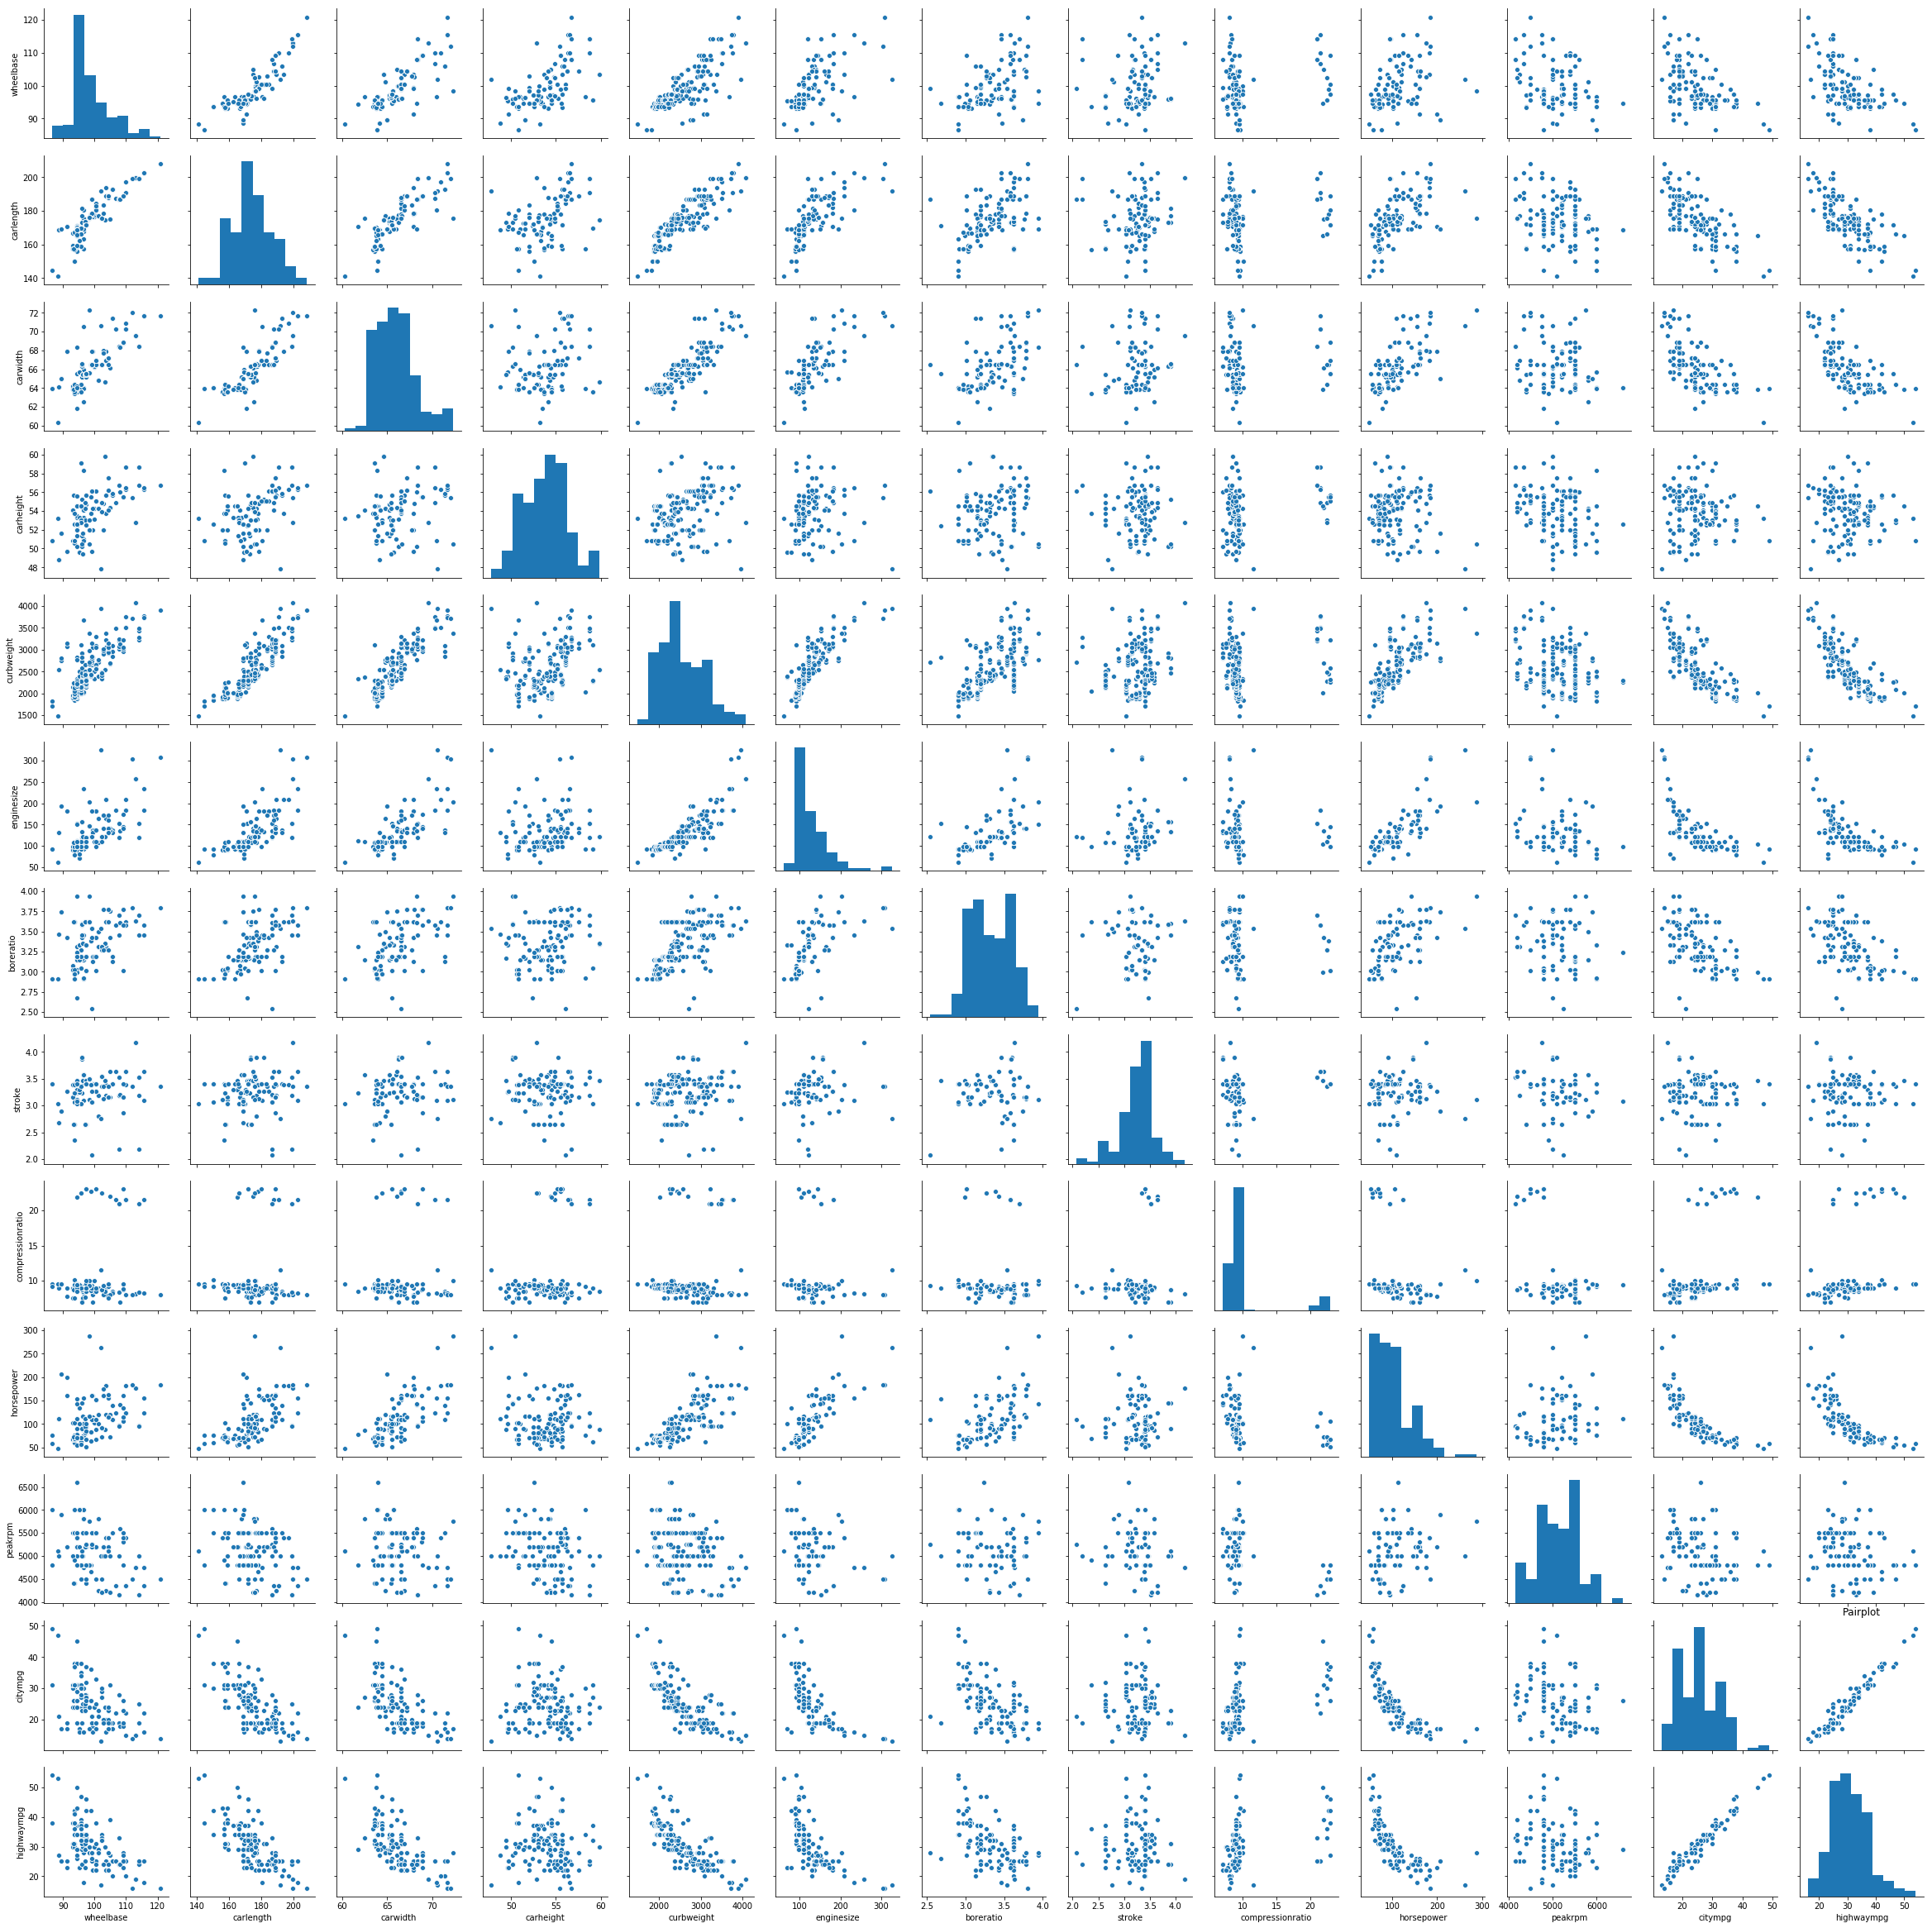

In [12]:
plt.figure(figsize=(10,10))
sns.pairplot(data[num_vars])
plt.title('Pairplot')
plt.show()

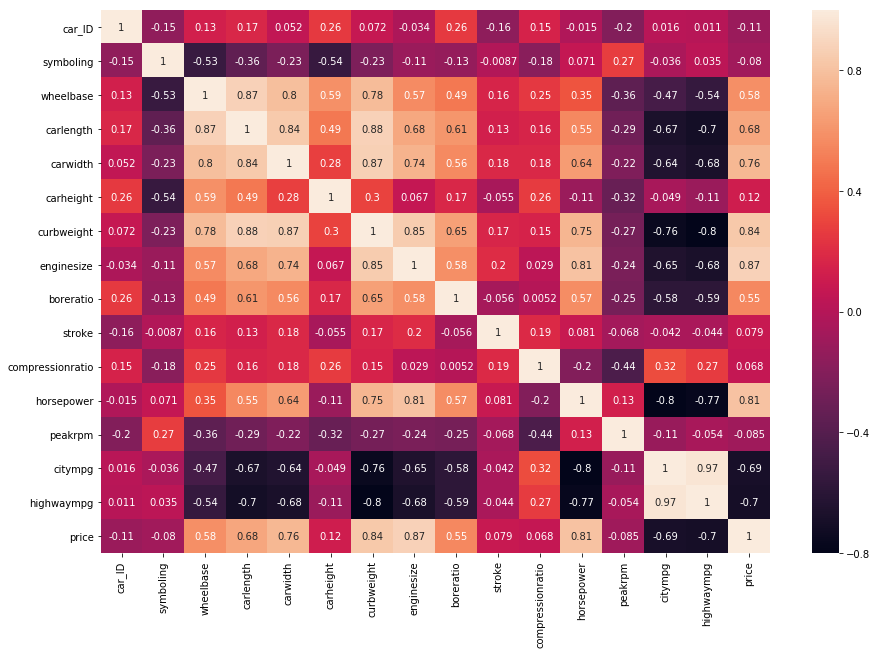

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
# Removing the features that have high collinearity
# data.drop(columns['citympg','curbweight'])

In [14]:
num_vars

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [15]:
cat_vars

['symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [16]:
# Converting each of the categorical variables to dummy variables
x_new = pd.get_dummies(x,columns=cat_vars,prefix=cat_vars)

In [17]:
x_new.head()

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       88.6      168.8      64.1       48.8        2548         130   
1       88.6      168.8      64.1       48.8        2548         130   
2       94.5      171.2      65.5       52.4        2823         152   
3       99.8      176.6      66.2       54.3        2337         109   
4       99.4      176.6      66.4       54.3        2824         136   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg  symboling_-2  symboling_-1  symboling_0  symboling_1  \
0          27             0             0            0            0   
1          27             0             0            0            0   
2          26             0             0            0            1   
3          30             0             0            0            0   
4          22             0             0            0            0   

   symboling_2  symboling_3  CarName_Nissan versa  \
0            0            1                     0   
1            0            1                     0   
2            0            0                     0   
3            1            0                     0   
4            1            0                     0   

   CarName_alfa-romero Quadrifoglio  CarName_alfa-romero giulia  \
0                                 0                           1   
1                                 0                           0   
2                                 1                           0   
3                                 0                           0   
4                                 0                           0   

   CarName_alfa-romero stelvio  CarName_audi 100 ls  CarName_audi 100ls  \
0                            0                    0                   0   
1                            1                    0                   0   
2                            0                    0                   0   
3                            0                    1                   0   
4                            0                    0                   1   

   CarName_audi 4000  CarName_audi 5000  CarName_audi 5000s (diesel)  \
0                  0                  0                            0   
1                  0                  0                            0   
2                  0                  0                            0   
3                  0                  0                            0   
4                  0                  0                            0   

   CarName_audi fox  CarName_bmw 320i  CarName_bmw x1  CarName_bmw x3  \
0                 0                 0               0               0   
1                 0                 0               0               0   
2                 0                 0               0               0   
3                 0                 0               0               0   
4                 0                 0               0               0   

   CarName_bmw x4  CarName_bmw x5  CarName_bmw z4  CarName_buick century  \
0               0               0               0                      0   
1               0               0               0                      0   
2               0               0               0                      0   
3               0               0               0                      0   
4               0               0               0                      0   

   CarName_buick century luxus (sw)  CarName_buick century special  \
0                                 0                              0   
1                                 0                              0  

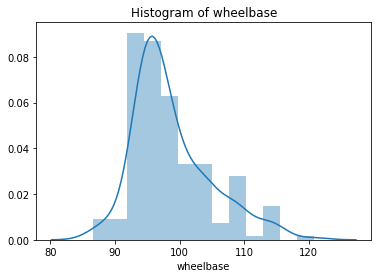

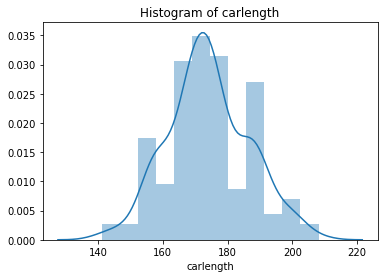

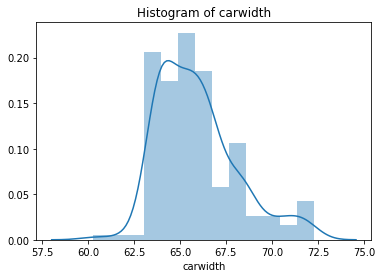

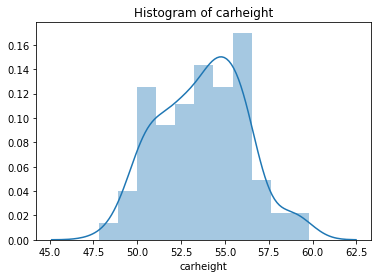

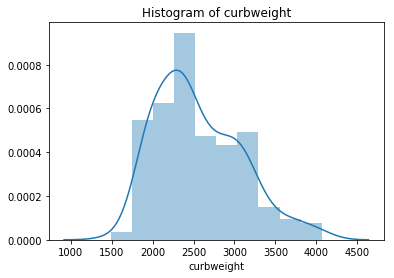

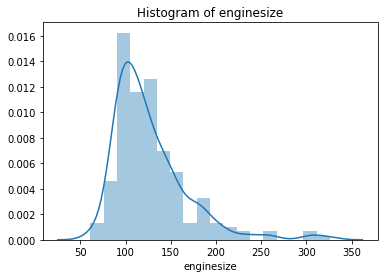

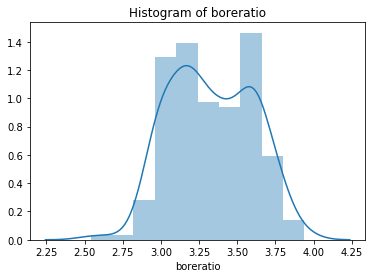

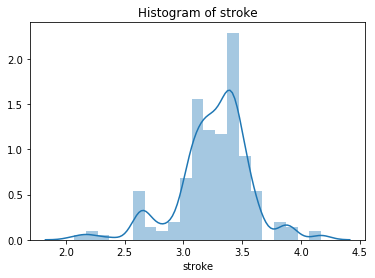

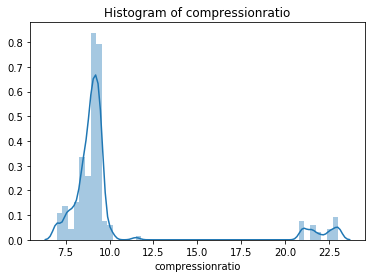

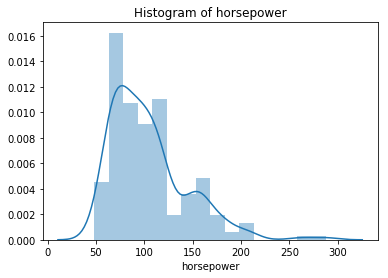

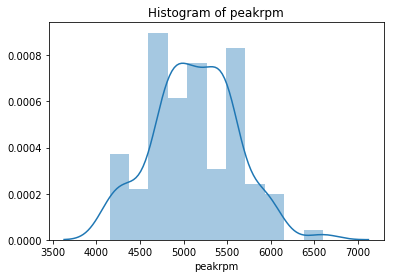

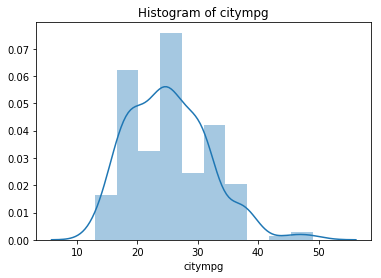

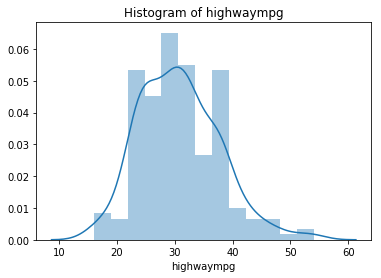

In [18]:
for col in num_vars:
    sns.distplot(x_new[col])
    plt.title('Histogram of '+ col)
    plt.show()

In [19]:
# Transforming the columns
from sklearn.preprocessing import FunctionTransformer

In [20]:
ft = FunctionTransformer(np.log1p)
x_new[num_vars]=ft.fit_transform(x_new[num_vars])

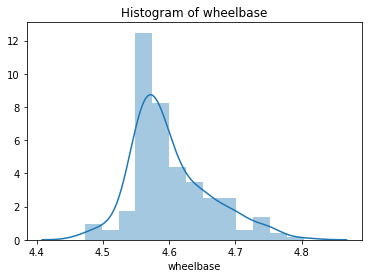

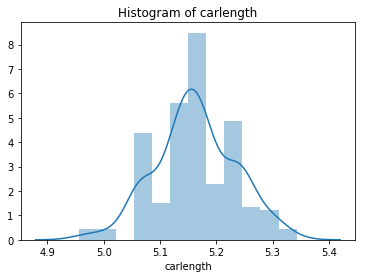

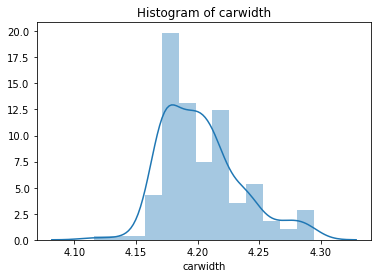

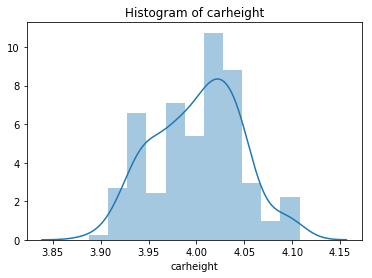

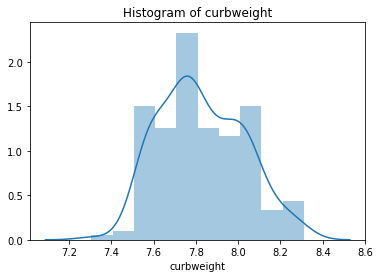

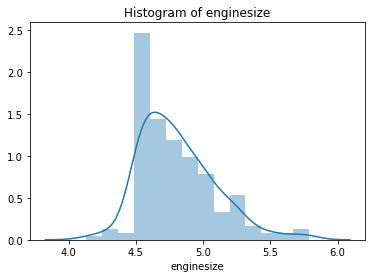

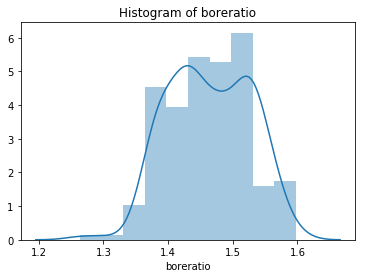

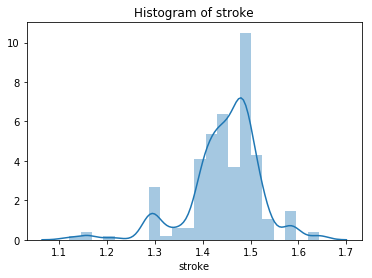

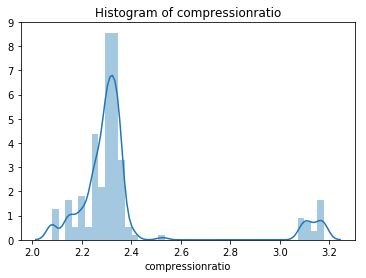

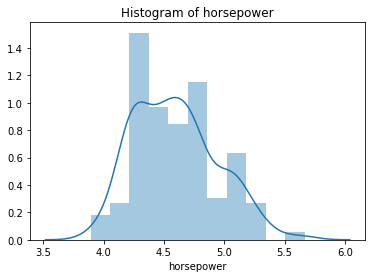

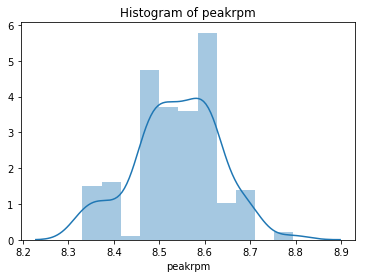

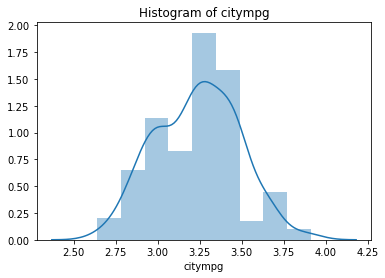

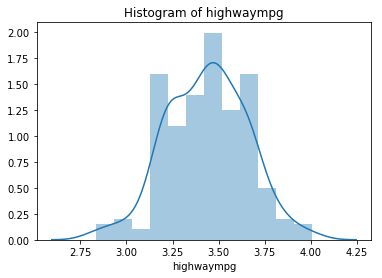

In [21]:
for col in num_vars:
    sns.distplot(x_new[col])
    plt.title('Histogram of '+col)
    plt.show()

In [22]:
# Standardize the features
# from sklearn.preprocessing import StandardScaler

In [23]:
# scaler = StandardScaler()
# x_matrix = scaler.fit_transform(x_new)

In [24]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(x_new,y.to_numpy(),train_size=0.7,random_state=1)

In [26]:
# Build a linear model
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression(normalize=True)
lr = lr.fit(xtrain,ytrain)

In [28]:
lr.coef_

array([-3.37001508e+04, -6.62647265e+04,  1.73018563e+05,  8.44671366e+04,
        3.85165101e+04, -8.77495896e+03, -2.30657403e+04,  4.03907826e+03,
       -4.31978364e+03, -2.49160509e+03,  4.76831771e+03, -1.13086248e+04,
        7.55980332e+03,  3.36148250e+03,  5.02355599e+03, -2.73988949e+03,
       -2.07765744e+03,  2.11792590e+03,  1.76528867e+03,  3.01428161e+02,
        1.12987889e+03,  1.03445427e+04,  1.33495427e+04,  5.49460673e+03,
        4.39931159e+02, -6.42523111e+03, -4.45067659e+03,  1.42617451e+03,
        7.52043164e+03,  6.93681345e+03,  7.45840097e+03,  7.10490350e+03,
        1.01551747e+04, -3.92285516e+01,  2.62149319e+01, -3.91122777e+01,
       -2.64601103e+04,  1.37891074e+01,  4.19376069e+01,  2.70788988e+03,
        2.45858267e+04, -1.29915935e+04,  5.48694206e+02,  1.04154349e+01,
       -1.20505779e+01,  3.61792047e+03,  3.44004524e+03,  1.19883065e+03,
        2.81830654e+02, -5.38727744e+00, -2.77282250e-01, -1.79297953e+03,
       -8.06675143e+00,  

In [29]:
lr.score(xtrain,ytrain)

1.0

In [30]:
ypred_linear = lr.predict(xtest)

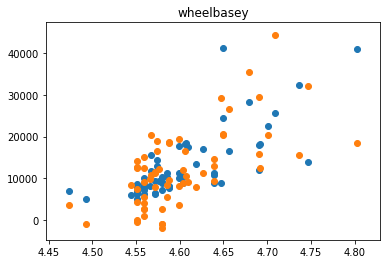

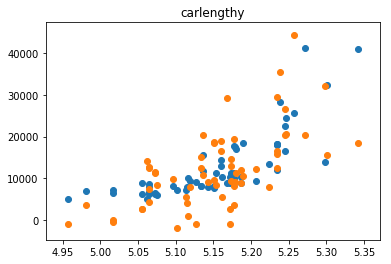

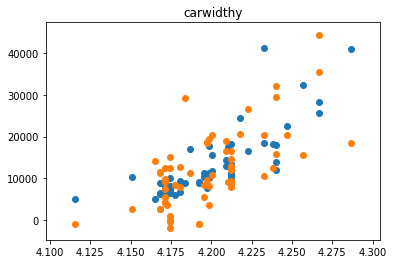

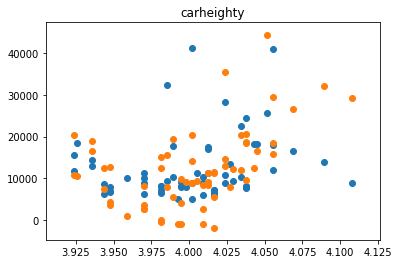

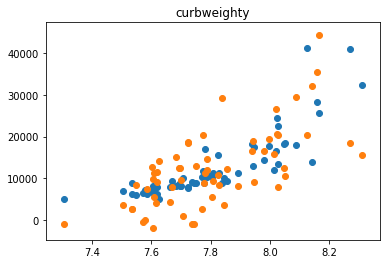

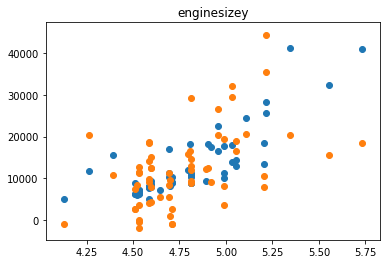

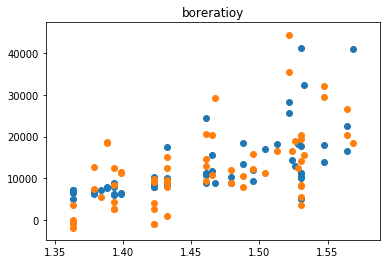

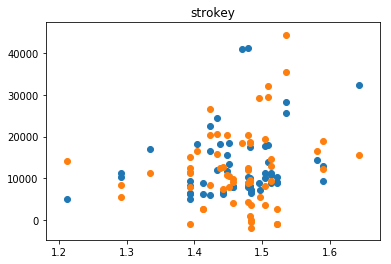

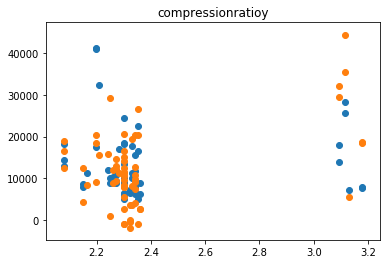

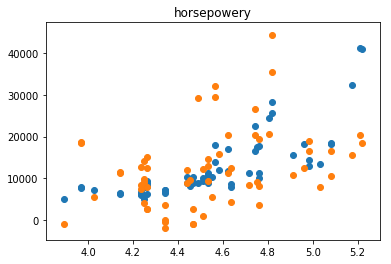

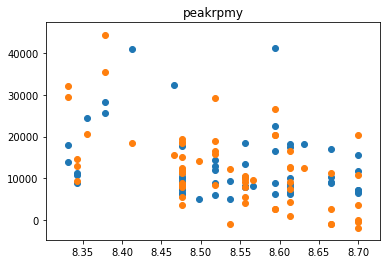

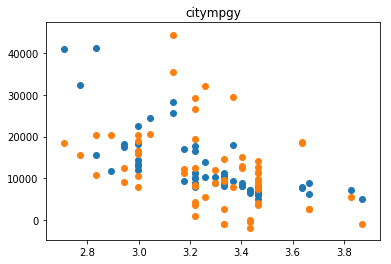

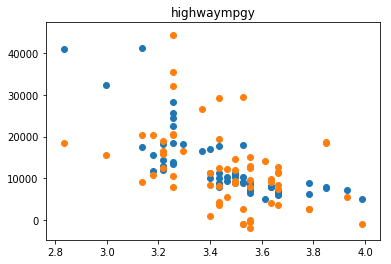

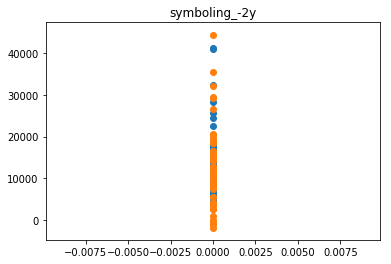

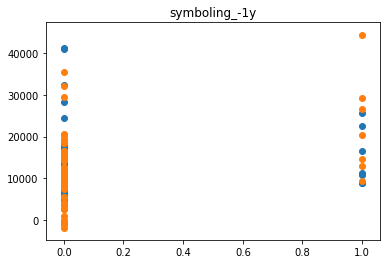

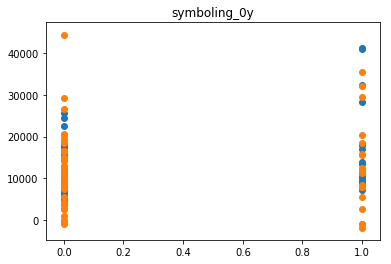

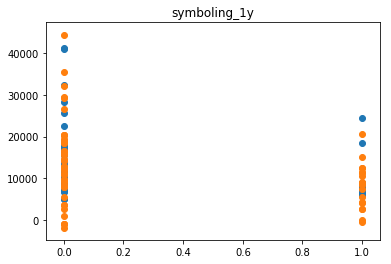

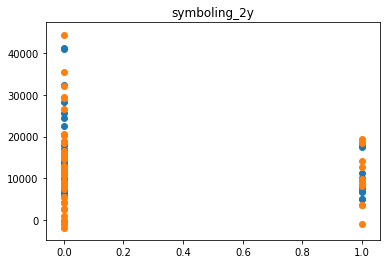

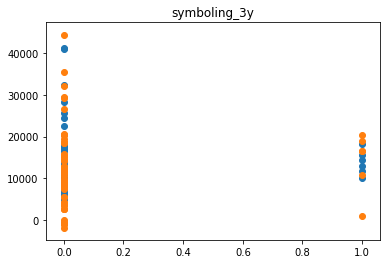

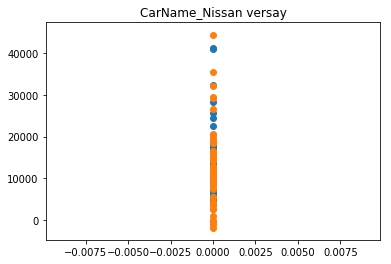

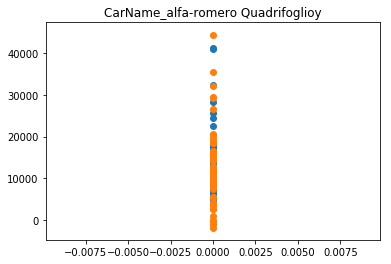

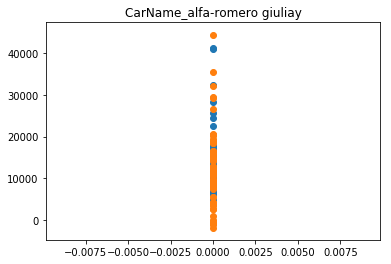

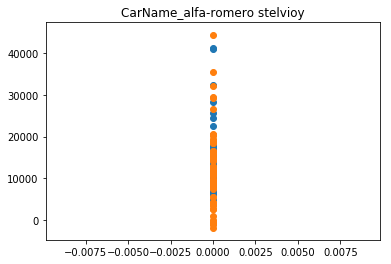

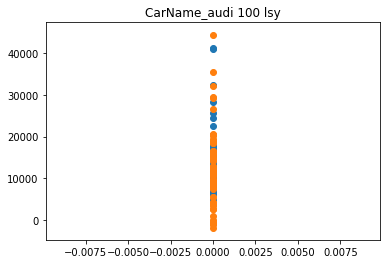

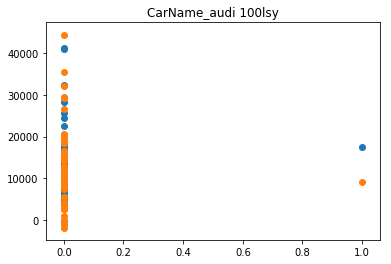

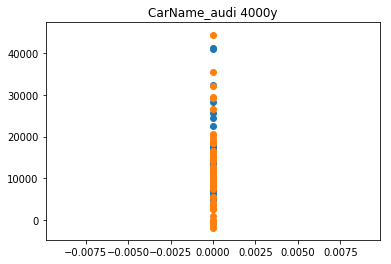

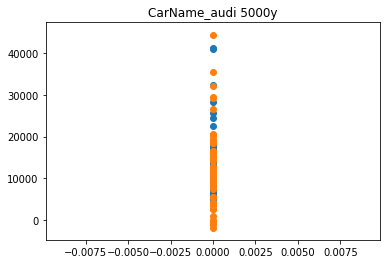

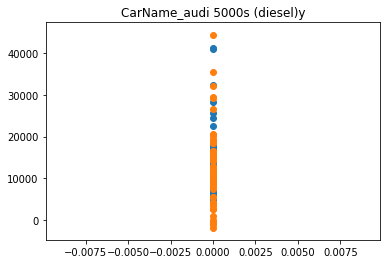

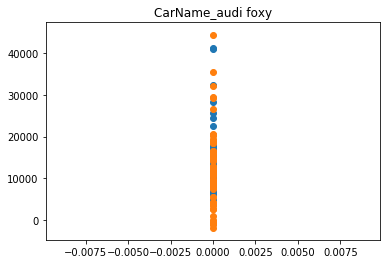

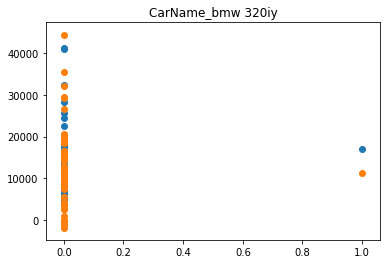

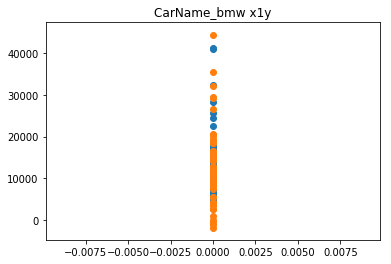

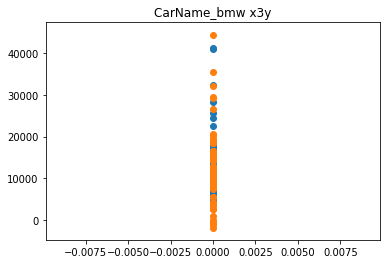

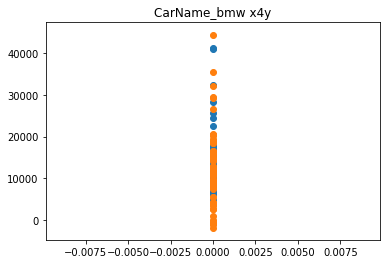

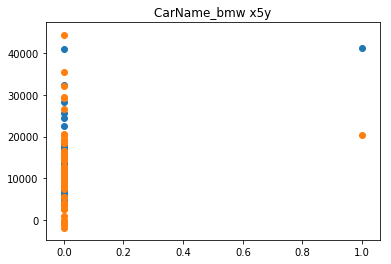

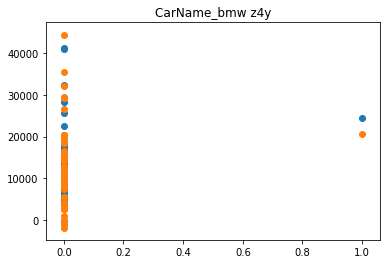

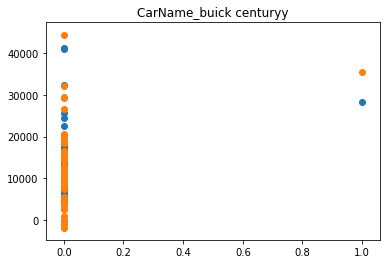

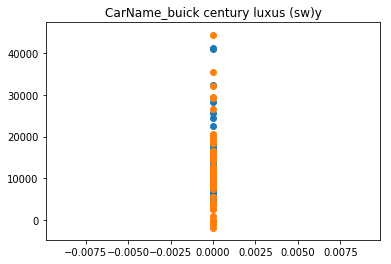

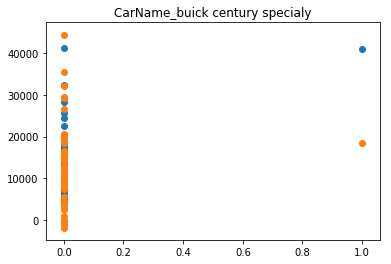

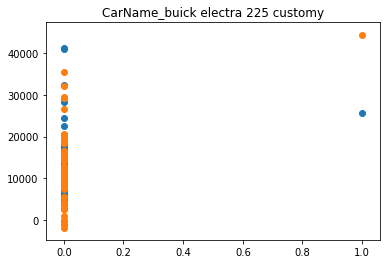

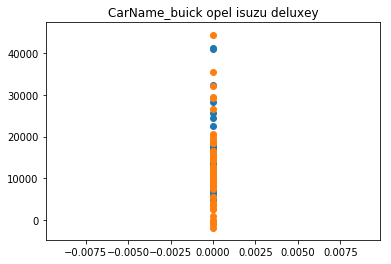

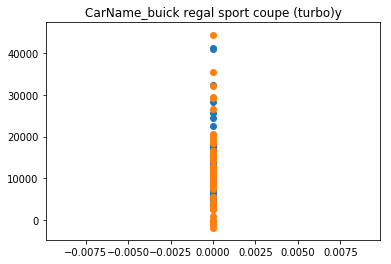

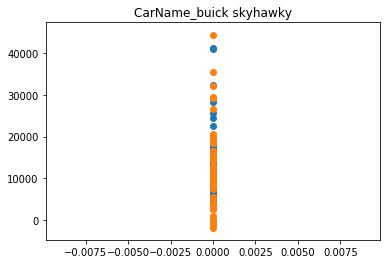

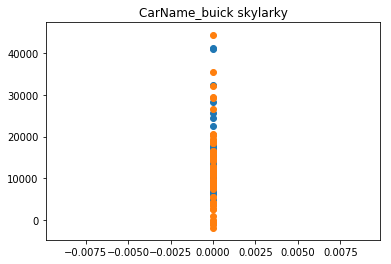

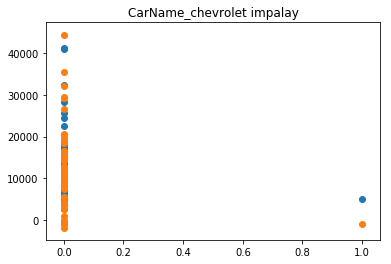

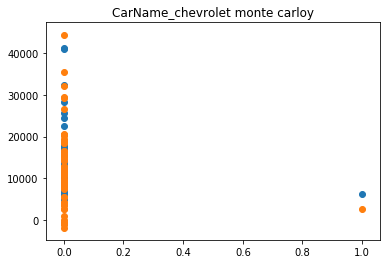

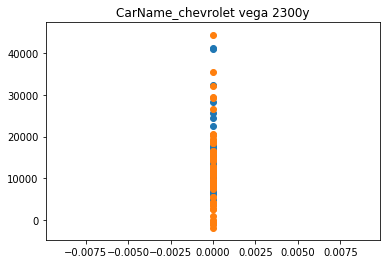

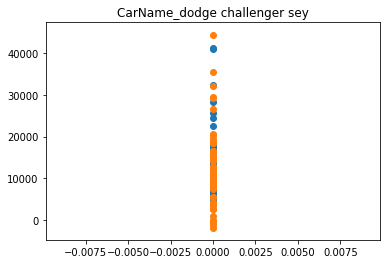

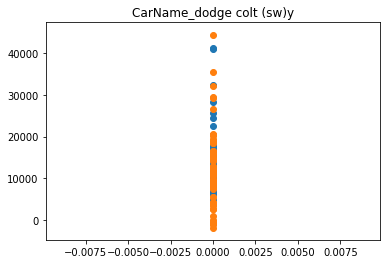

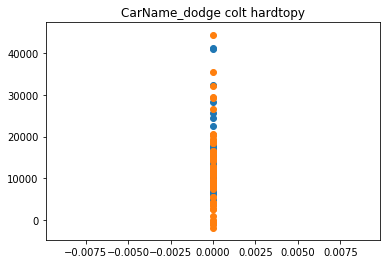

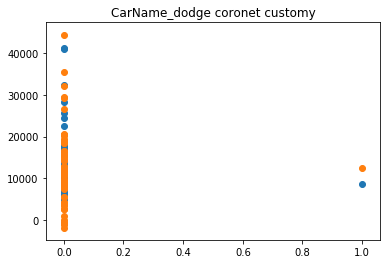

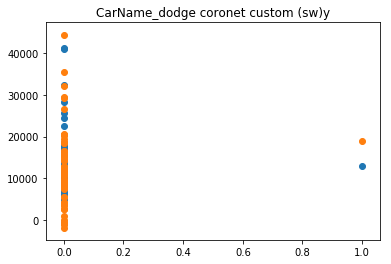

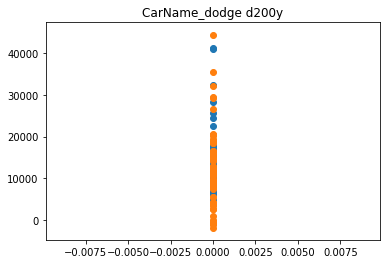

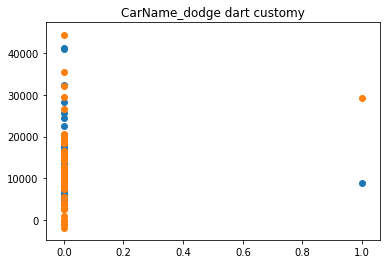

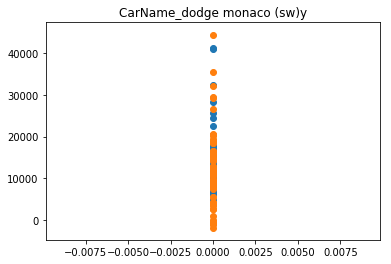

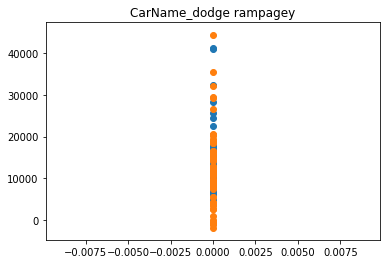

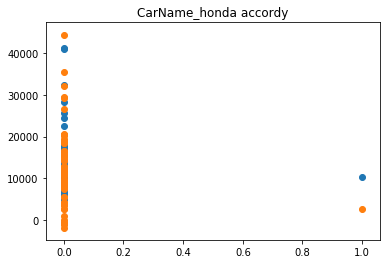

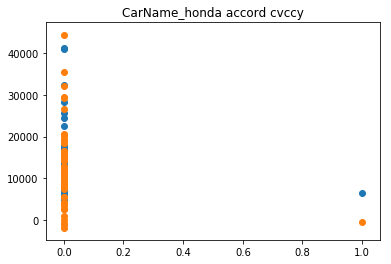

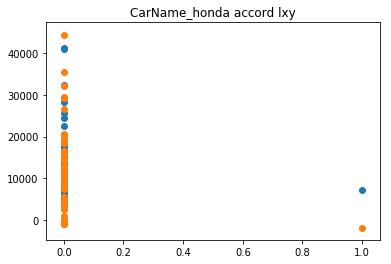

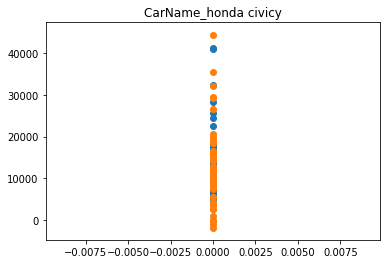

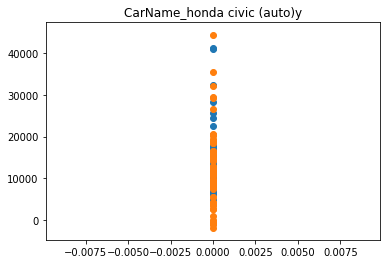

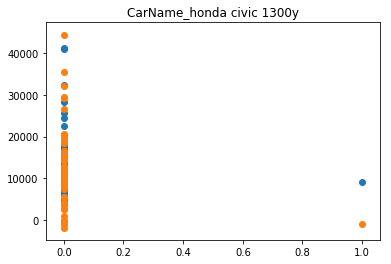

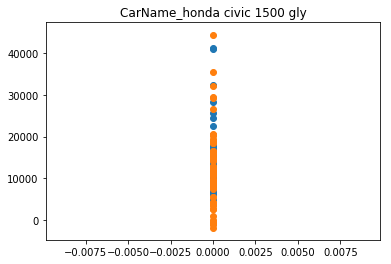

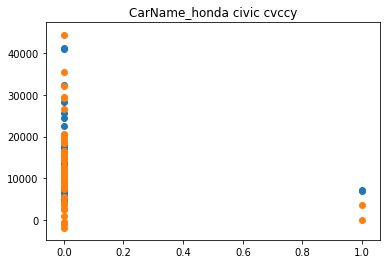

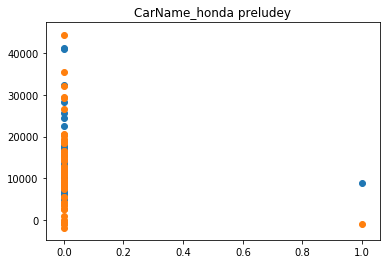

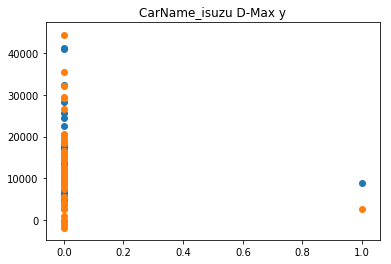

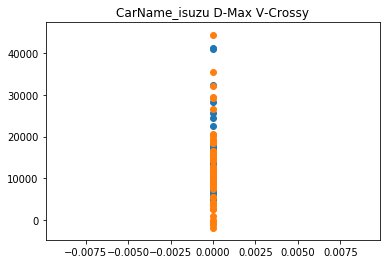

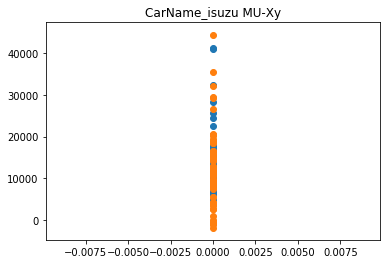

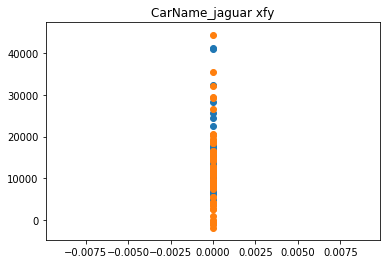

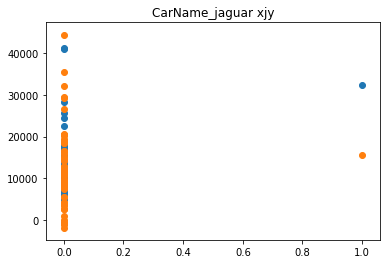

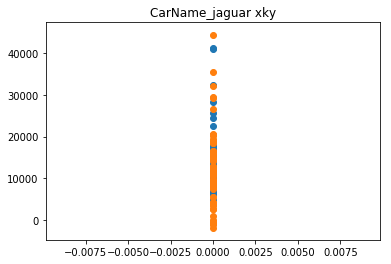

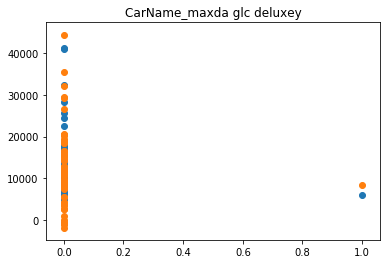

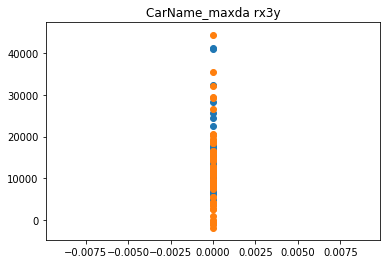

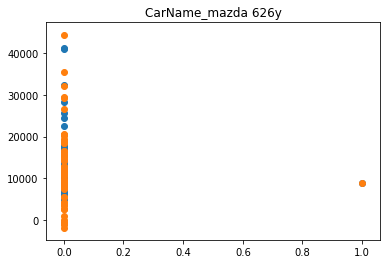

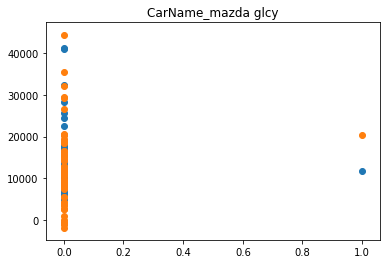

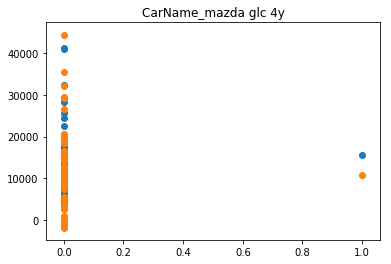

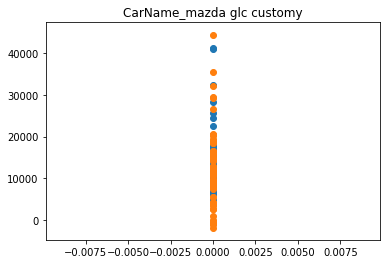

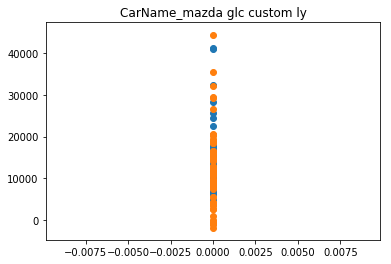

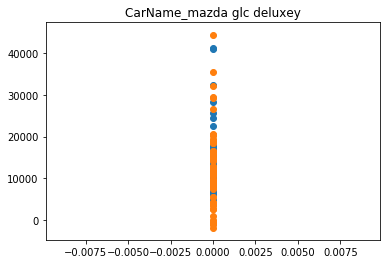

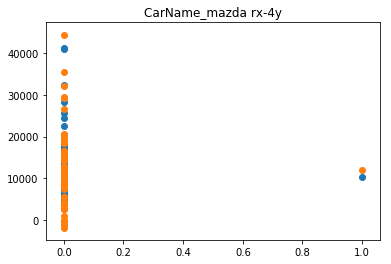

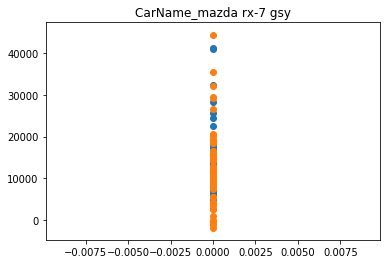

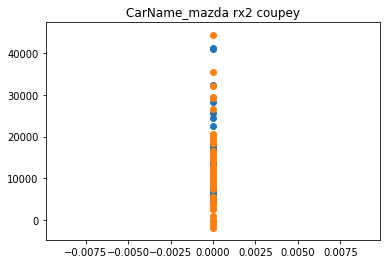

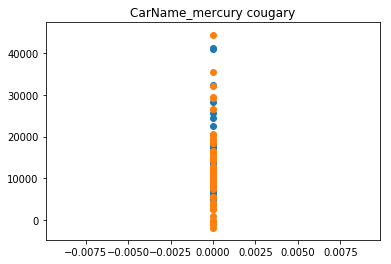

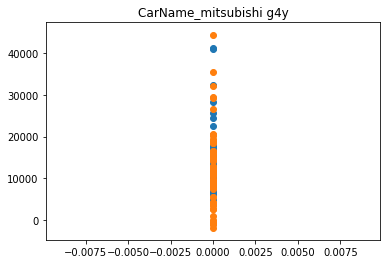

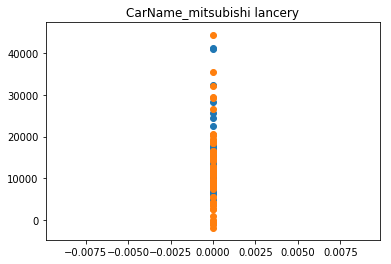

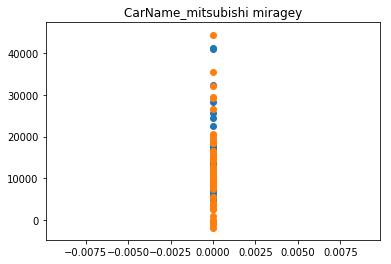

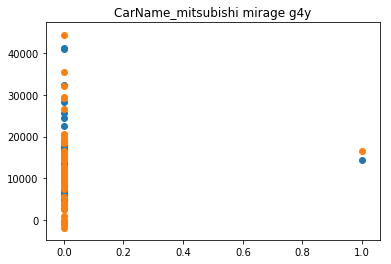

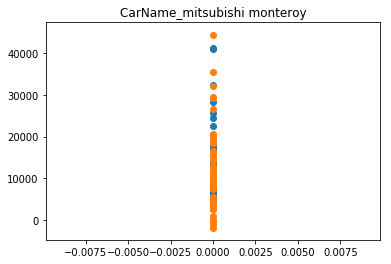

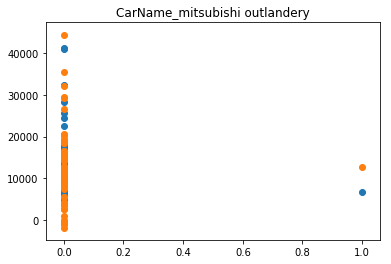

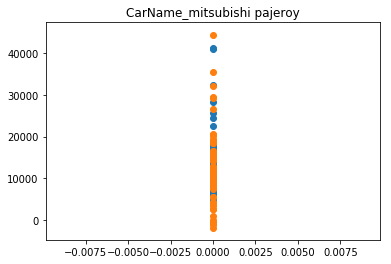

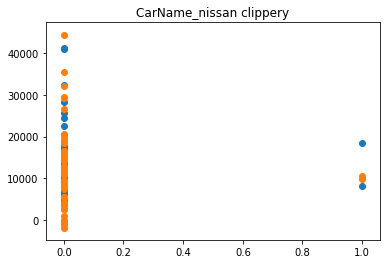

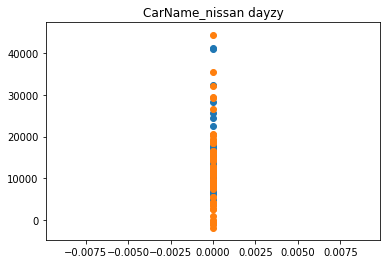

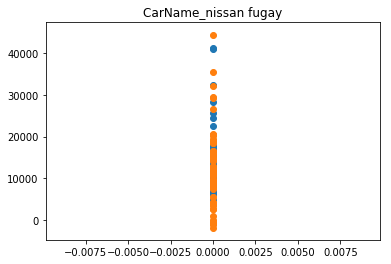

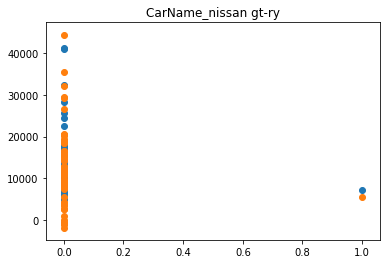

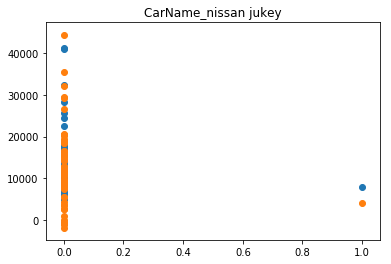

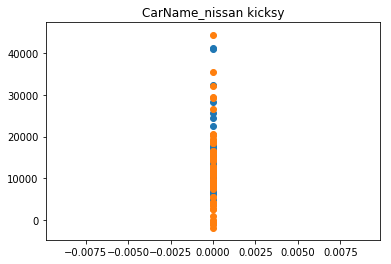

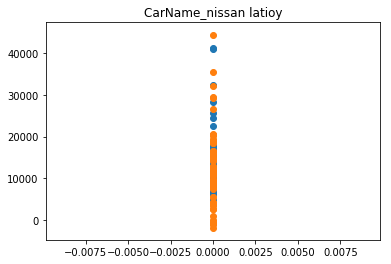

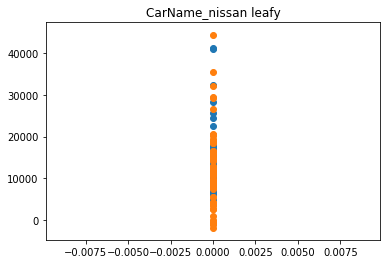

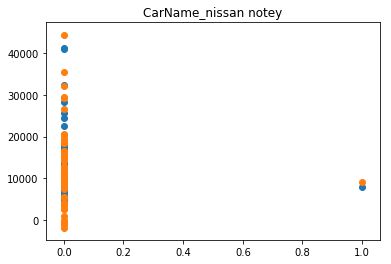

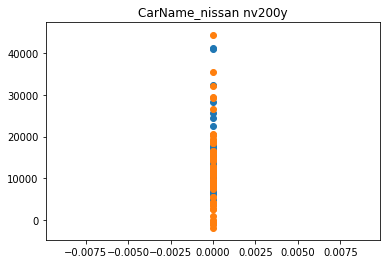

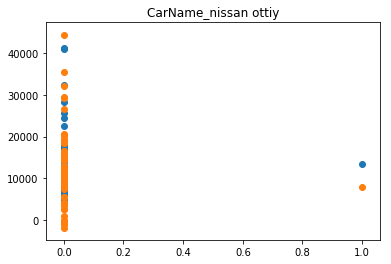

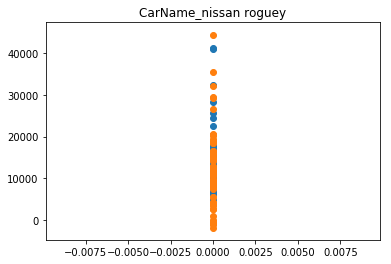

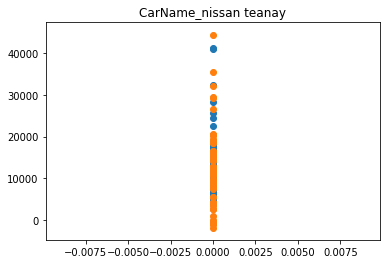

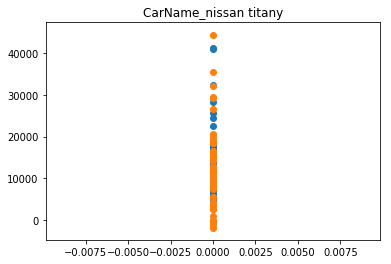

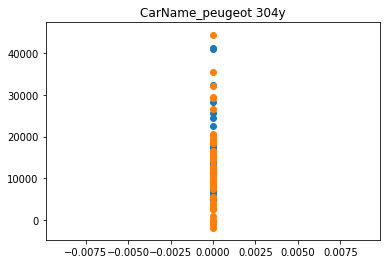

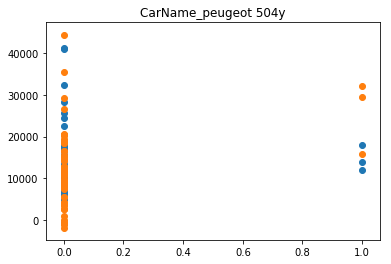

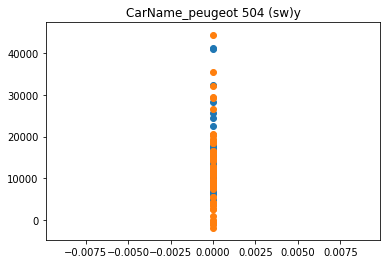

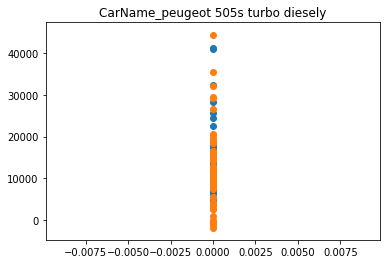

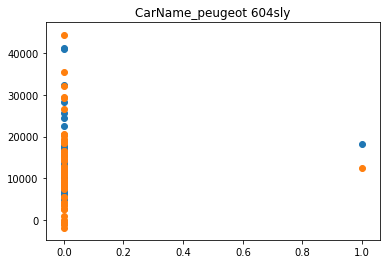

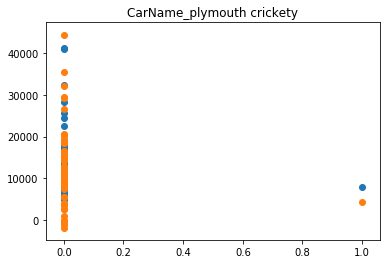

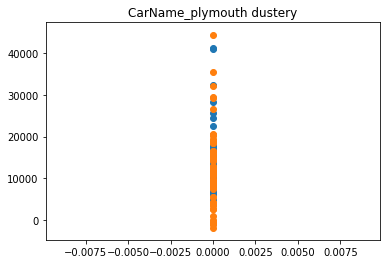

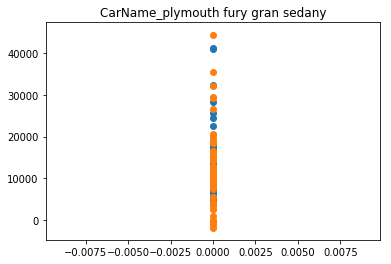

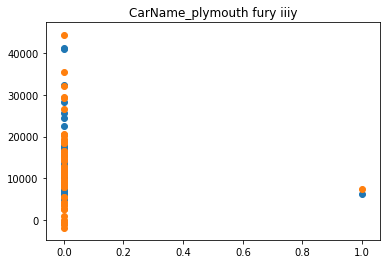

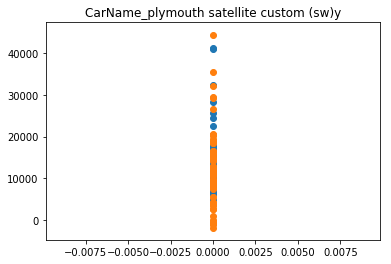

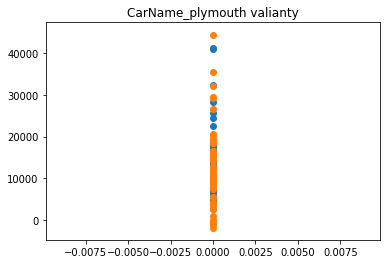

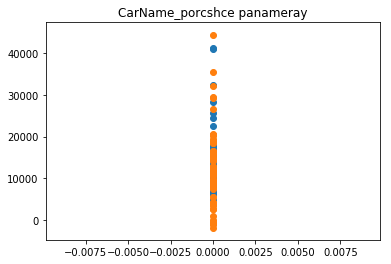

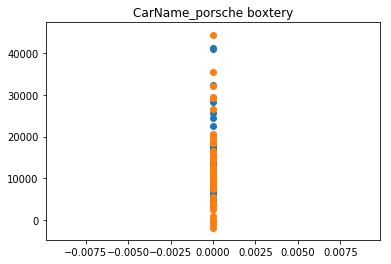

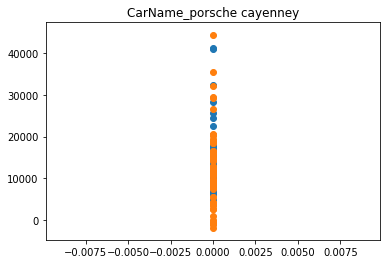

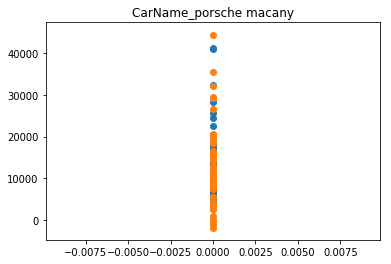

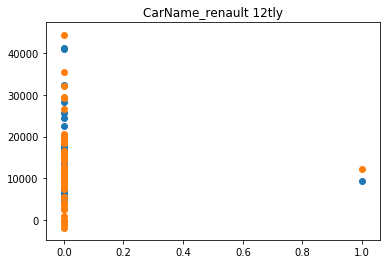

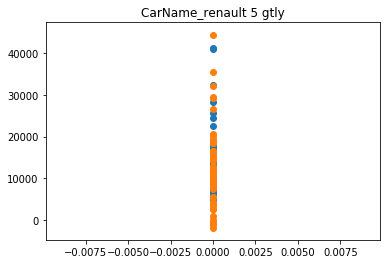

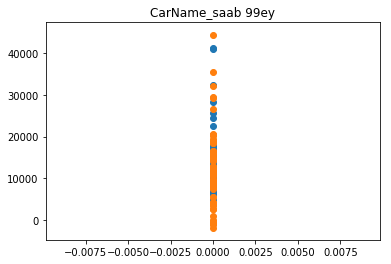

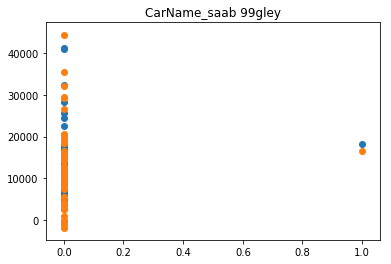

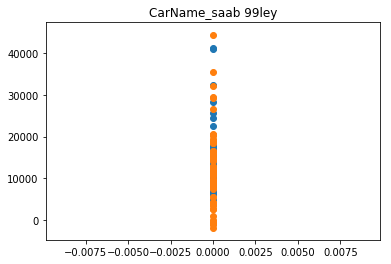

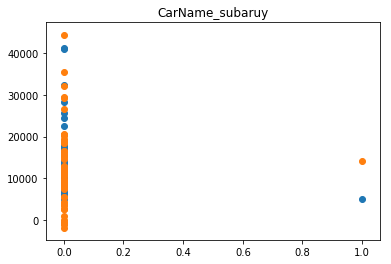

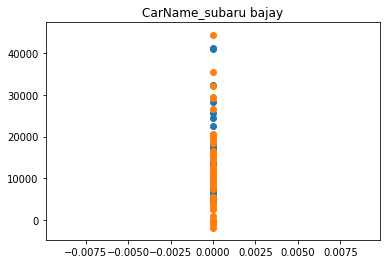

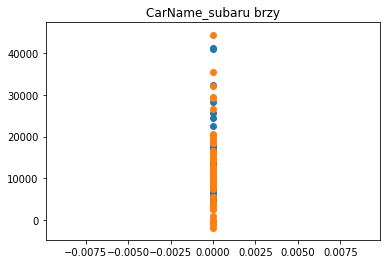

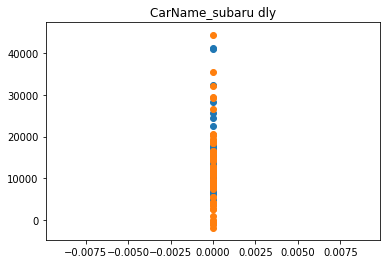

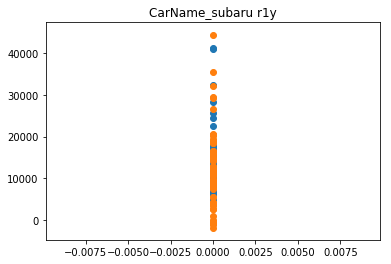

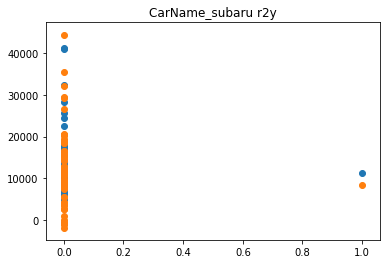

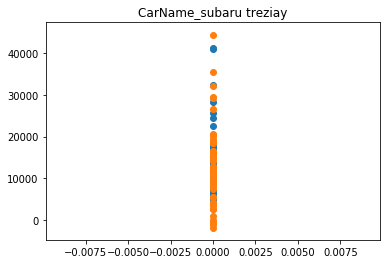

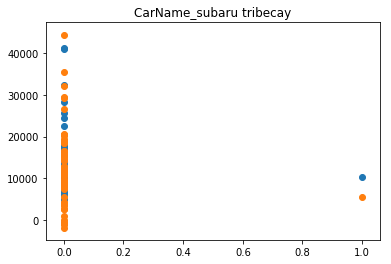

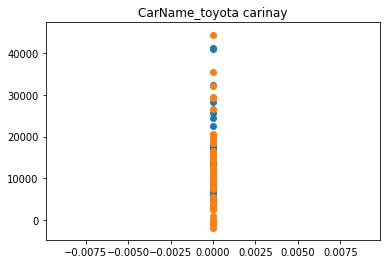

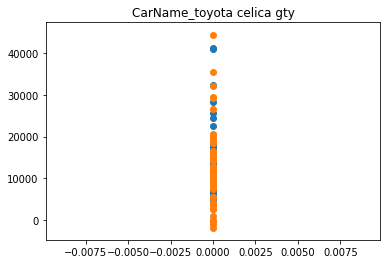

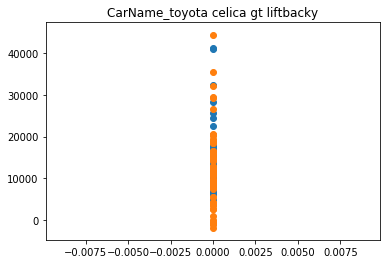

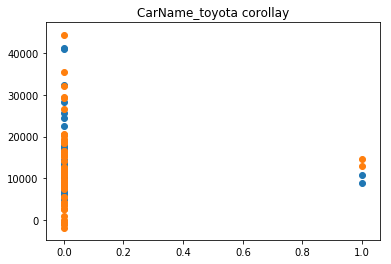

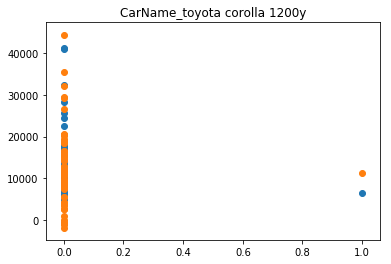

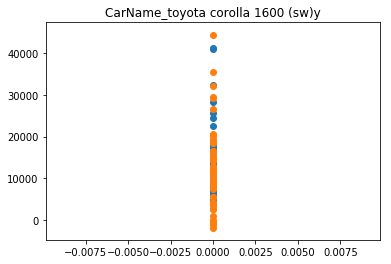

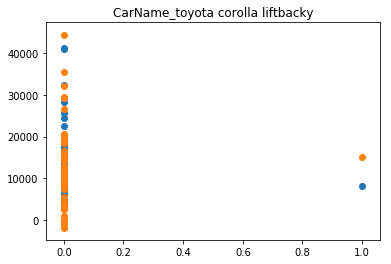

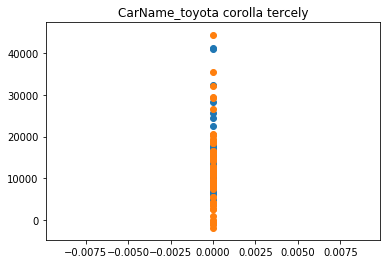

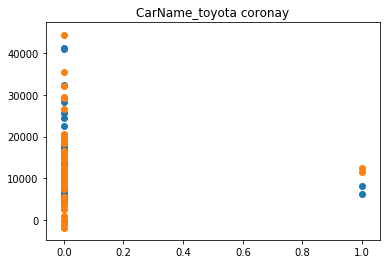

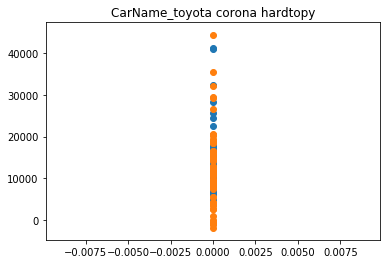

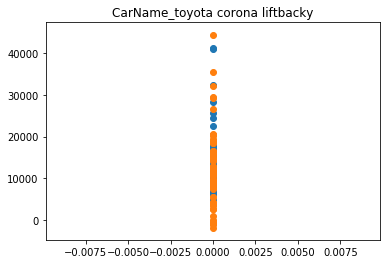

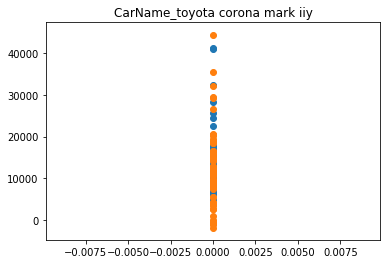

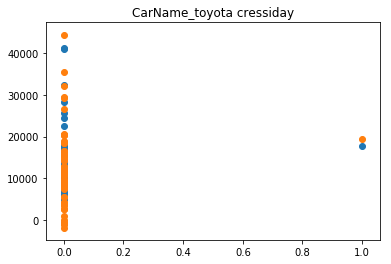

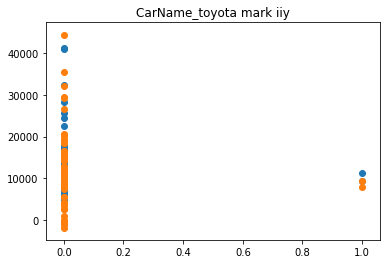

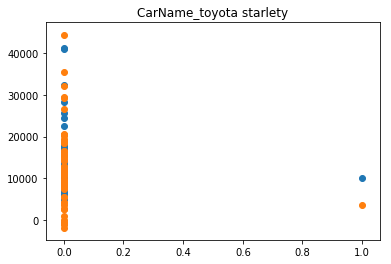

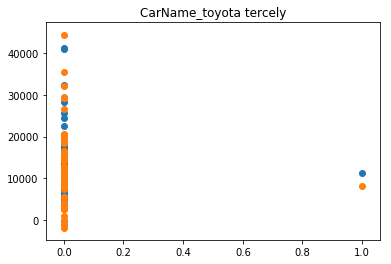

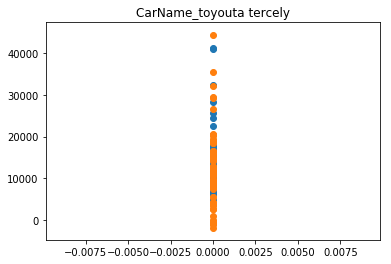

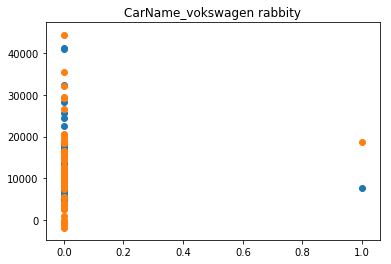

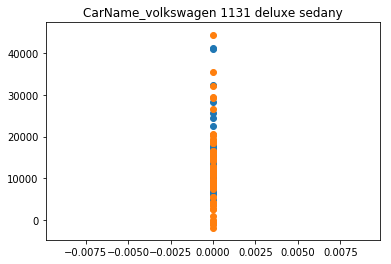

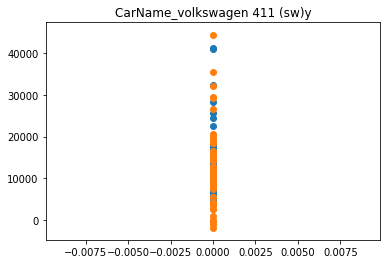

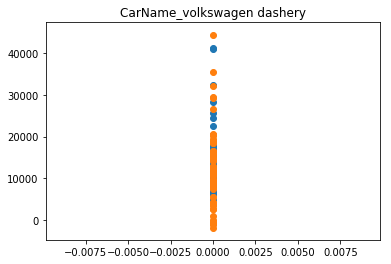

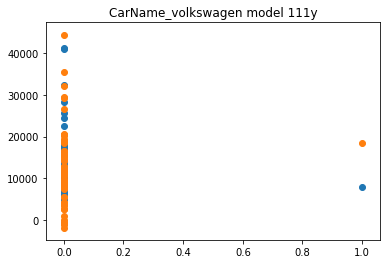

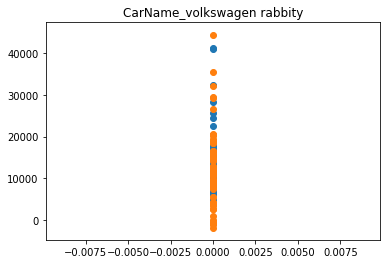

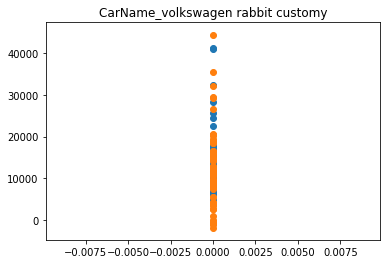

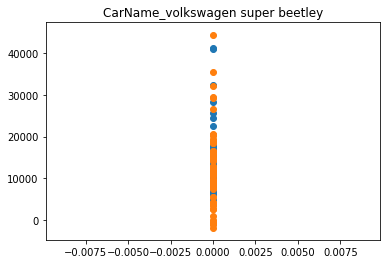

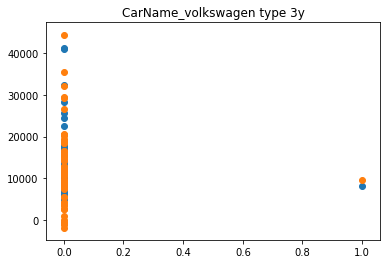

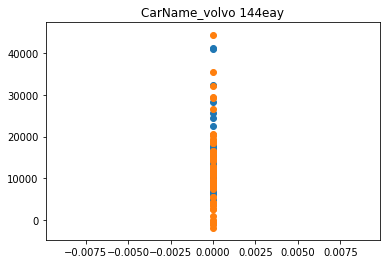

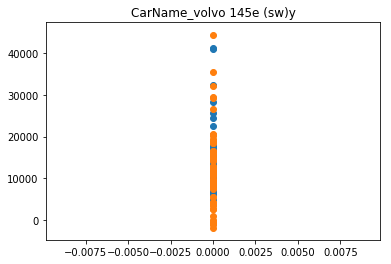

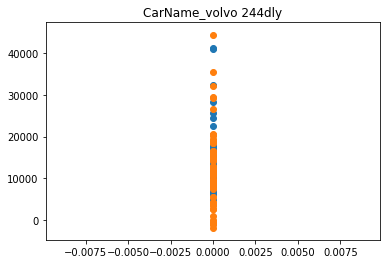

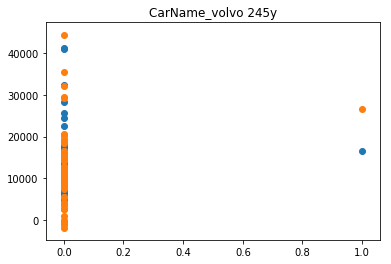

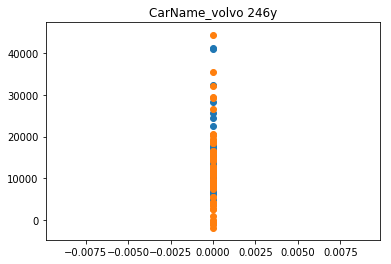

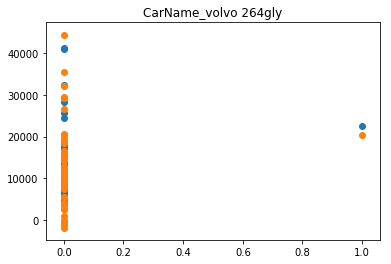

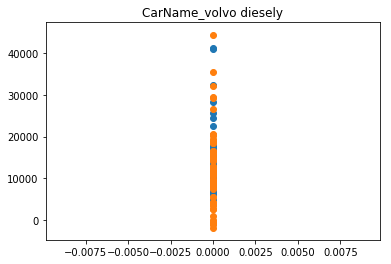

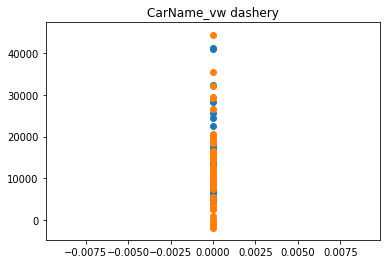

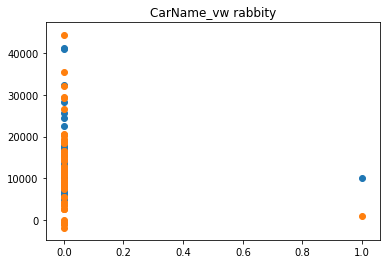

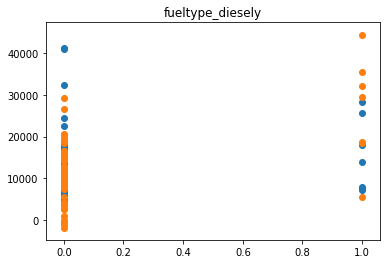

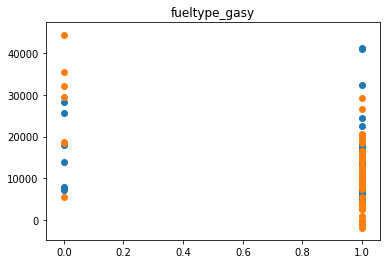

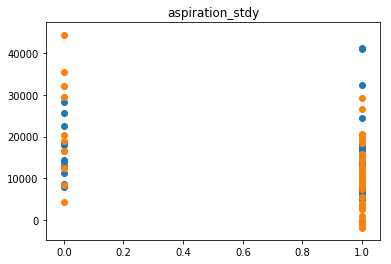

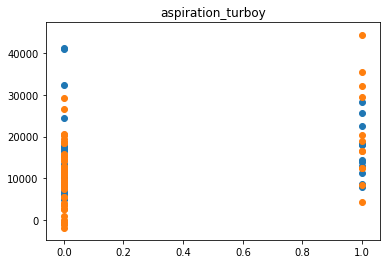

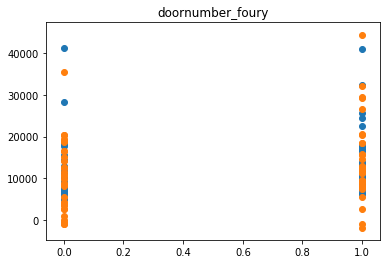

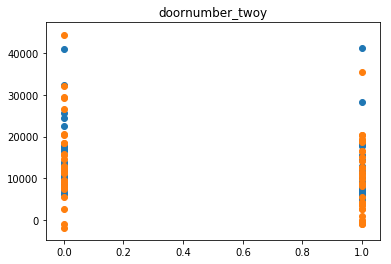

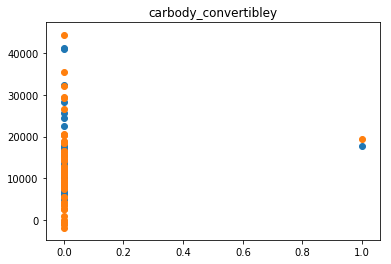

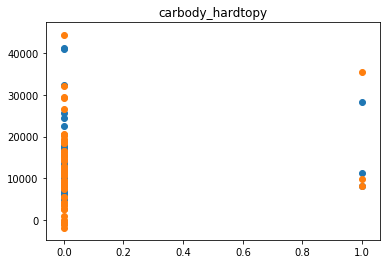

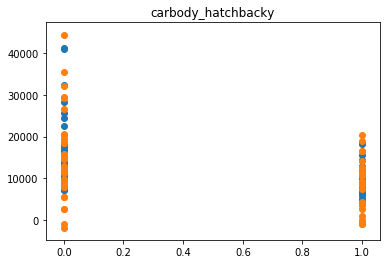

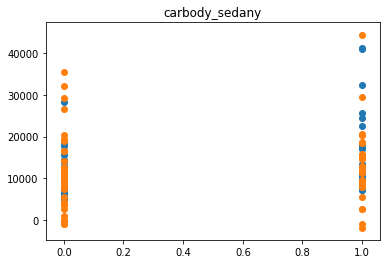

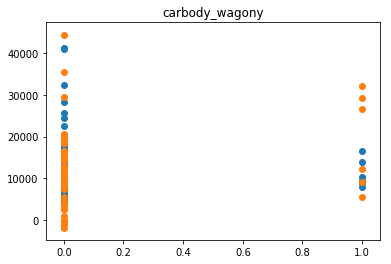

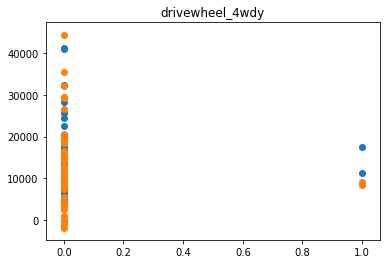

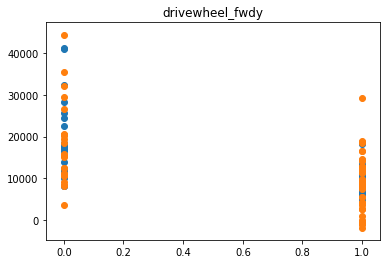

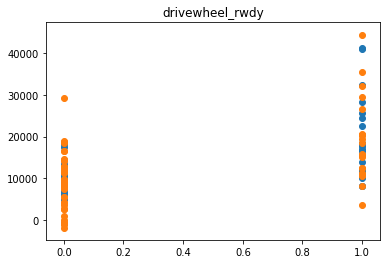

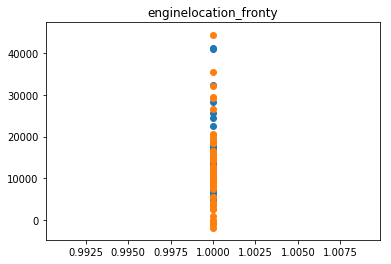

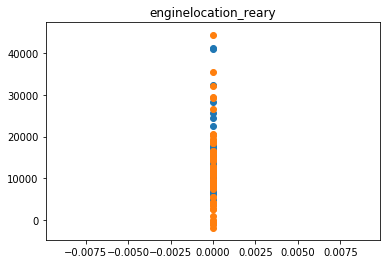

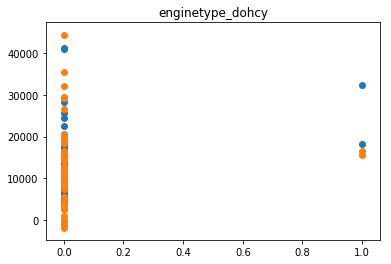

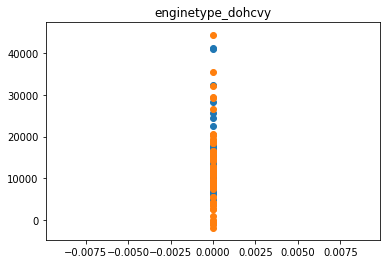

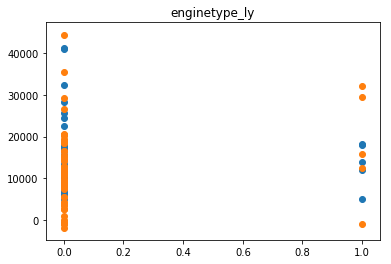

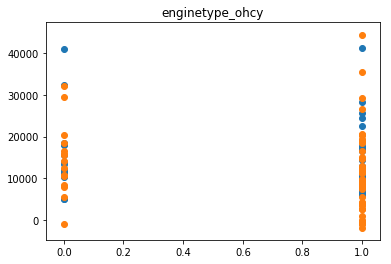

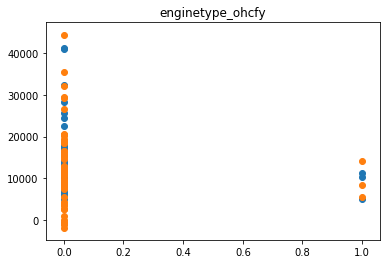

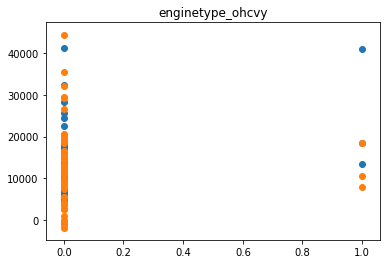

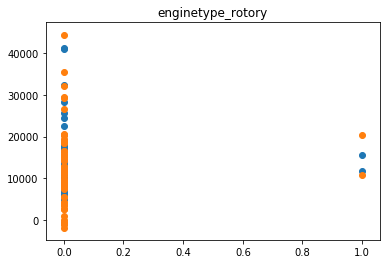

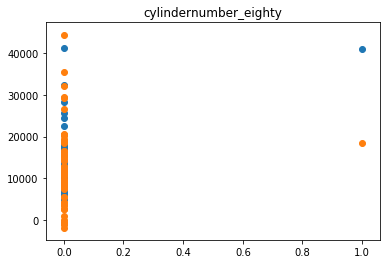

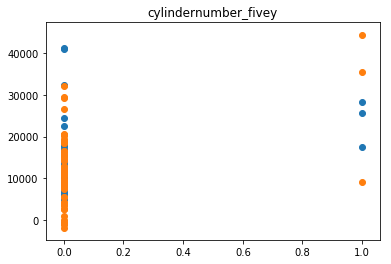

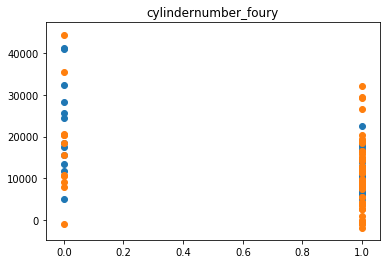

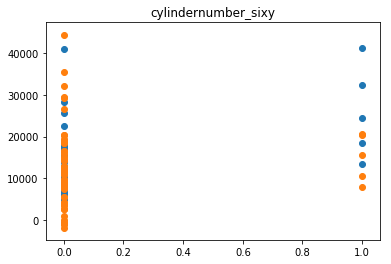

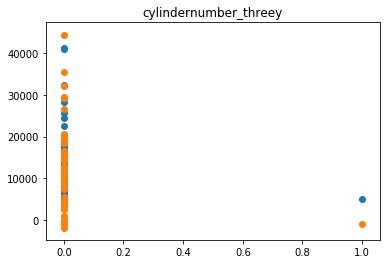

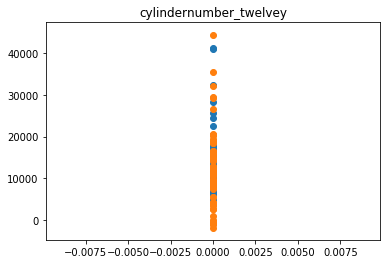

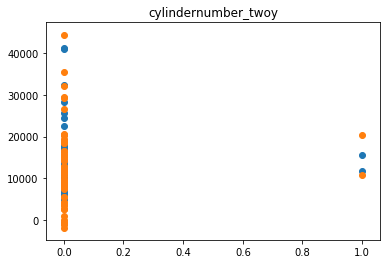

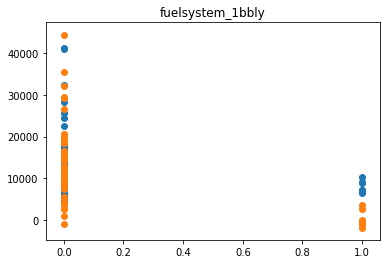

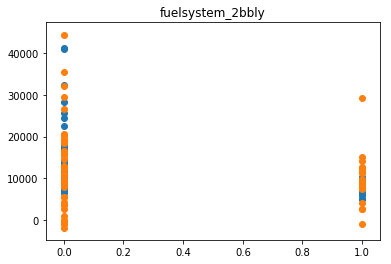

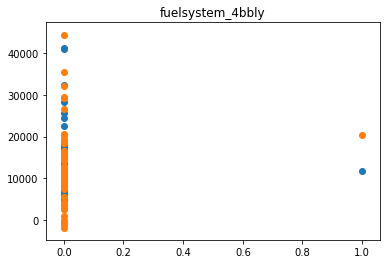

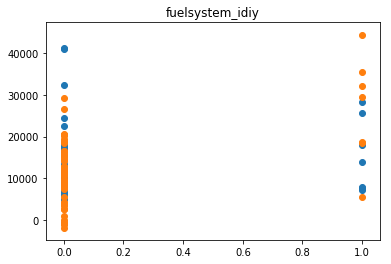

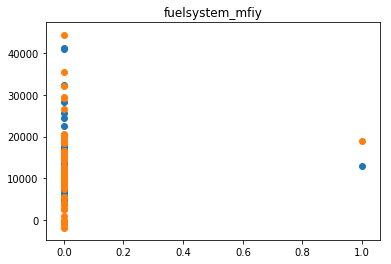

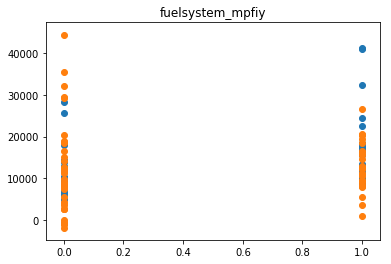

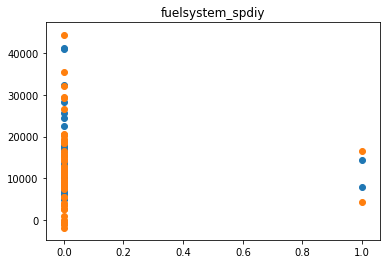

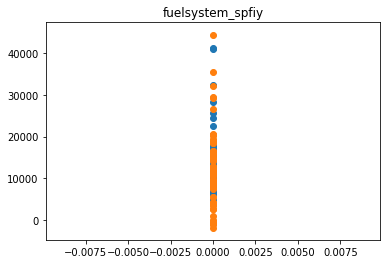

In [39]:
for i in xtest.columns:
    plt.scatter(xtest[i],ytest)
    plt.scatter(xtest[i],ypred_linear)
    plt.title(i+' vs y')
    plt.show()

In [41]:
from sklearn import metrics

In [42]:
help(metrics)

Help on package sklearn.metrics in sklearn:

NAME
    sklearn.metrics

DESCRIPTION
    The :mod:`sklearn.metrics` module includes score functions, performance metrics
    and pairwise metrics and distance computations.

PACKAGE CONTENTS
    _base
    _classification
    _pairwise_fast
    _plot (package)
    _ranking
    _regression
    _scorer
    base
    classification
    cluster (package)
    pairwise
    pairwise_fast
    ranking
    regression
    scorer
    setup
    tests (package)

CLASSES
    builtins.object
        sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay
        sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay
        sklearn.metrics._plot.roc_curve.RocCurveDisplay
    
    class ConfusionMatrixDisplay(builtins.object)
     |  ConfusionMatrixDisplay(confusion_matrix, *, display_labels=None)
     |  
     |  Confusion Matrix visualization.
     |  
     |  It is recommend to use :func:`~sklearn.metrics.plot_confusion_matrix` to
     |

In [43]:
print(metrics.mean_squared_error(ytest,ypred_linear))

68777332.35337377


In [44]:
print(metrics.r2_score(ytest,ypred_linear))

-0.13925171681925752


In [46]:
from sklearn.linear_model import Ridge

In [48]:
rr = Ridge(alpha = 20.5, normalize=True, random_state=3)
rr = rr.fit(xtrain,ytrain)
rr.score(xtrain,ytrain)

0.4814532728541847

In [47]:
help(Ridge)

Help on class Ridge in module sklearn.linear_model._ridge:

class Ridge(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, _BaseRidge)
 |  Ridge(alpha=1.0, *, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
 |  
 |  Linear least squares with l2 regularization.
 |  
 |  Minimizes the objective function::
 |  
 |  ||y - Xw||^2_2 + alpha * ||w||^2_2
 |  
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape (n_samples, n_targets)).
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : {float, ndarray of shape (n_targets,)}, default=1.0
 |      Regularization strength; must be a positive float. Regul

In [49]:
rr.intercept_

-45900.38312802662

In [50]:
rr.coef_

array([ 2.09678300e+03,  2.33384696e+03,  6.09265053e+03,  3.51852395e+02,
        1.05185219e+03,  8.17076842e+02,  1.95203316e+03,  7.09902465e+01,
        7.17624475e+01,  5.81337390e+02, -6.54051716e+01, -7.68105937e+02,
       -8.69840394e+02,  2.99026362e+01,  1.53524464e+02, -8.39246182e+00,
       -1.05173283e+02, -1.19071181e+02,  1.67441897e+02, -2.58871418e+02,
        5.64655943e+01, -4.38550050e+01,  9.68506270e+01,  4.85340078e+01,
        1.19163238e+02,  3.79293414e+02,  1.78120577e+02,  1.19533812e+02,
        4.46127791e+01,  1.28982822e+02,  2.70496828e+02,  5.97880100e+02,
        6.59620213e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.32249219e+02,  0.00000000e+00,  0.00000000e+00,  7.11825497e+02,
        1.20143761e+03,  6.68600823e+02,  7.72341153e+02,  0.00000000e+00,
        0.00000000e+00, -1.86563870e+02, -1.94048962e+02, -1.44076190e+02,
       -1.87013649e+02,  0.00000000e+00,  0.00000000e+00, -1.92916501e+02,
        0.00000000e+00, -

In [51]:
ypred_rr = rr.predict(xtest)

In [52]:
print(metrics.mean_squared_error(ytest,ypred_rr))

34752950.52124359


In [53]:
print(metrics.r2_score(ytest,ypred_rr))

0.4243400086755571


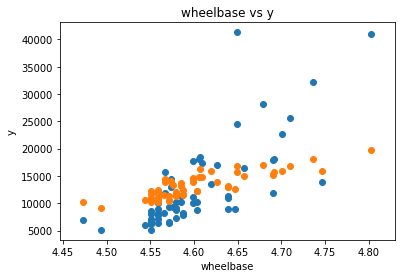

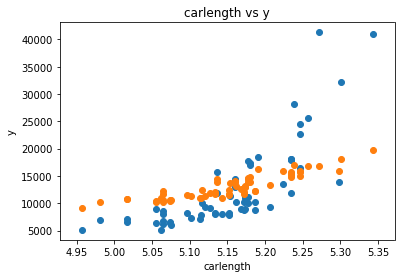

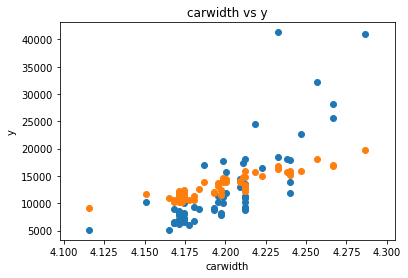

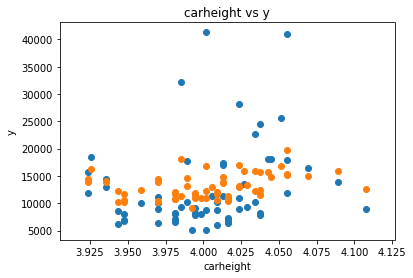

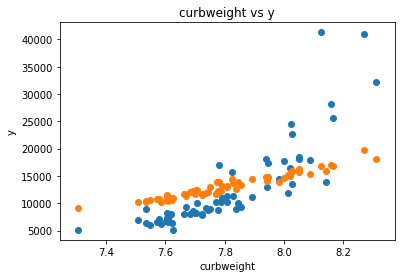

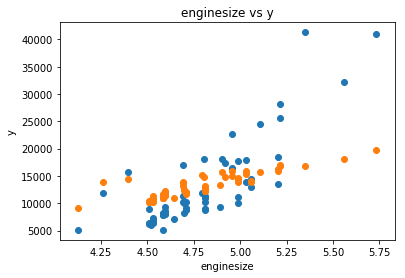

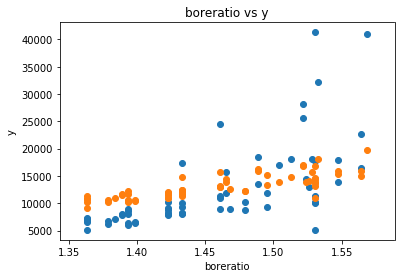

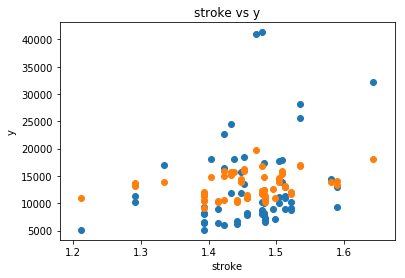

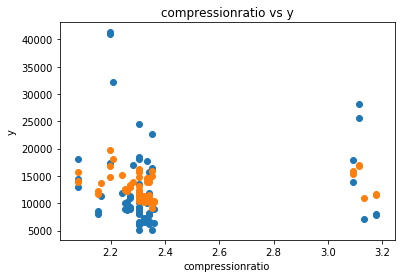

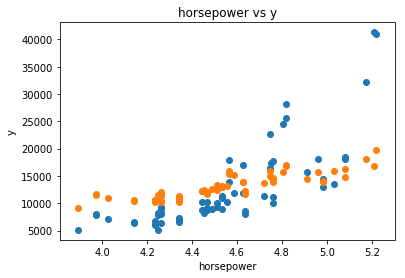

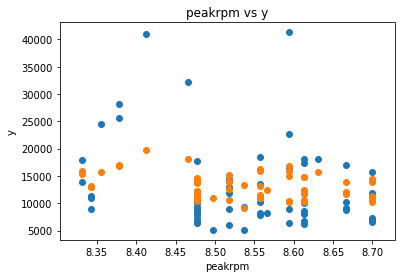

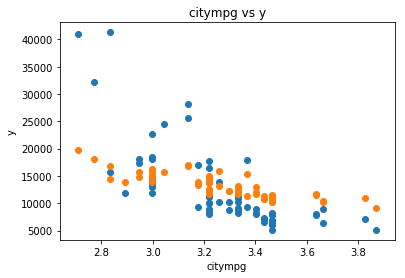

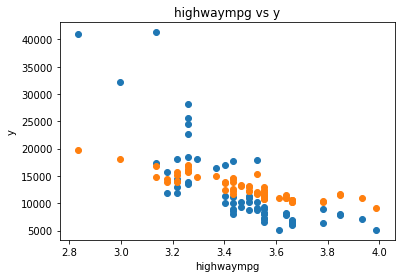

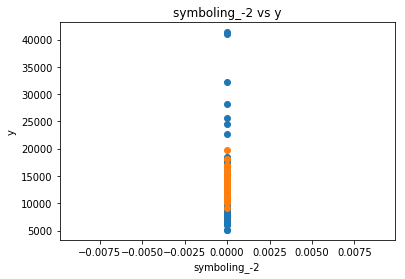

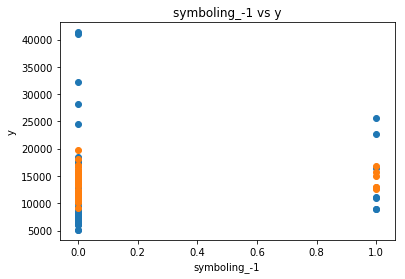

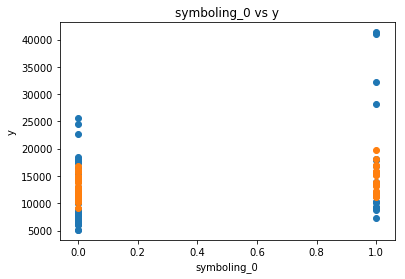

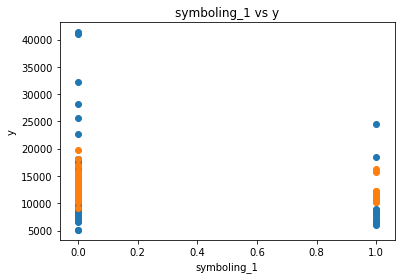

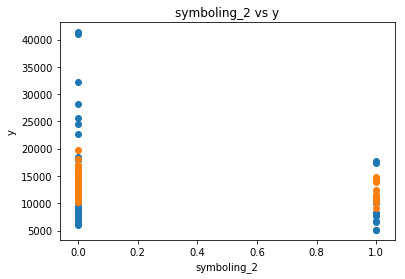

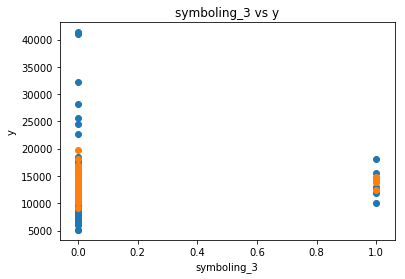

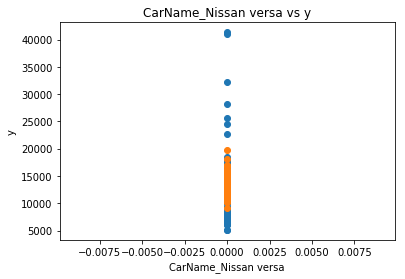

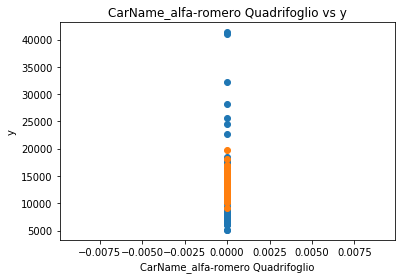

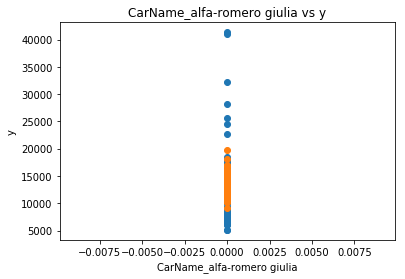

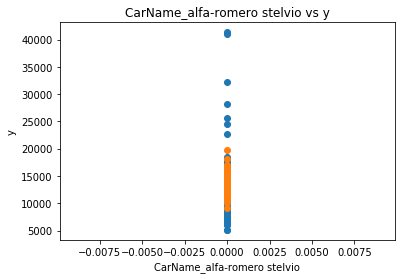

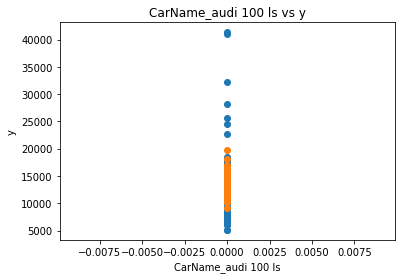

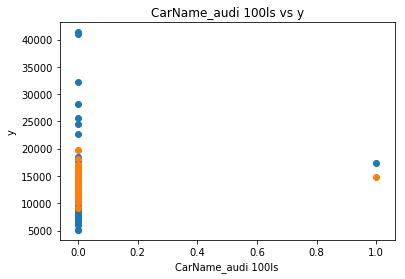

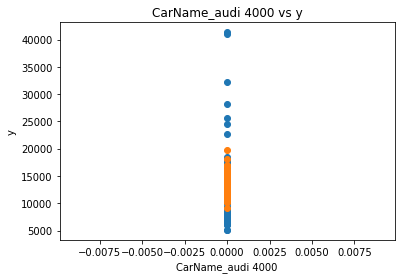

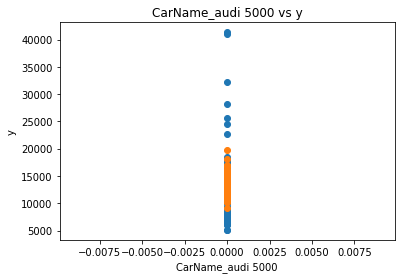

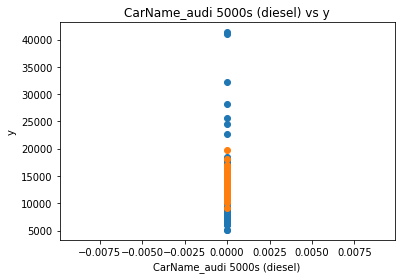

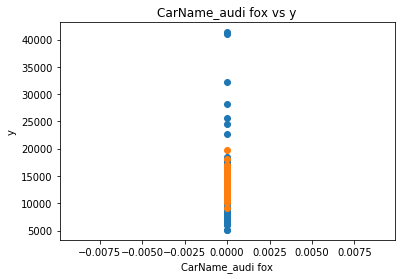

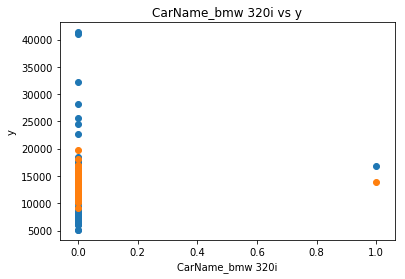

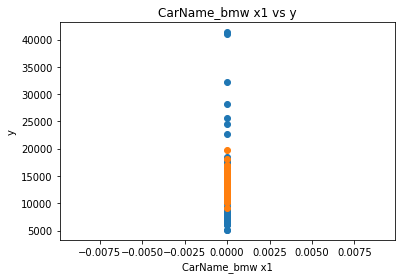

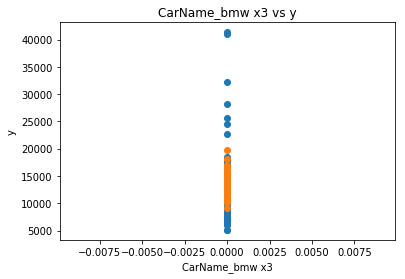

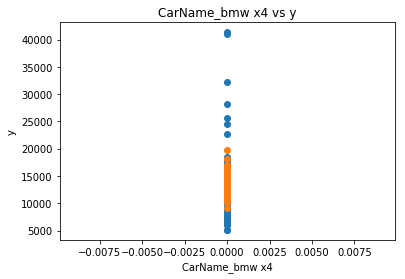

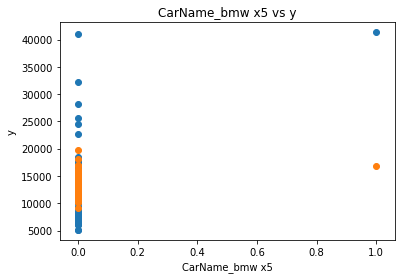

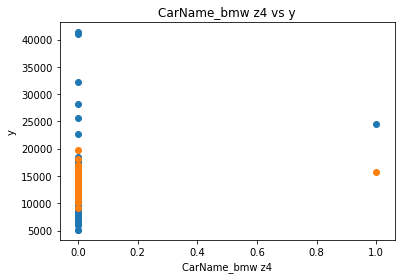

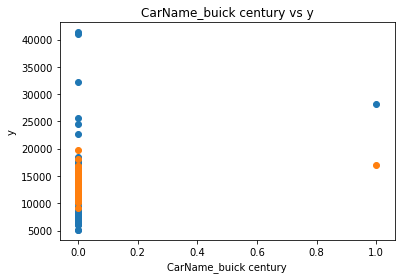

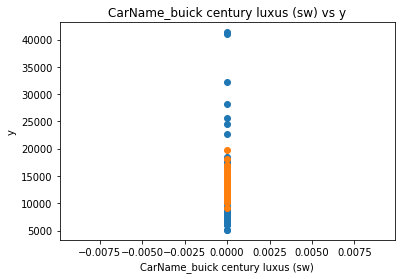

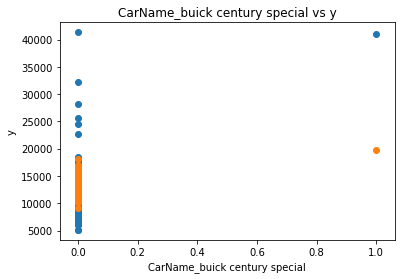

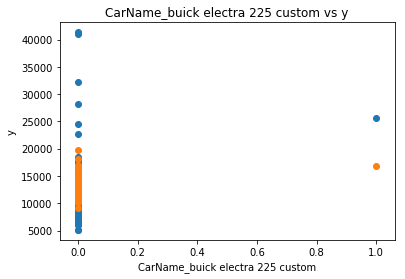

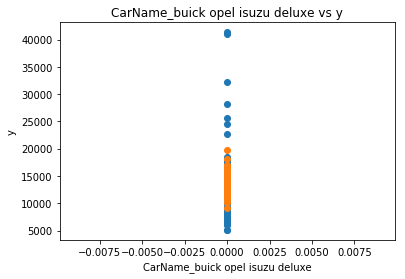

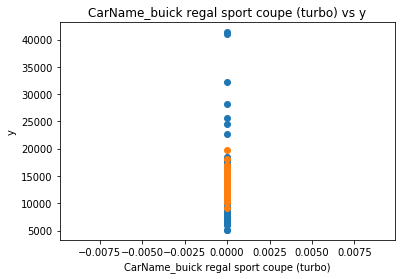

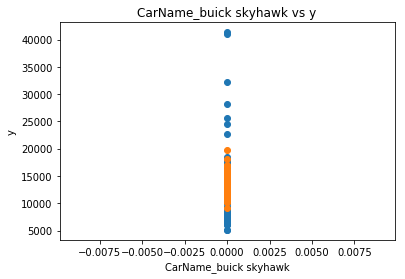

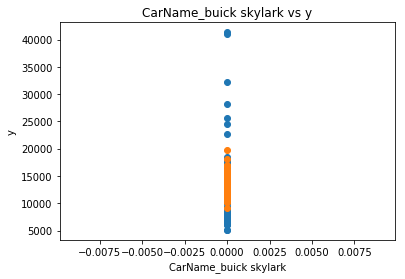

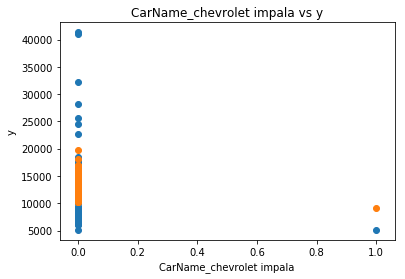

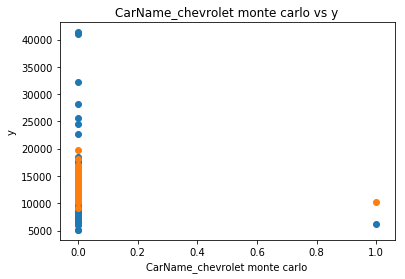

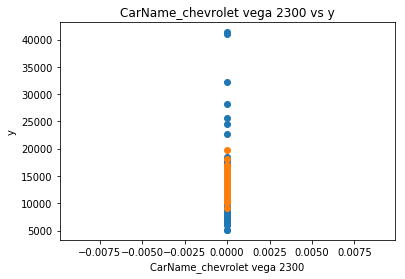

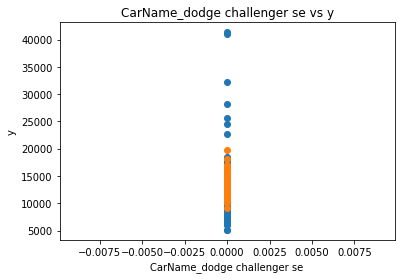

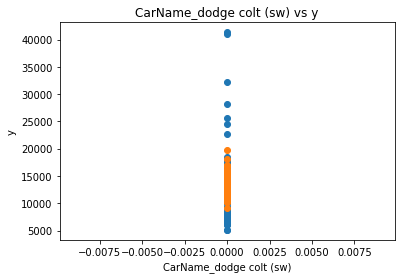

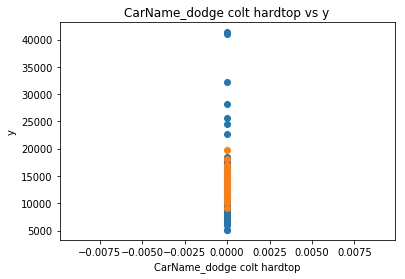

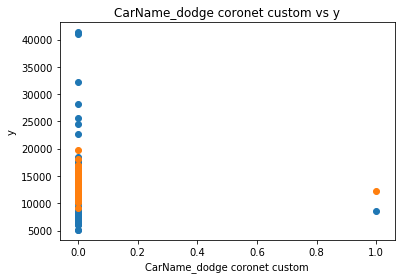

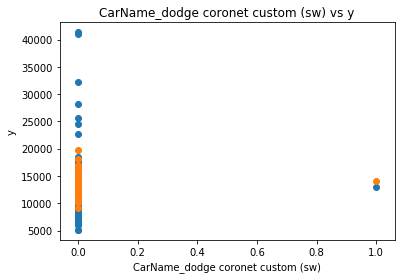

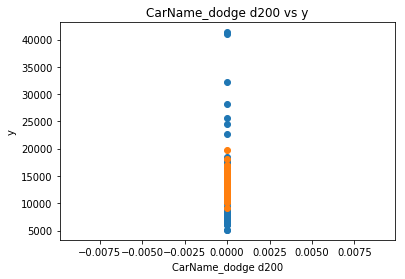

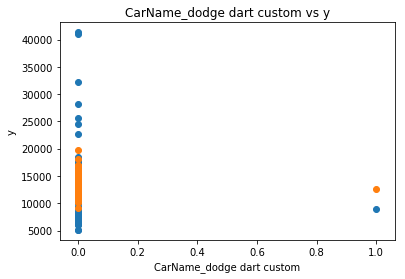

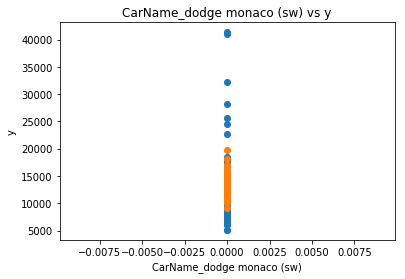

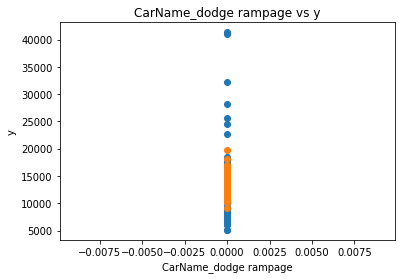

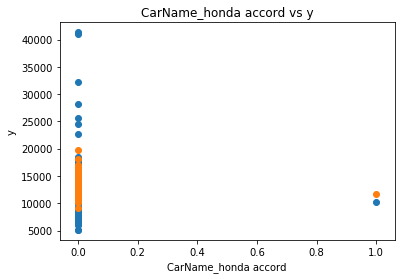

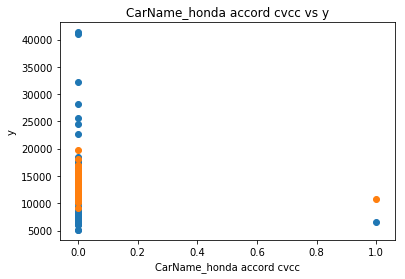

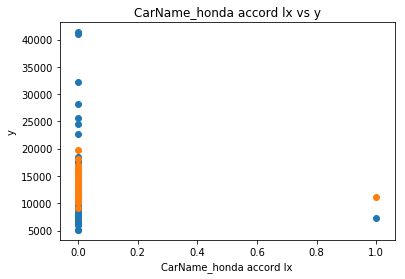

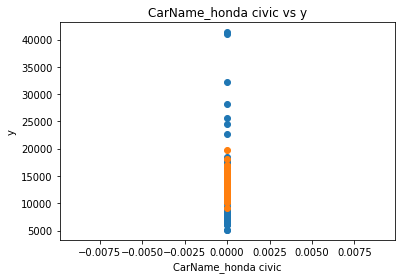

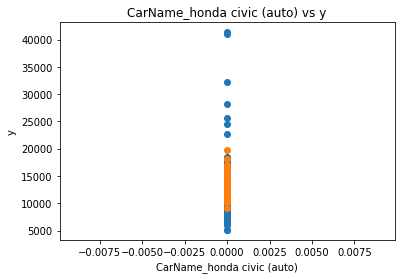

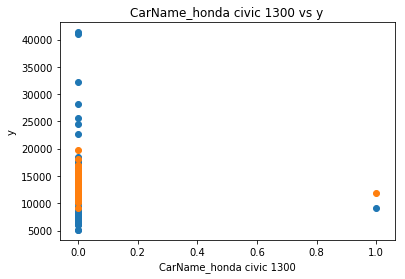

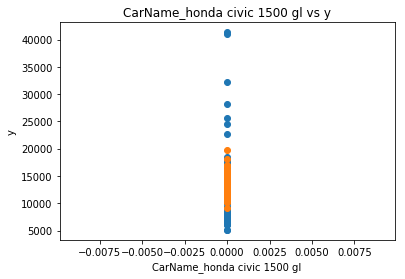

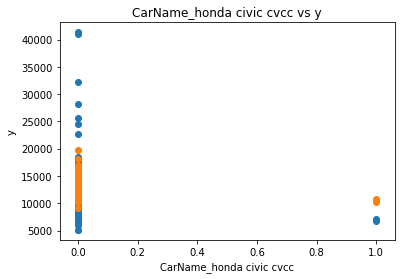

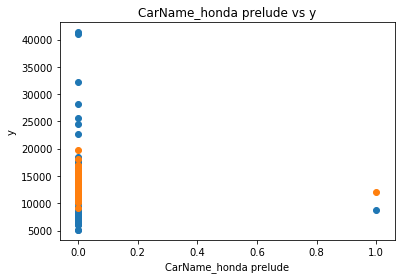

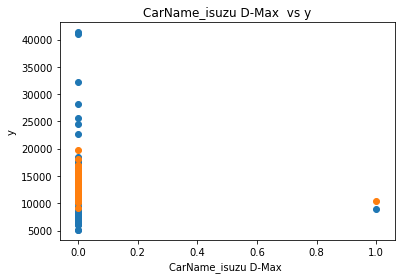

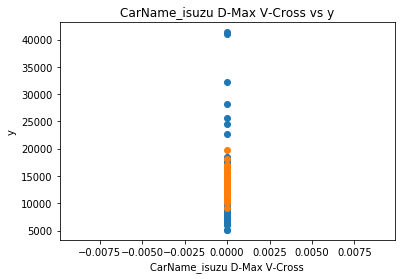

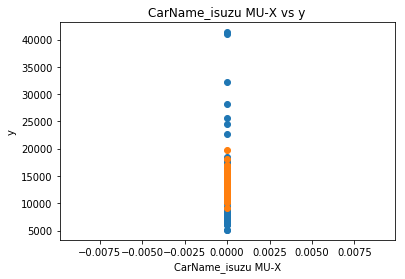

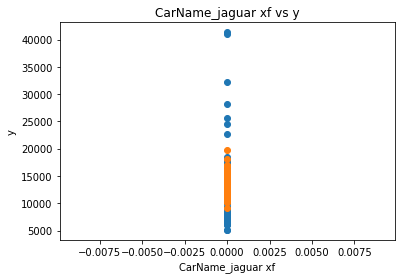

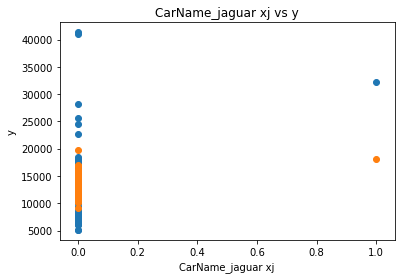

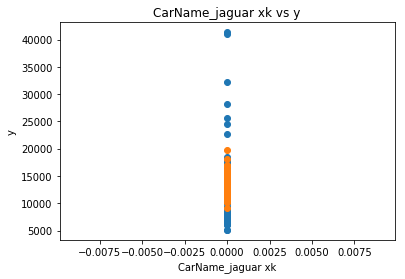

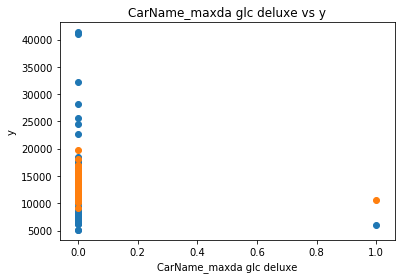

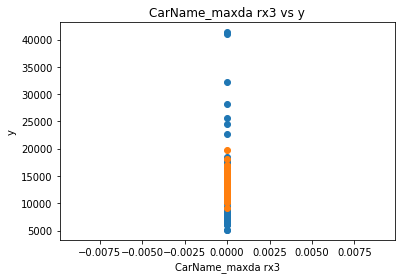

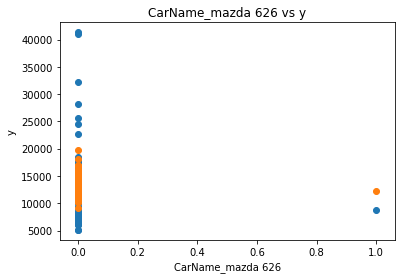

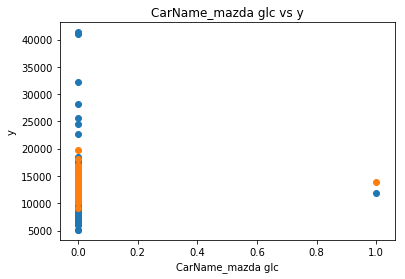

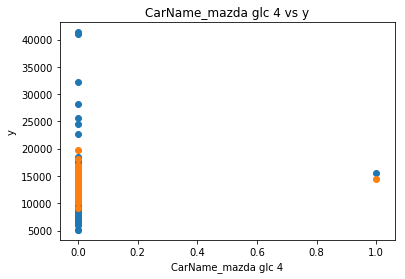

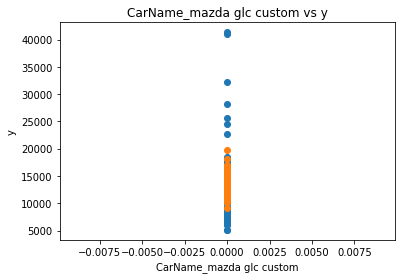

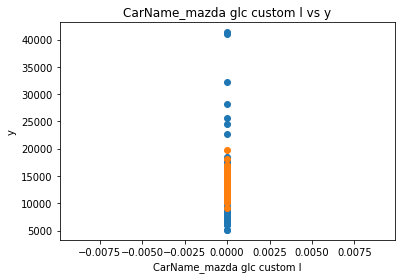

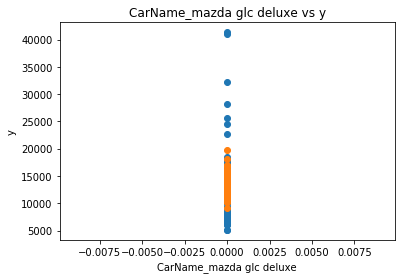

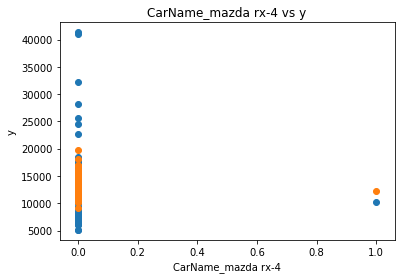

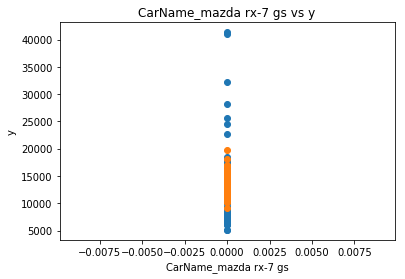

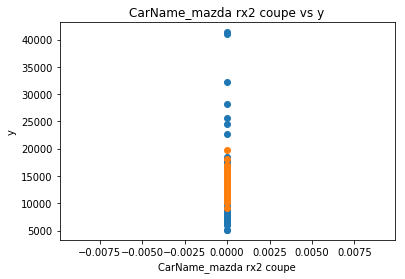

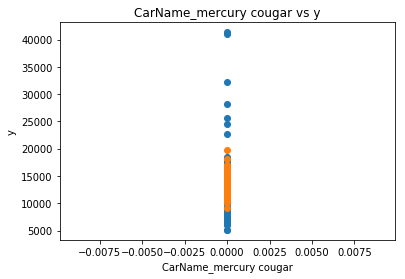

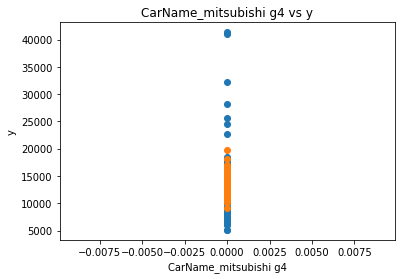

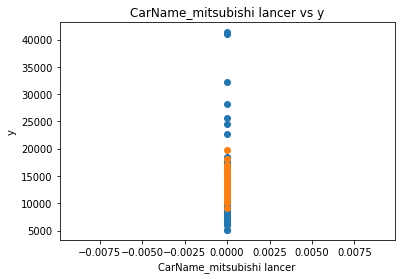

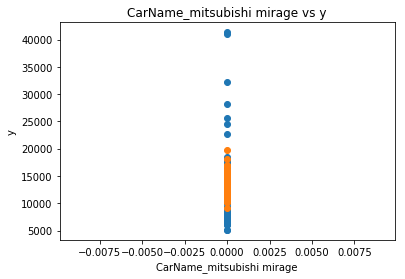

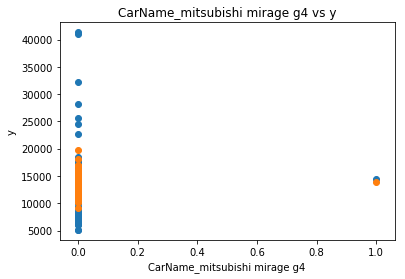

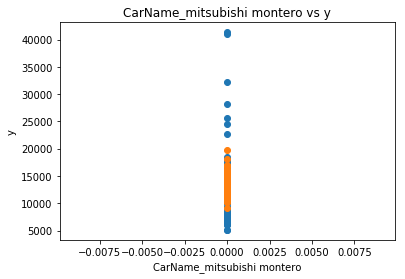

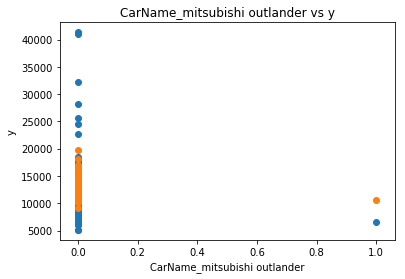

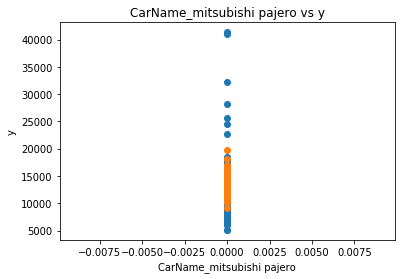

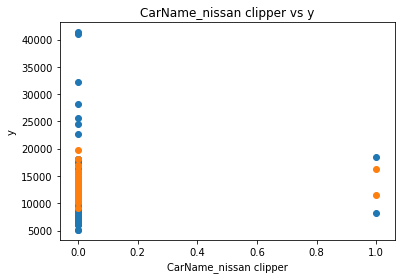

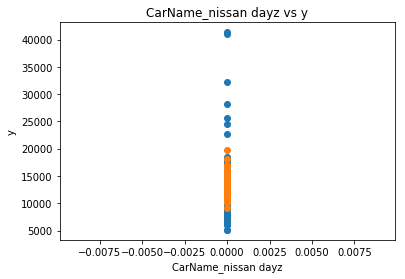

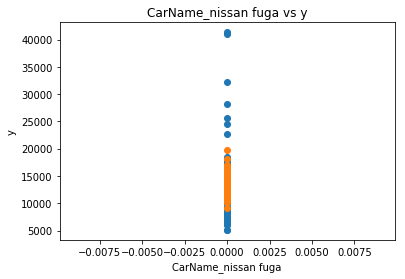

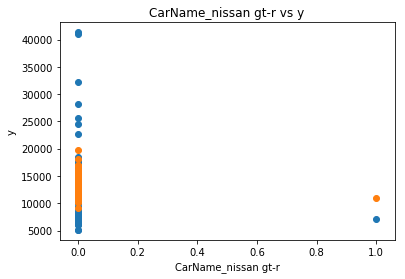

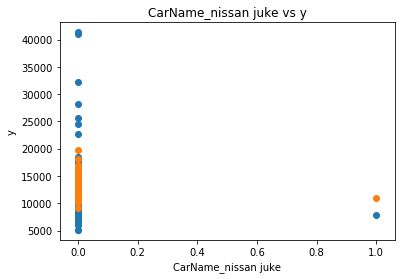

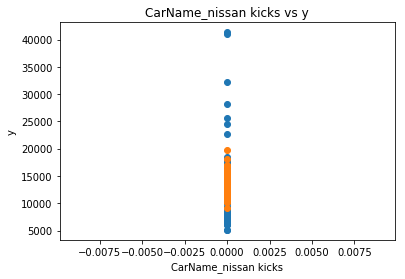

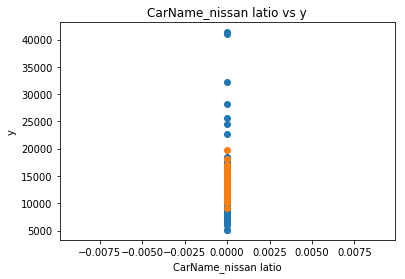

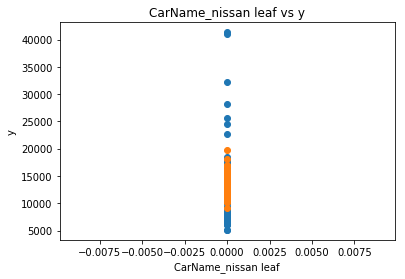

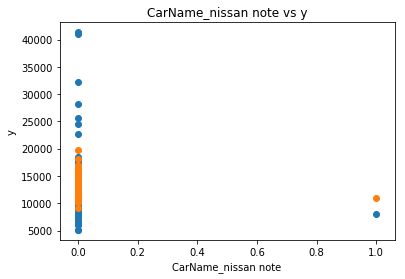

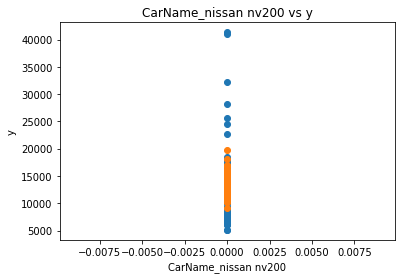

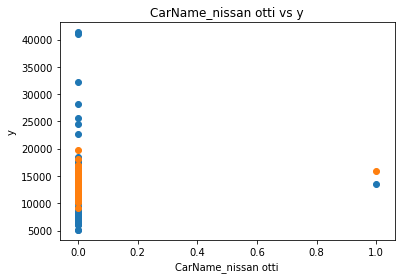

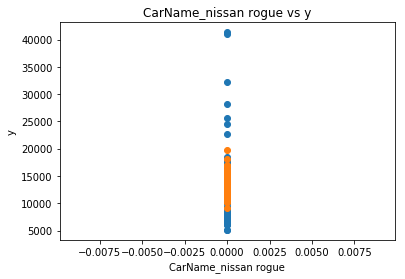

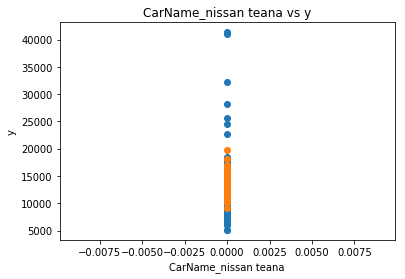

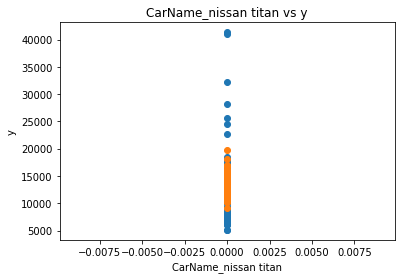

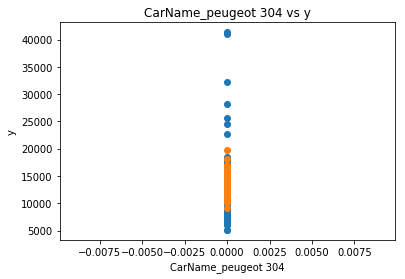

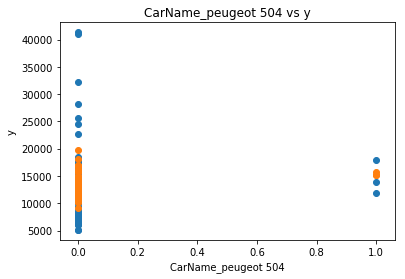

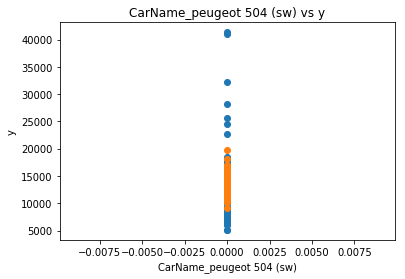

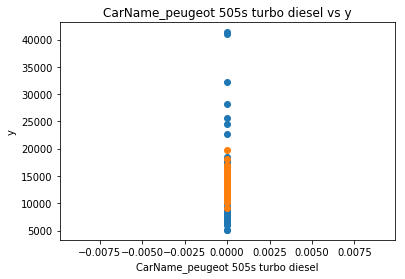

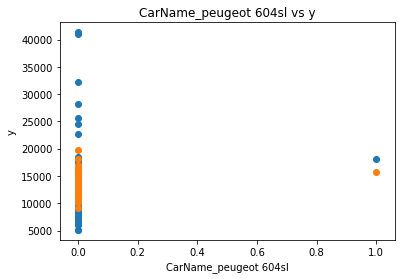

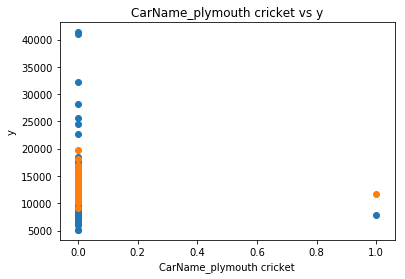

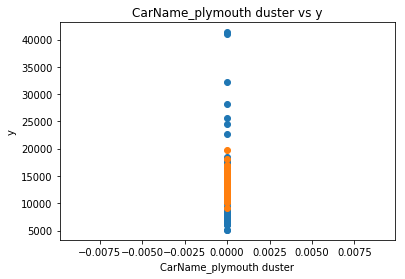

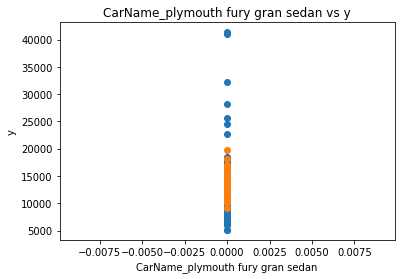

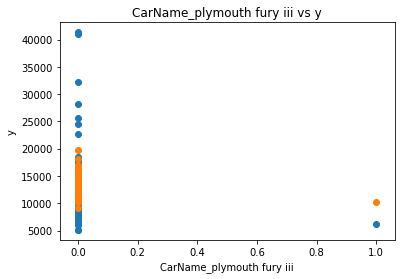

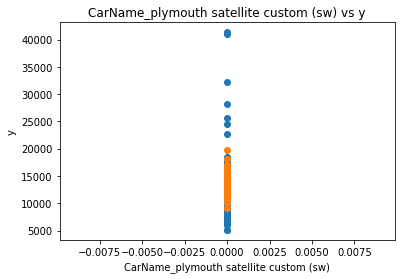

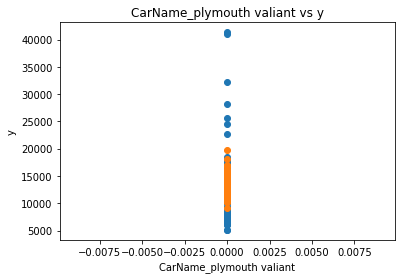

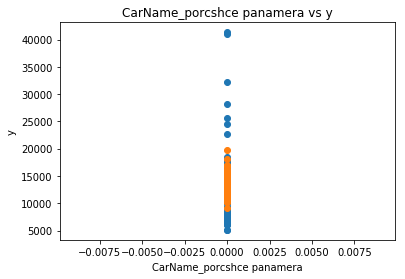

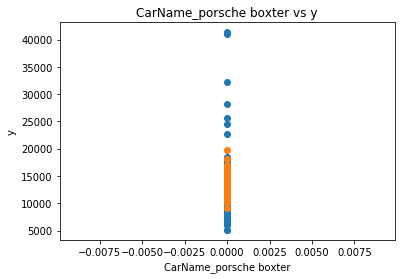

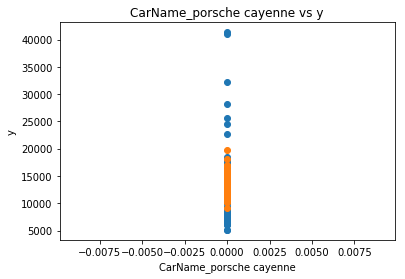

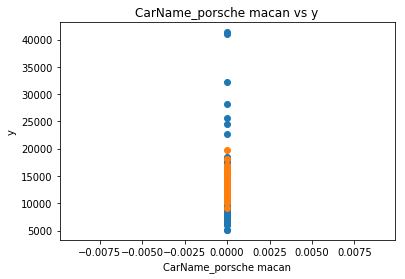

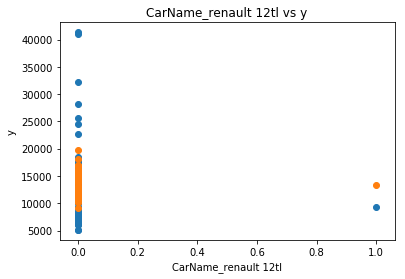

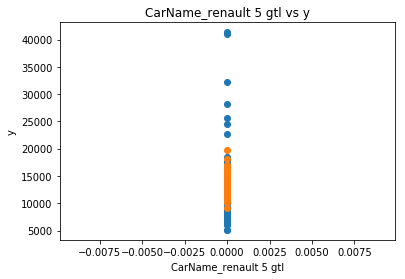

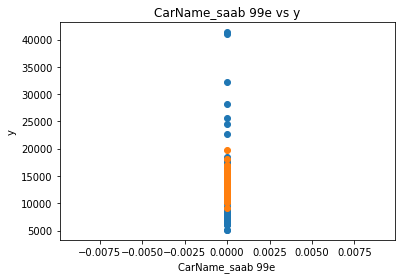

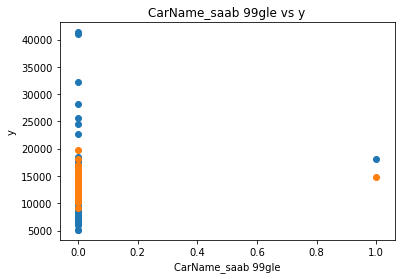

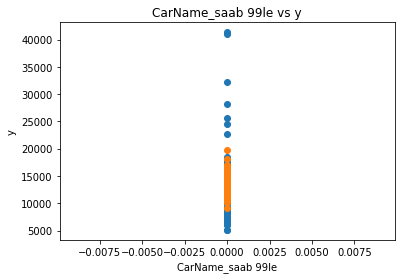

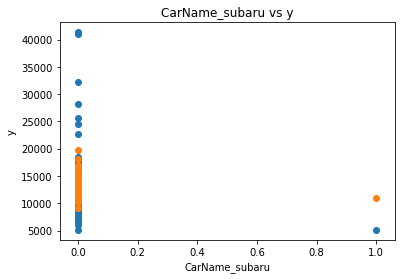

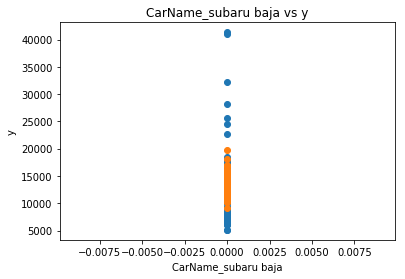

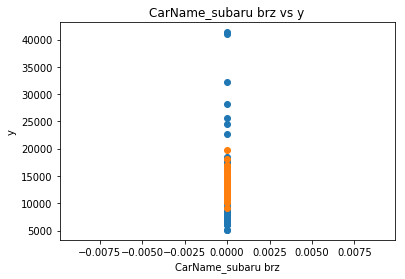

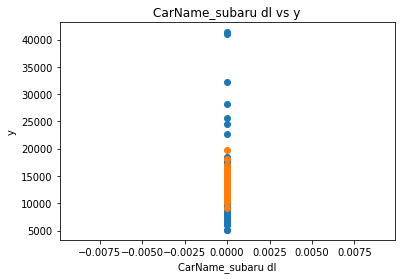

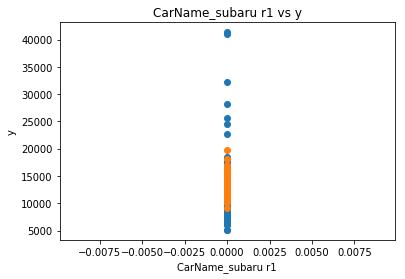

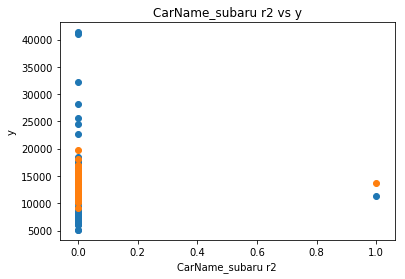

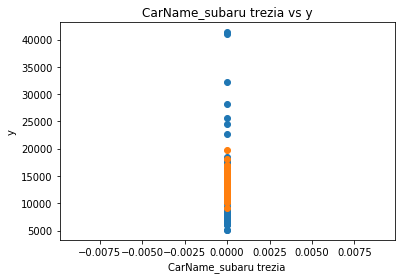

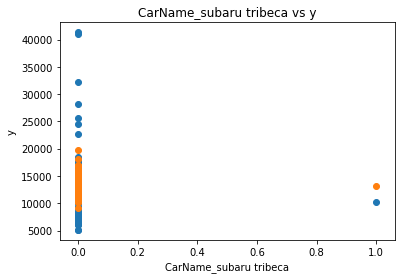

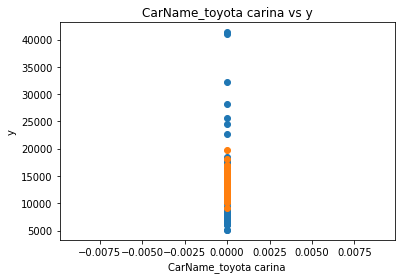

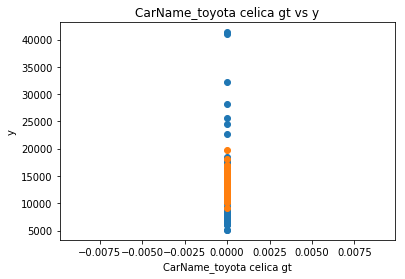

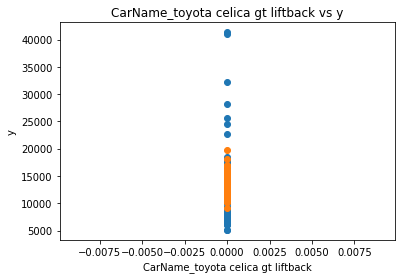

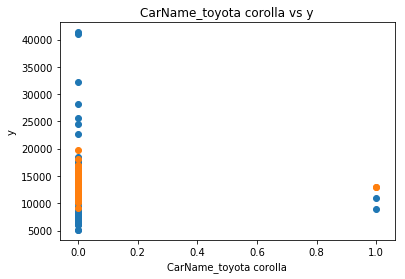

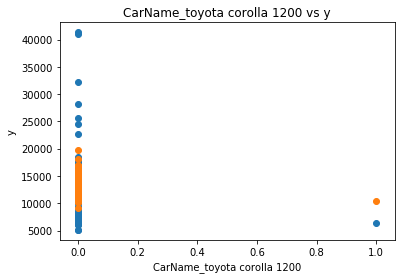

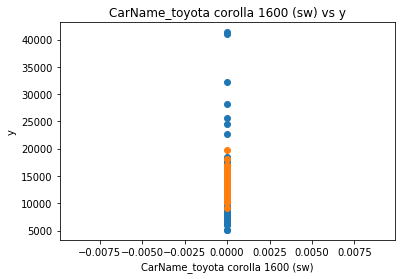

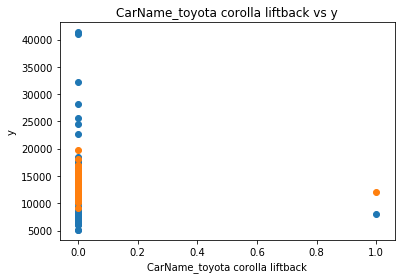

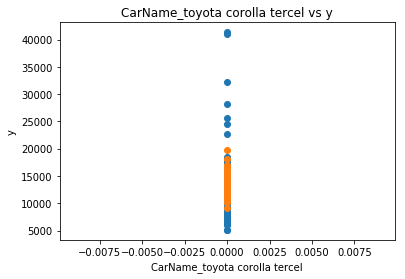

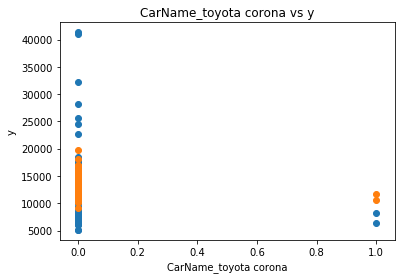

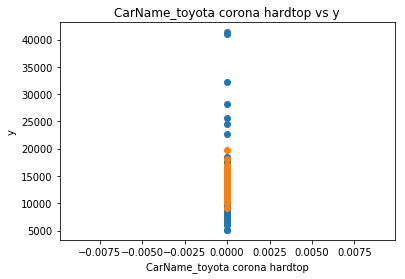

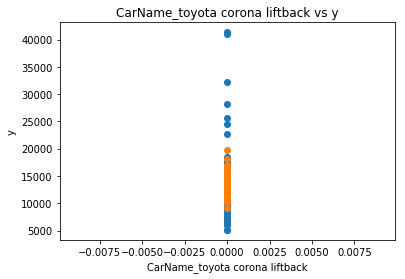

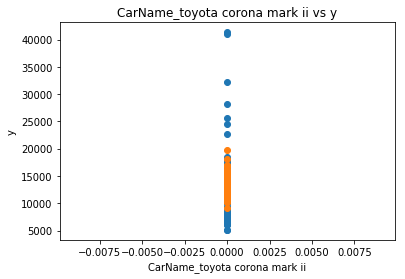

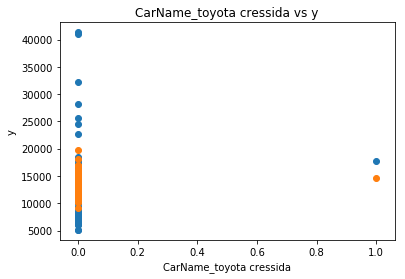

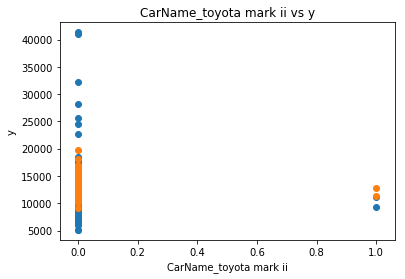

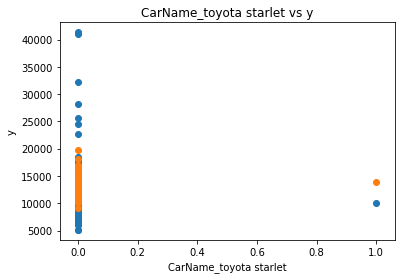

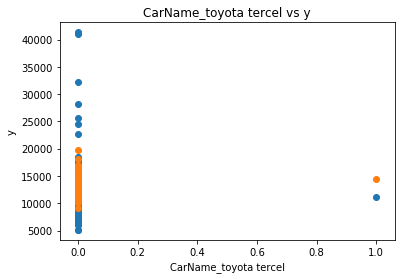

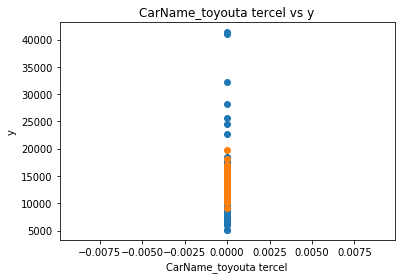

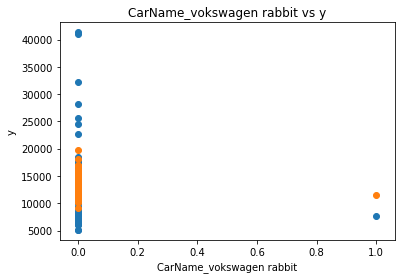

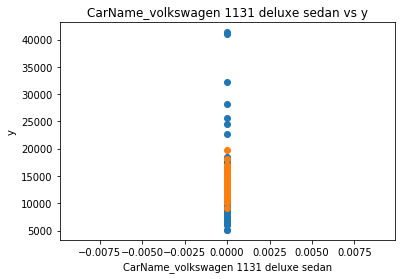

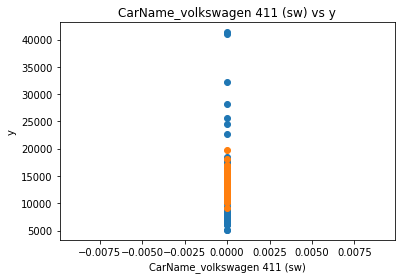

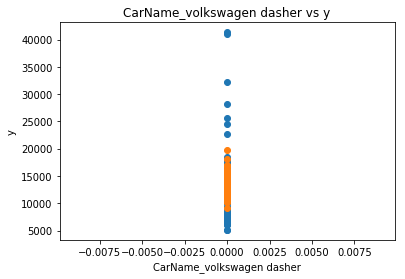

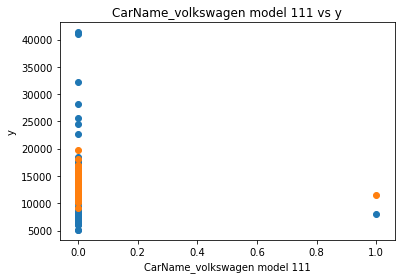

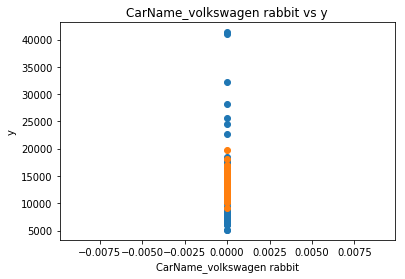

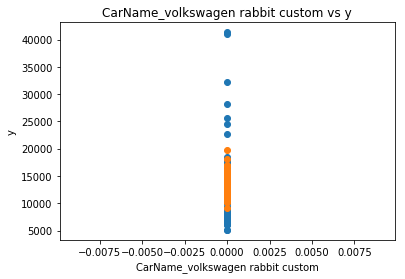

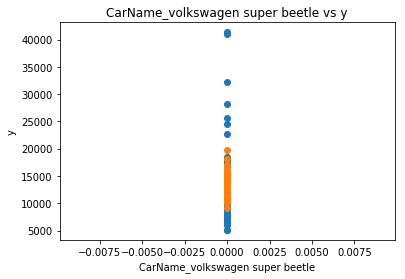

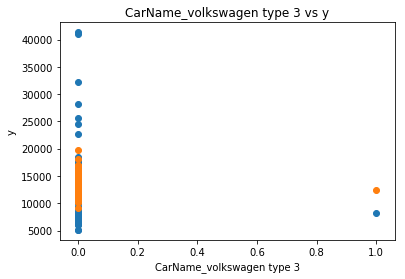

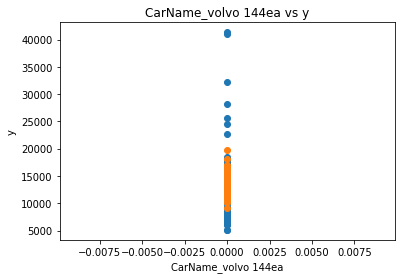

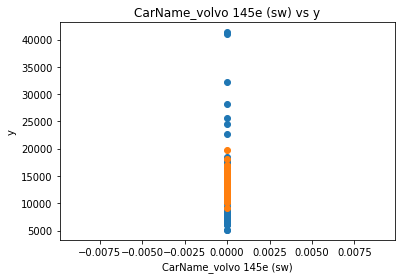

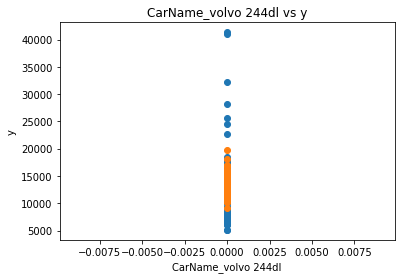

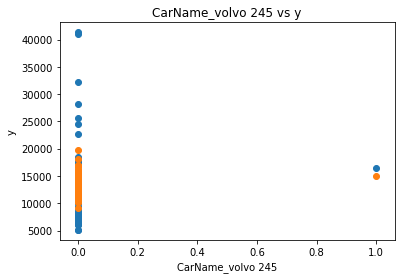

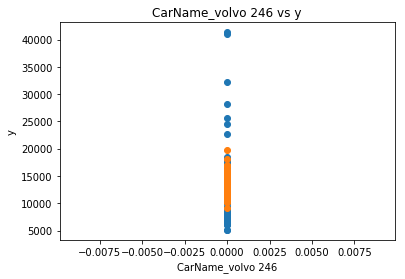

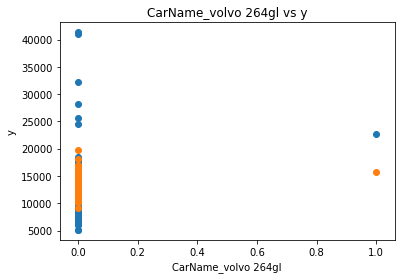

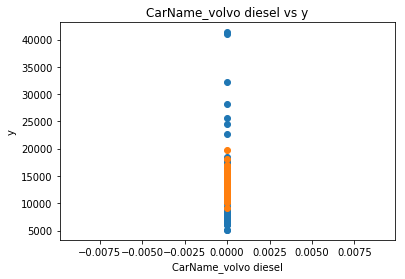

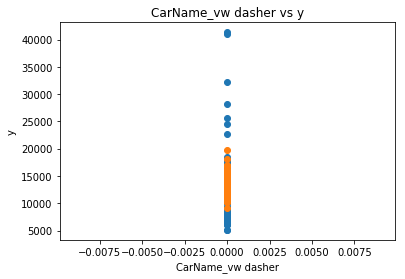

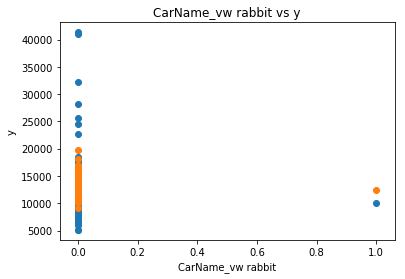

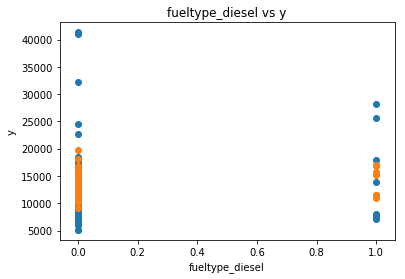

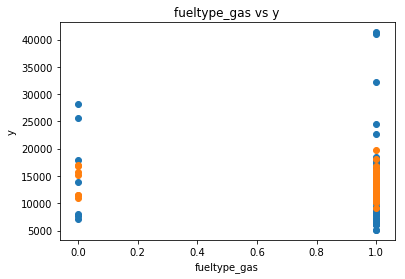

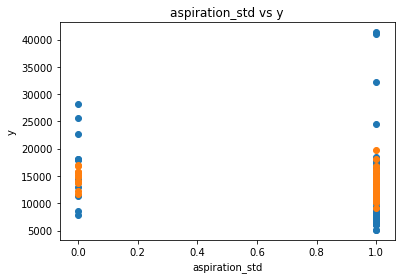

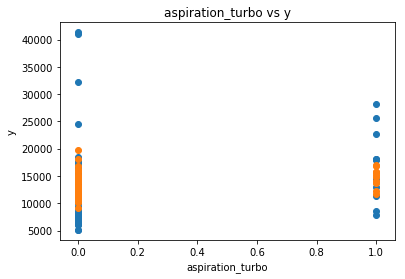

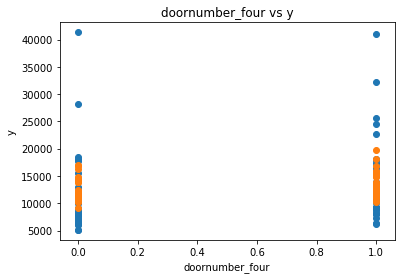

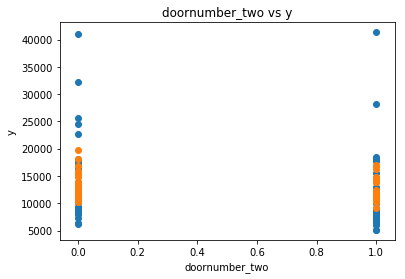

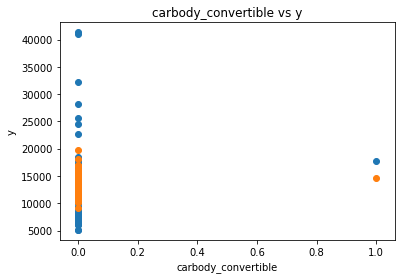

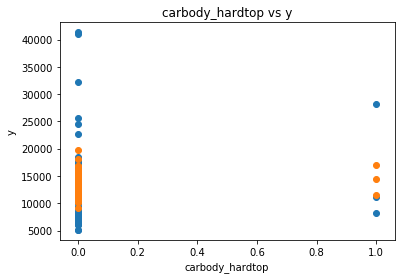

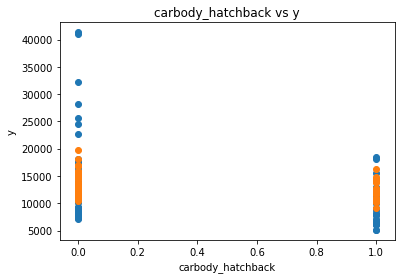

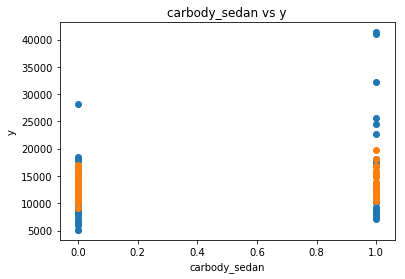

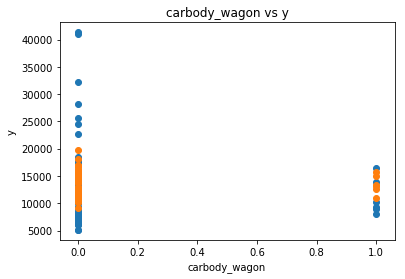

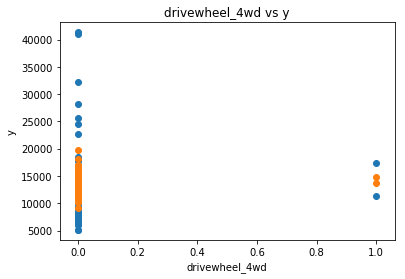

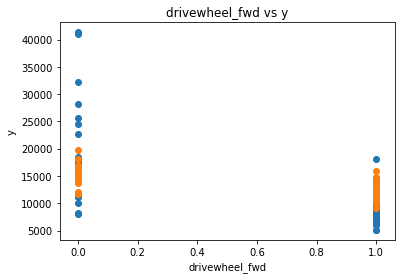

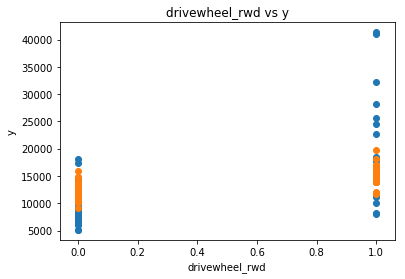

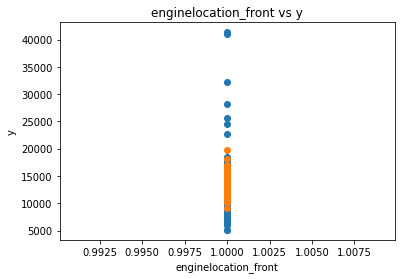

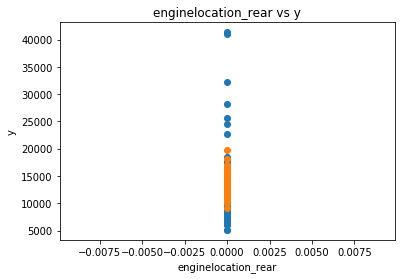

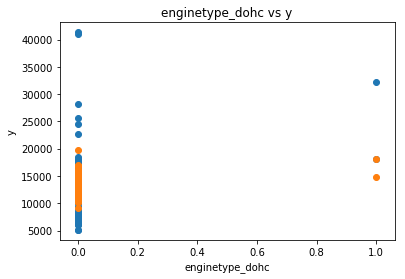

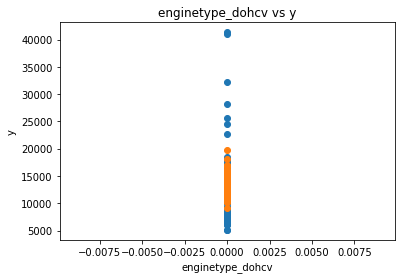

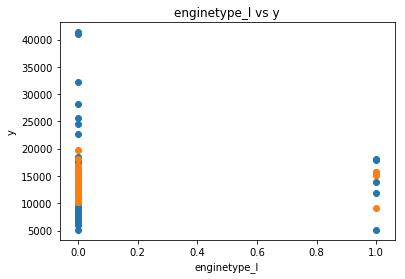

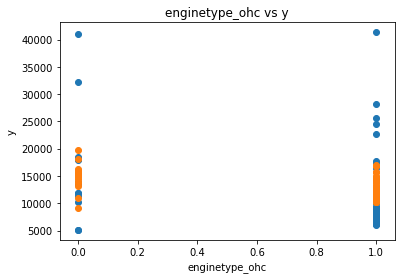

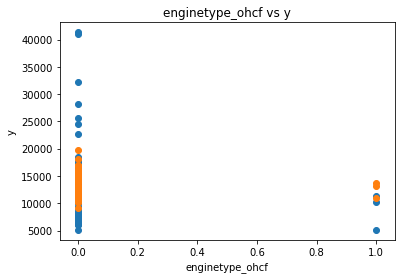

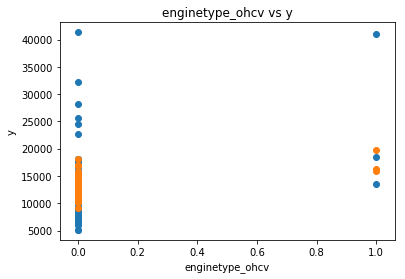

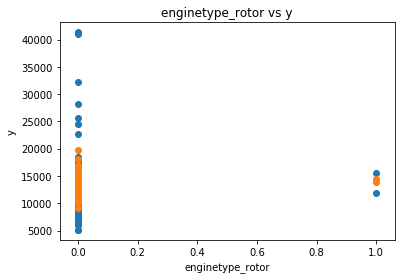

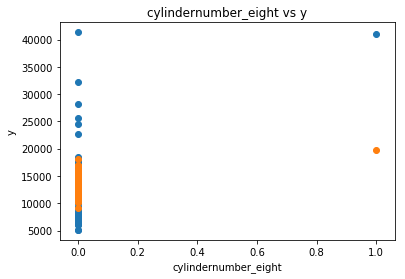

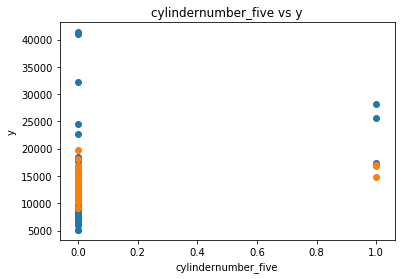

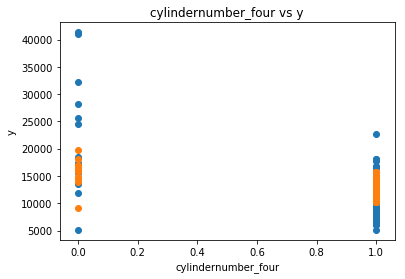

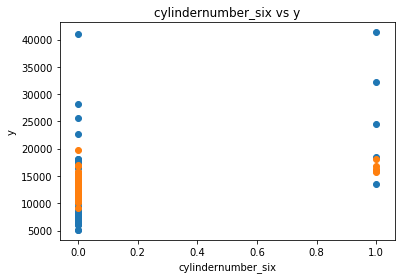

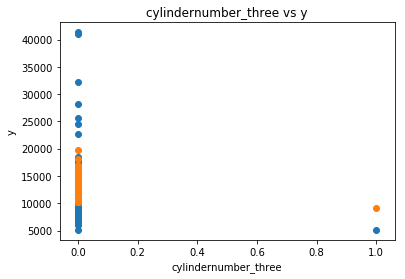

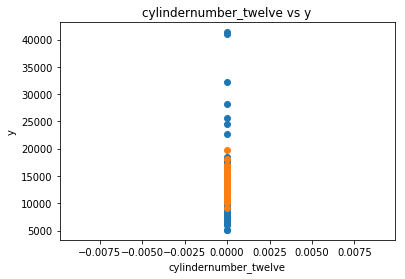

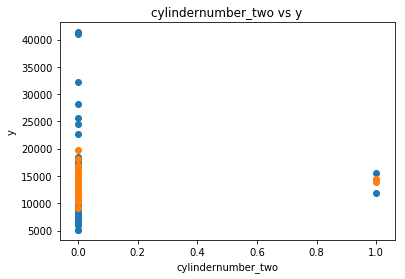

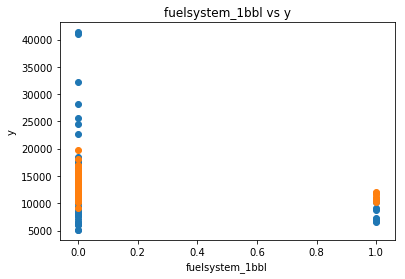

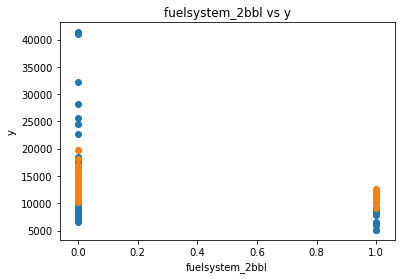

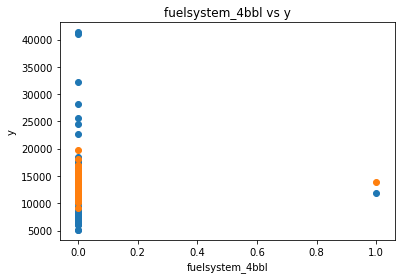

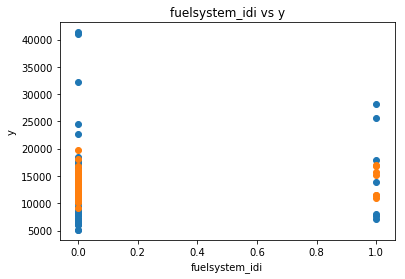

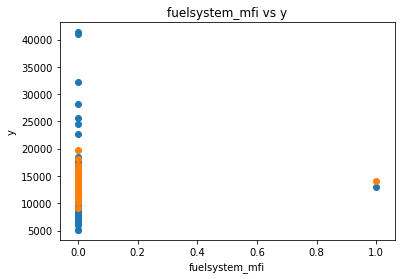

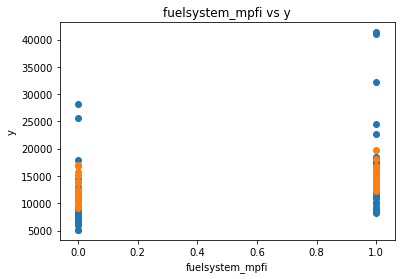

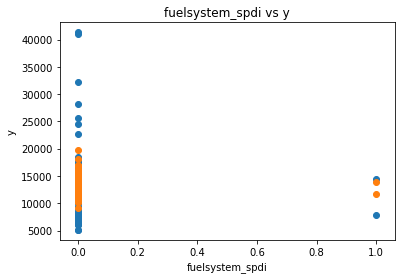

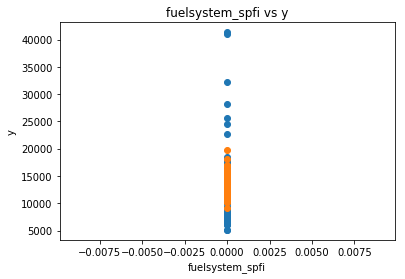

In [54]:
for i in xtest.columns:
    plt.scatter(xtest[i],ytest)
    plt.scatter(xtest[i],ypred_rr)
    plt.title(i+' vs y')
    plt.xlabel(i)
    plt.ylabel('y')
    plt.show()

In [56]:
rr2 = Ridge(alpha = 50.5, normalize=True, random_state=3)
rr2 = rr2.fit(xtrain,ytrain)
print(rr2.score(xtrain,ytrain))
ypred_rr2 = rr2.predict(xtest)
print(metrics.mean_squared_error(ytest,ypred_rr2))
print(metrics.r2_score(ytest,ypred_rr2))

0.269210733780211
46295684.463095315
0.23314213853313603


In [57]:
rr3 = Ridge(alpha = 10.5, normalize=True, random_state=3)
rr3 = rr3.fit(xtrain,ytrain)
print(rr3.score(xtrain,ytrain))
ypred_rr3 = rr3.predict(xtest)
print(metrics.mean_squared_error(ytest,ypred_rr3))
print(metrics.r2_score(ytest,ypred_rr3))

0.647405061505888
26034258.6672203
0.5687594608880981


In [58]:
rr4 = Ridge(alpha = 5.5, normalize=True, random_state=3)
rr4 = rr4.fit(xtrain,ytrain)
print(rr4.score(xtrain,ytrain))
ypred_rr4 = rr4.predict(xtest)
print(metrics.mean_squared_error(ytest,ypred_rr4))
print(metrics.r2_score(ytest,ypred_rr4))

0.7773456736811654
19601570.293807577
0.6753127542830872


In [59]:
rr5 = Ridge(alpha = 1, normalize=True, random_state=3)
rr5 = rr5.fit(xtrain,ytrain)
print(rr5.score(xtrain,ytrain))
ypred_rr5 = rr5.predict(xtest)
print(metrics.mean_squared_error(ytest,ypred_rr5))
print(metrics.r2_score(ytest,ypred_rr5))

0.9487615942846689
12469017.81715152
0.7934588407376204


In [60]:
rr6 = Ridge(alpha = 0, normalize=True, random_state=3)
rr6 = rr6.fit(xtrain,ytrain)
print(rr6.score(xtrain,ytrain))
ypred_rr6 = rr6.predict(xtest)
print(metrics.mean_squared_error(ytest,ypred_rr6))
print(metrics.r2_score(ytest,ypred_rr6))

1.0
35935974.93241874
0.40474397978996934


C:\Users\Anupama\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=9.1047e-17): result may not be accurate.
  overwrite_a=False)


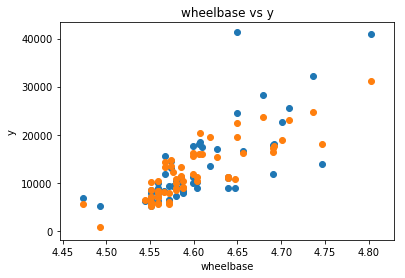

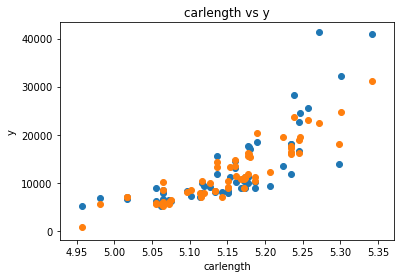

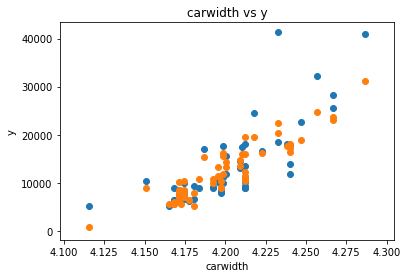

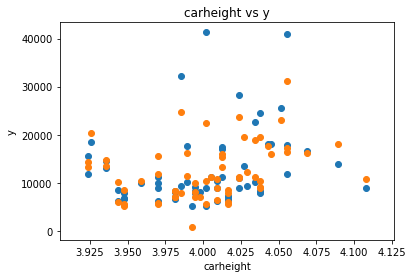

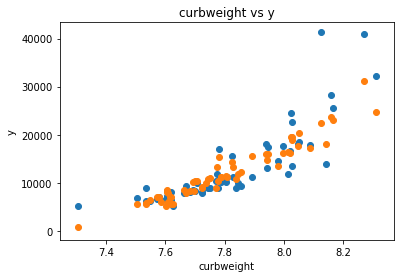

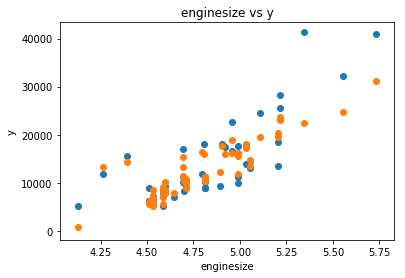

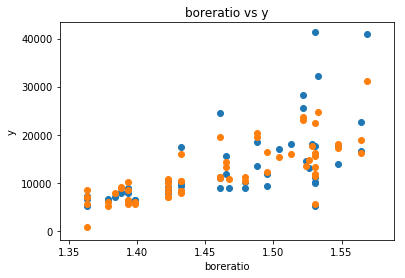

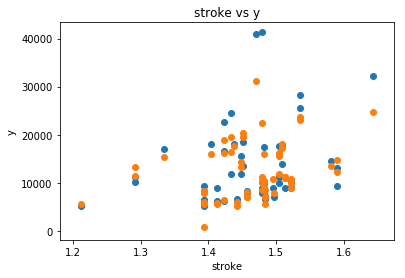

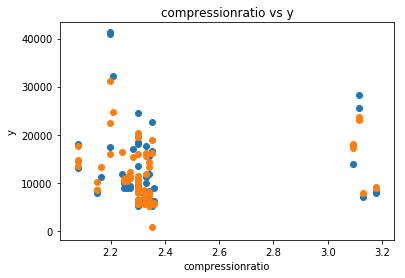

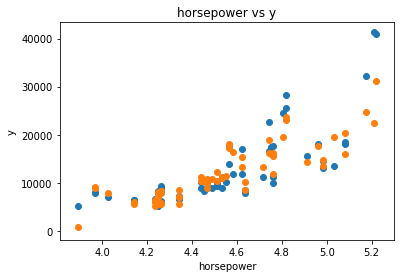

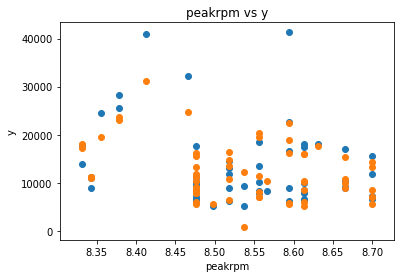

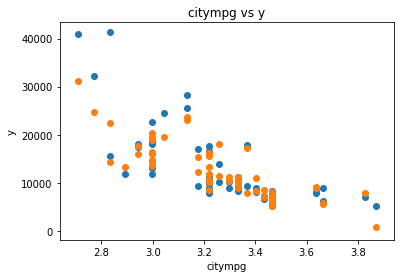

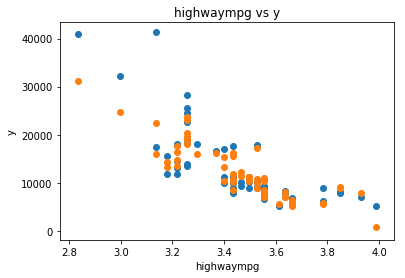

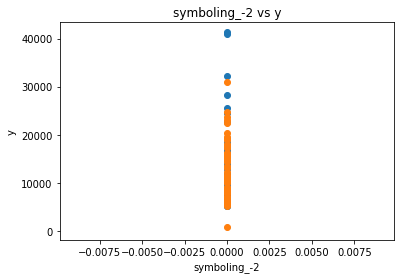

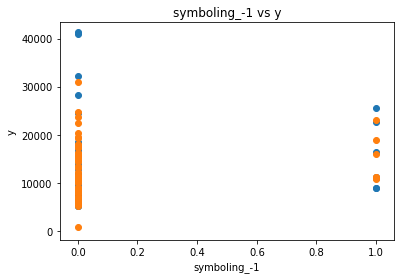

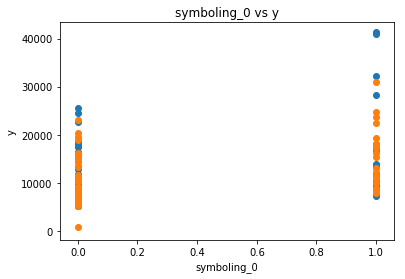

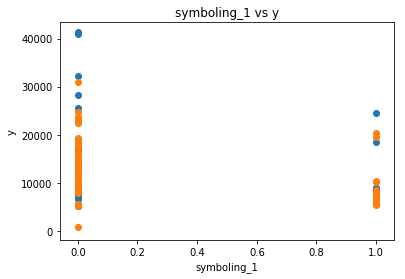

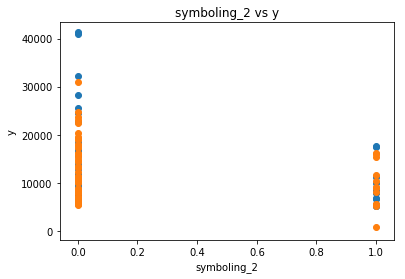

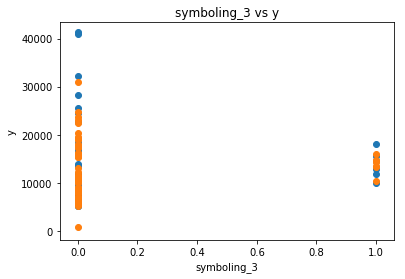

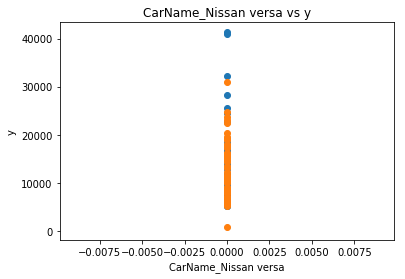

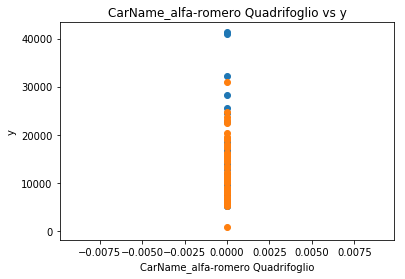

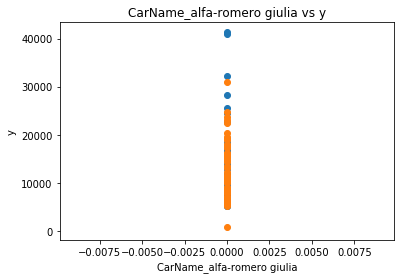

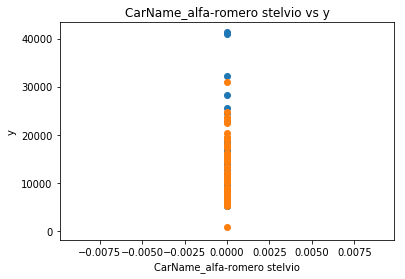

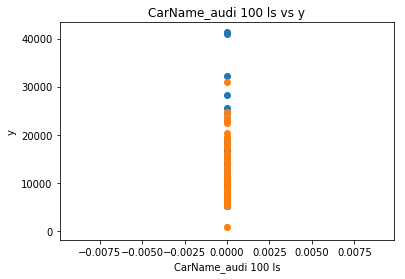

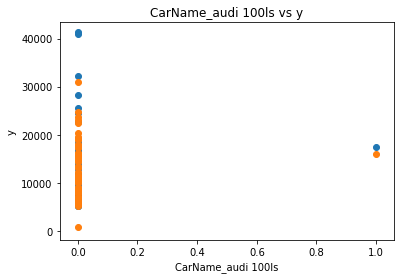

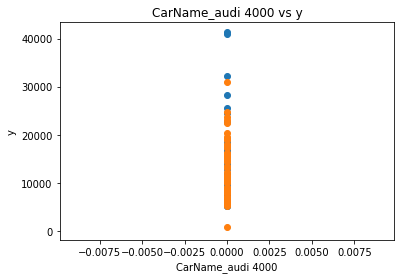

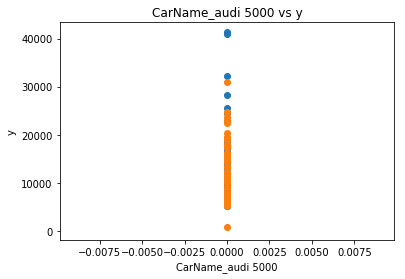

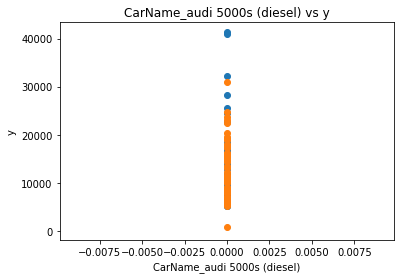

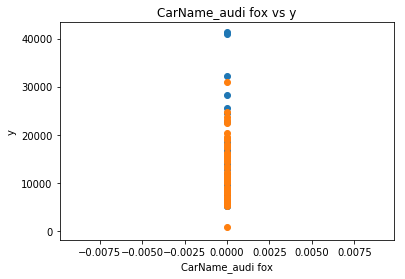

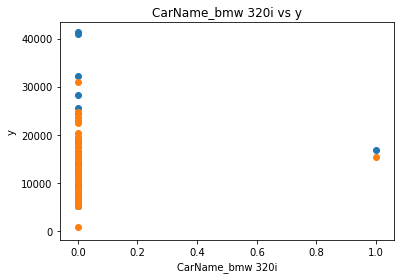

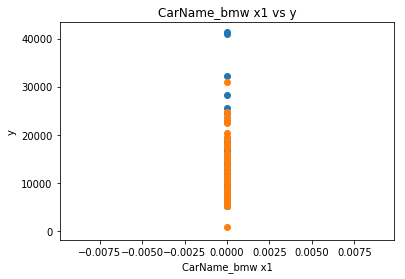

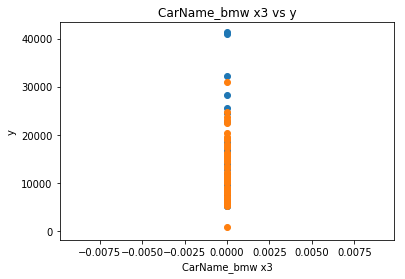

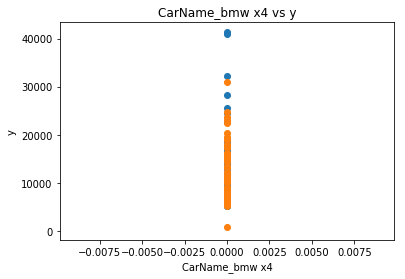

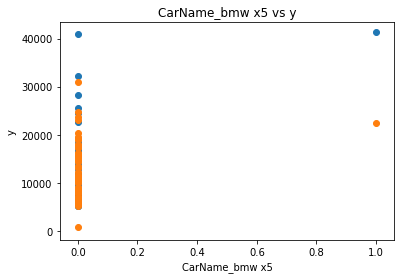

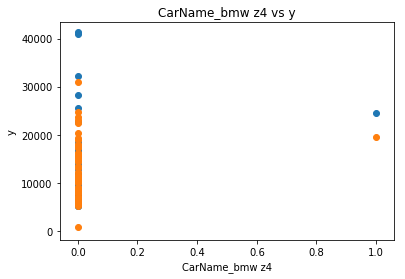

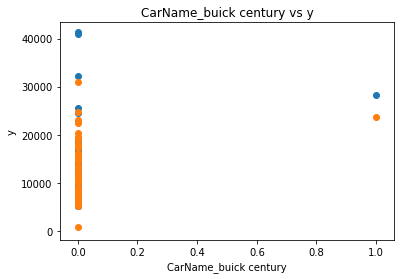

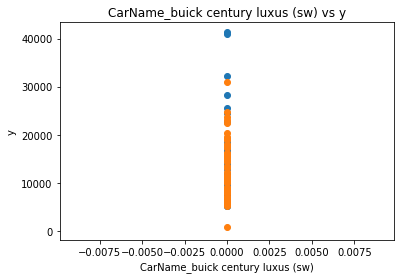

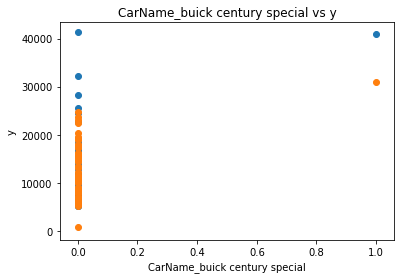

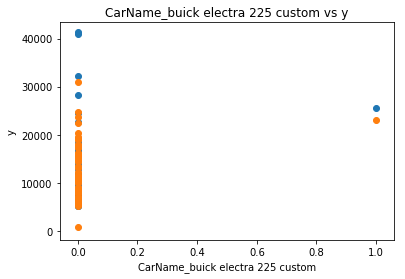

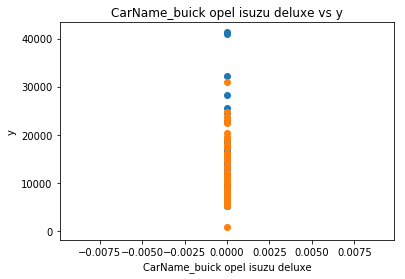

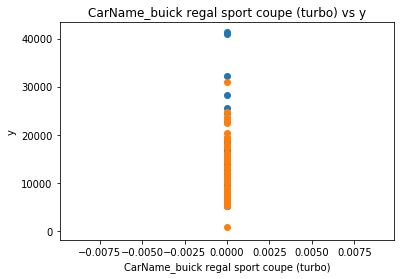

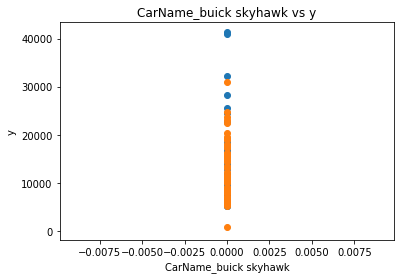

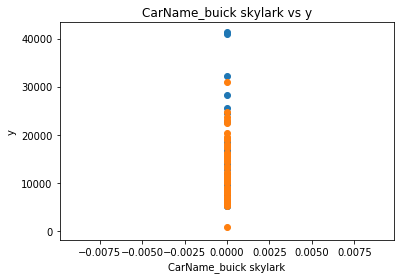

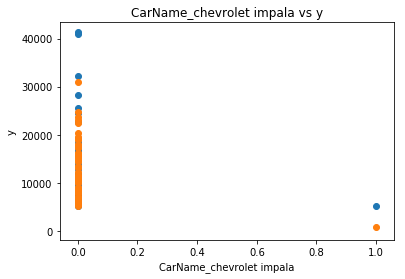

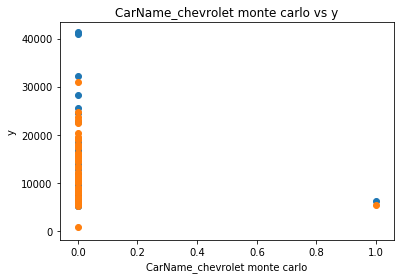

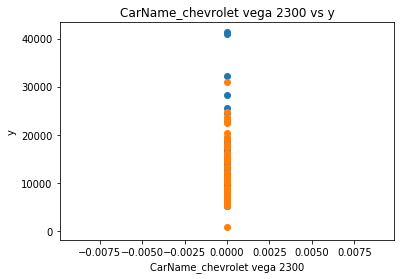

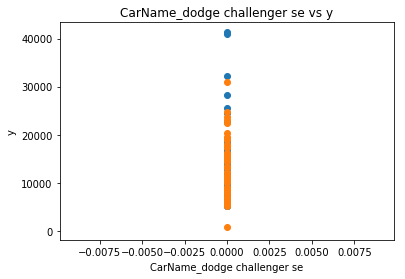

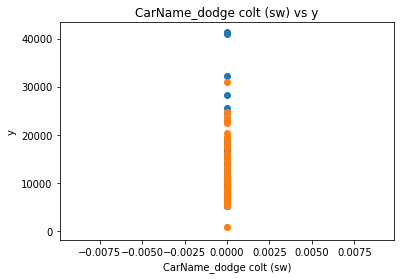

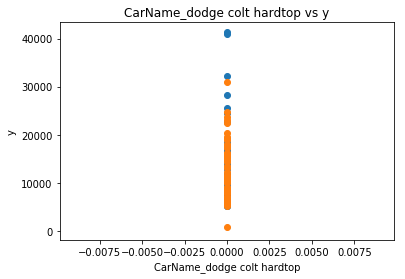

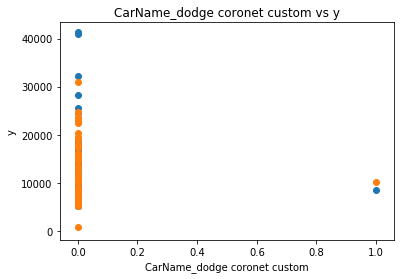

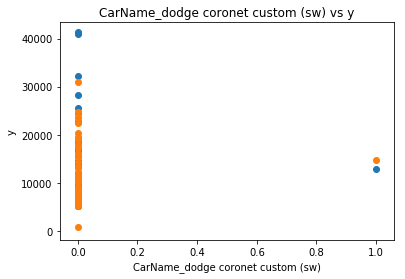

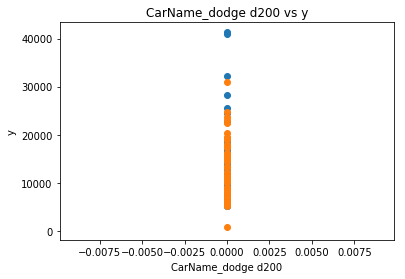

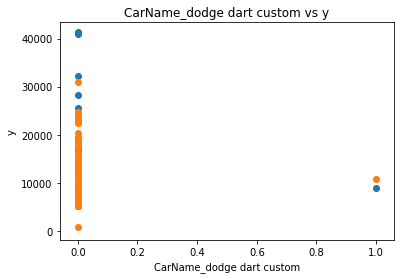

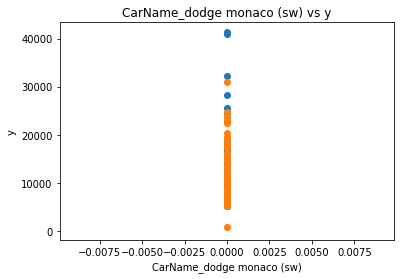

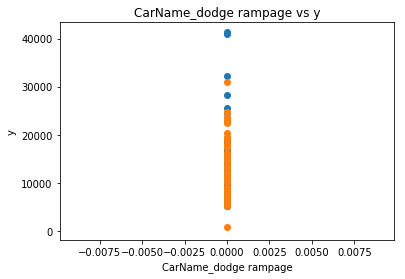

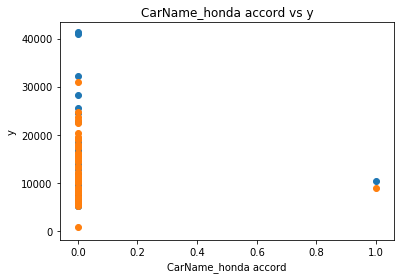

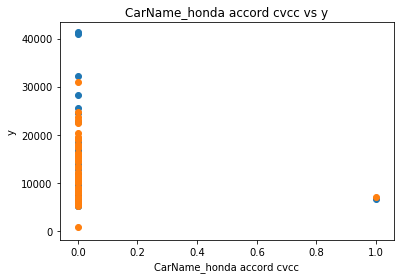

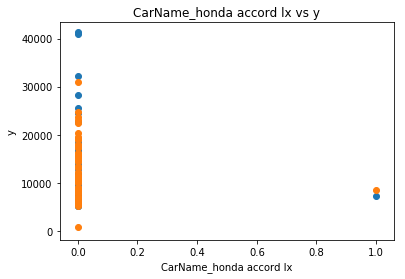

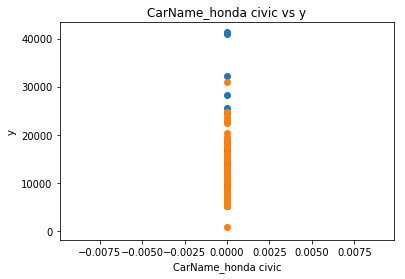

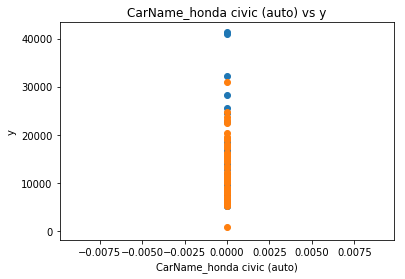

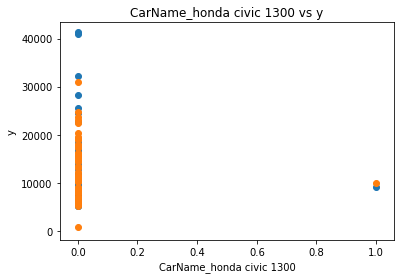

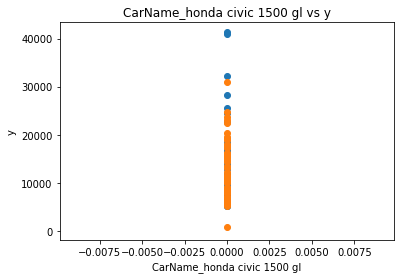

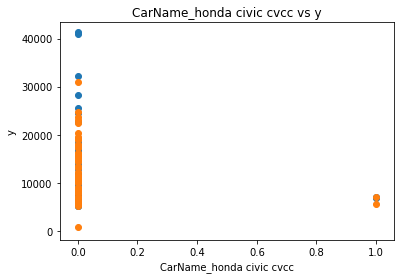

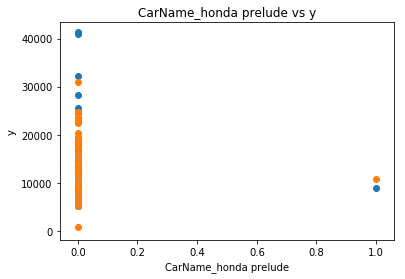

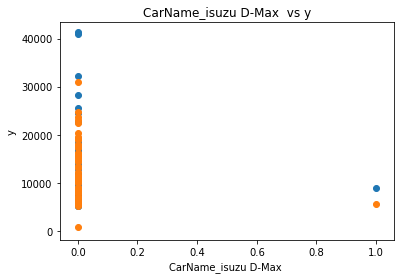

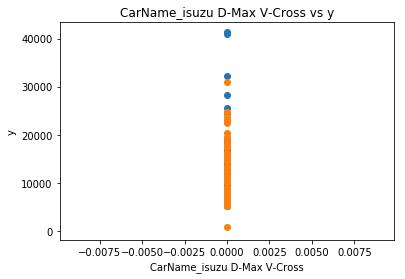

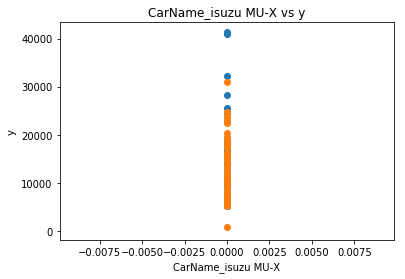

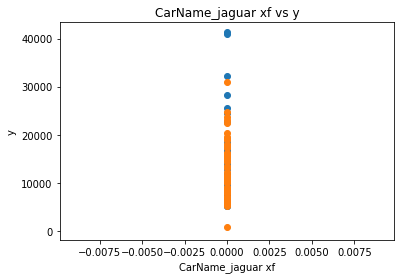

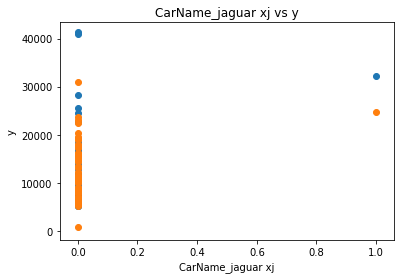

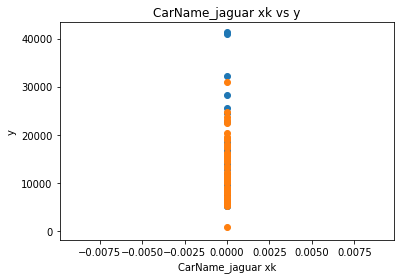

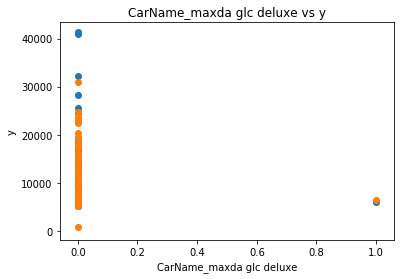

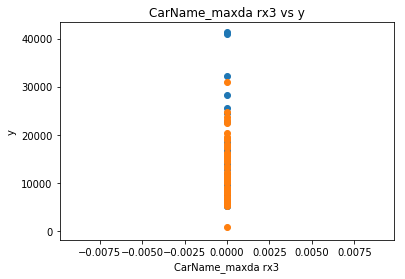

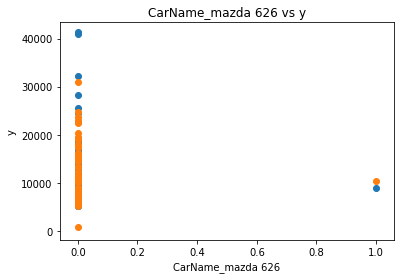

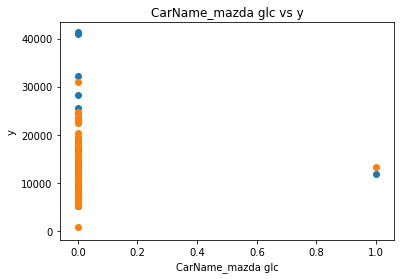

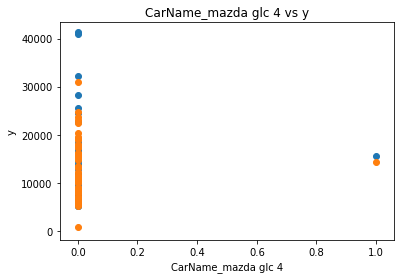

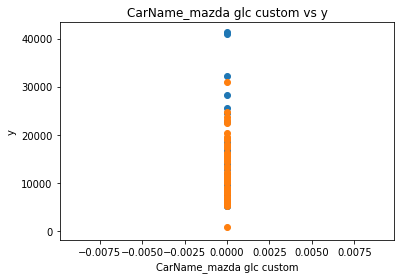

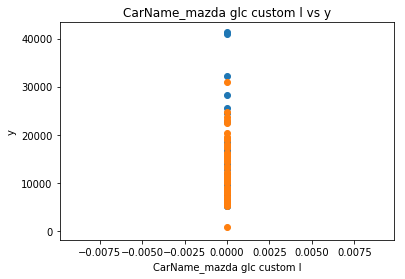

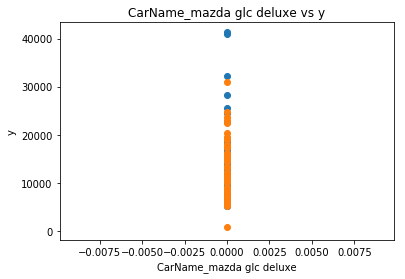

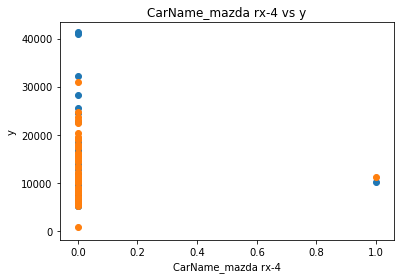

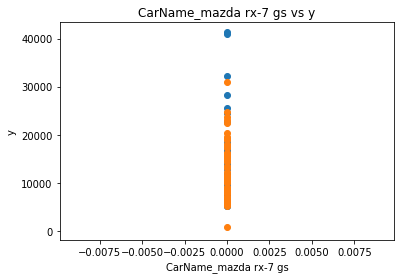

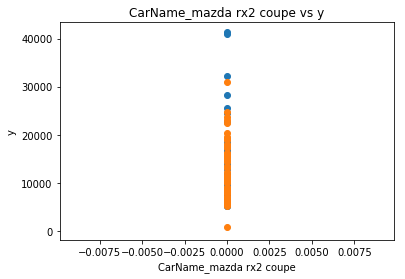

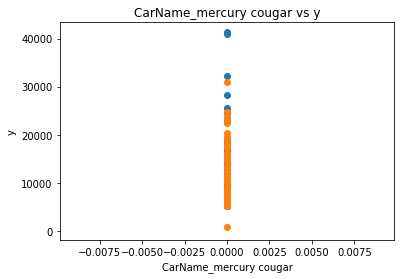

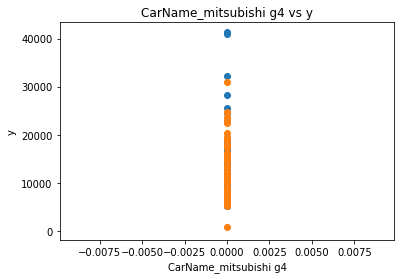

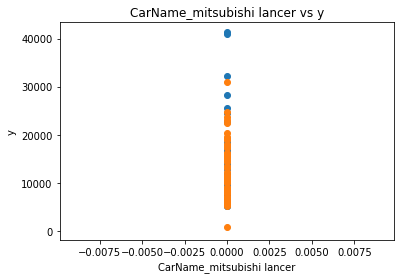

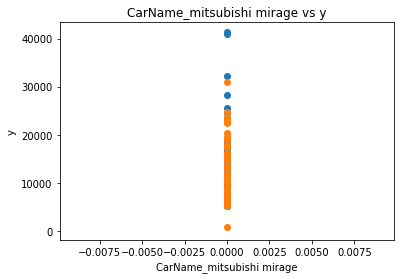

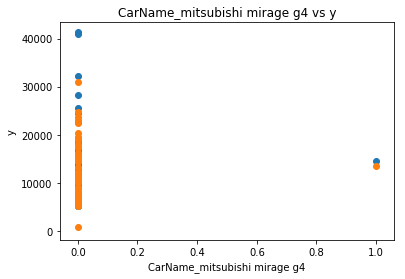

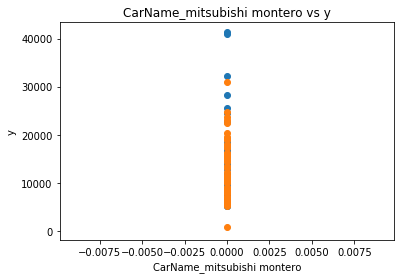

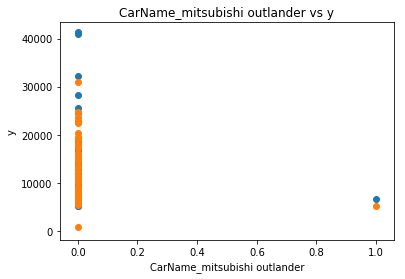

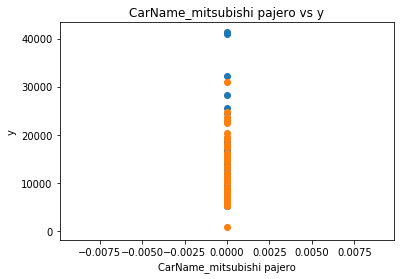

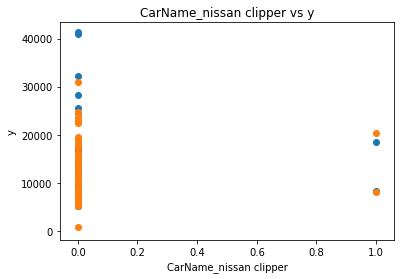

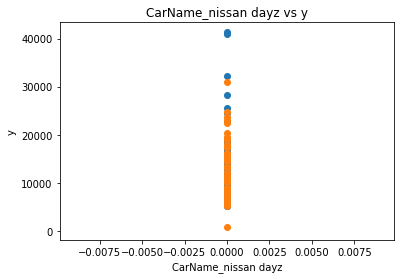

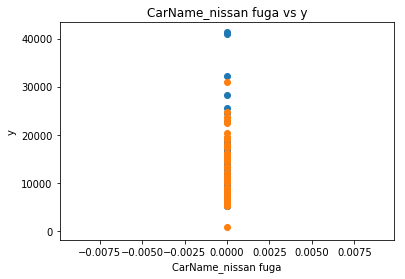

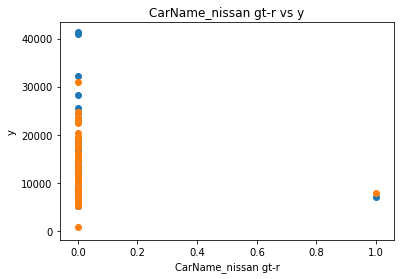

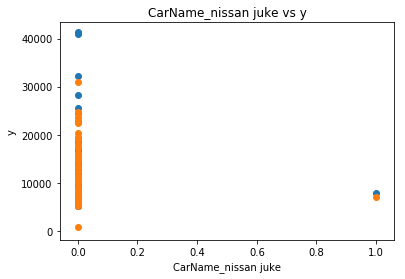

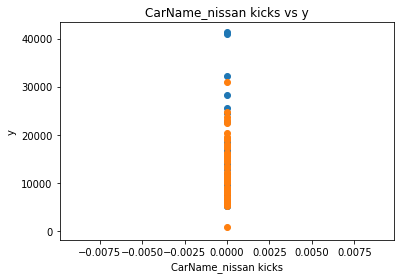

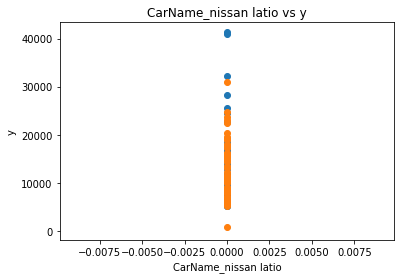

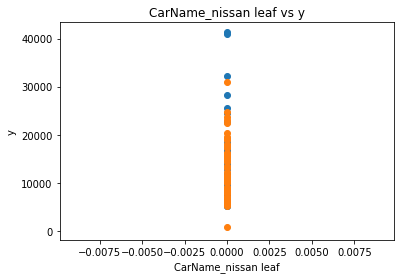

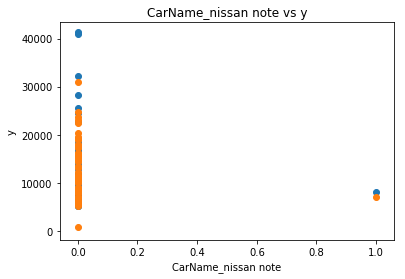

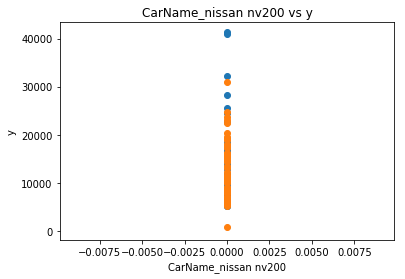

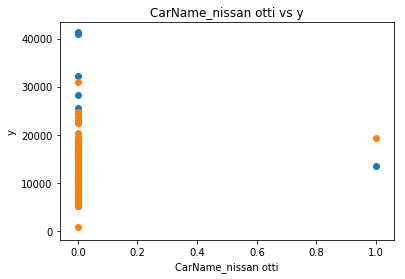

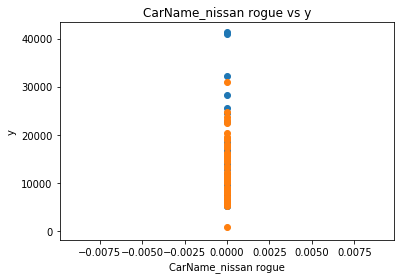

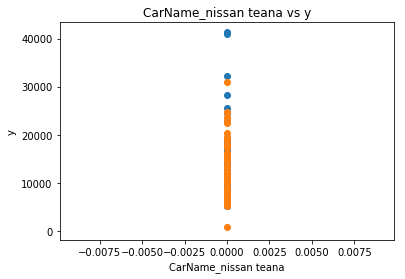

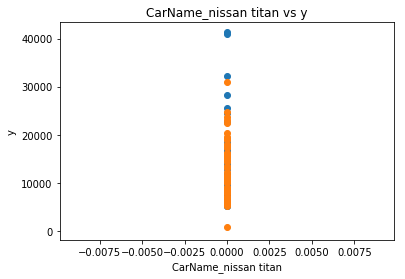

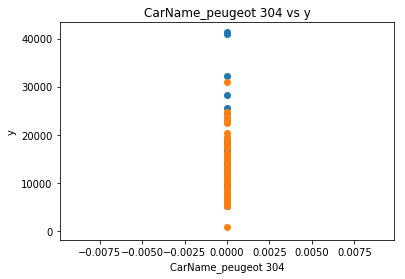

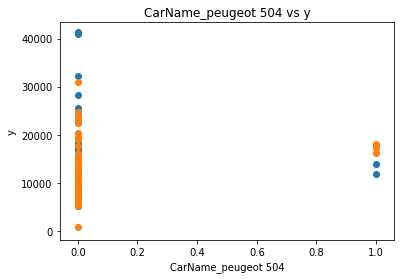

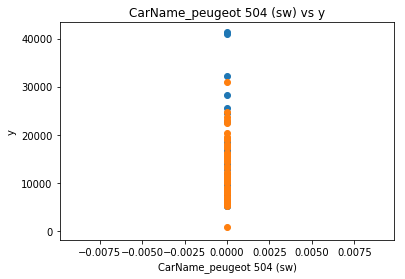

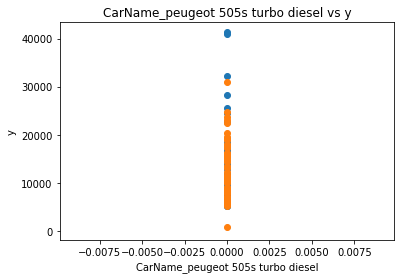

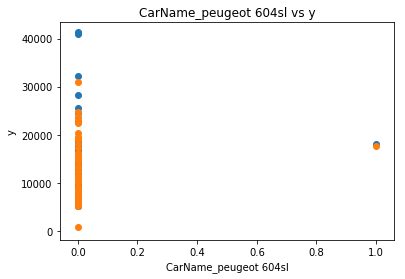

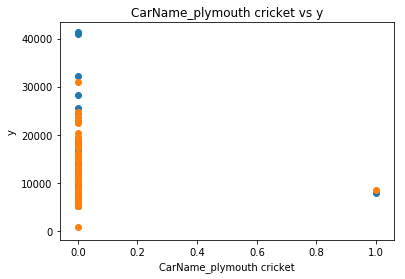

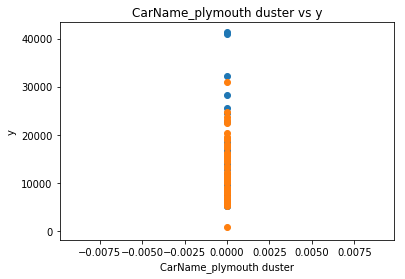

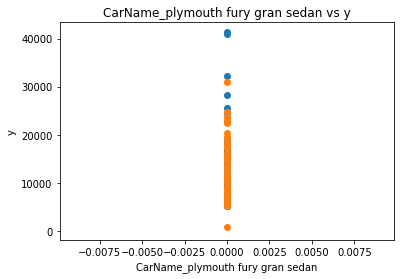

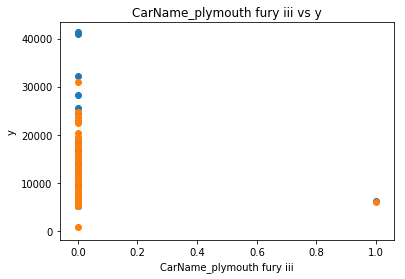

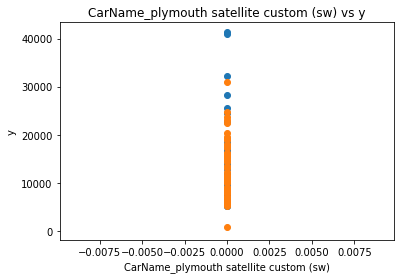

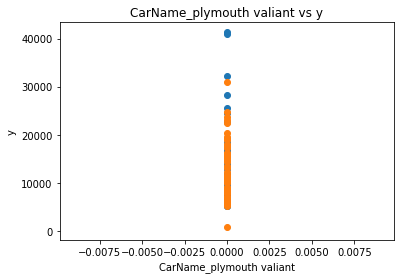

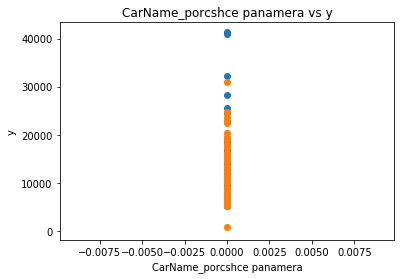

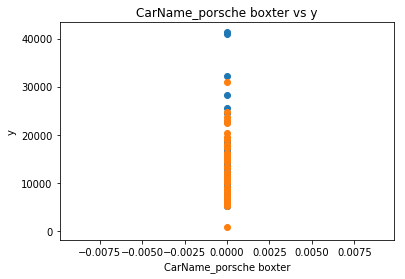

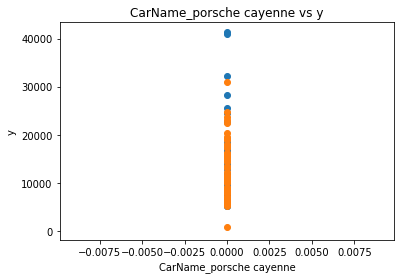

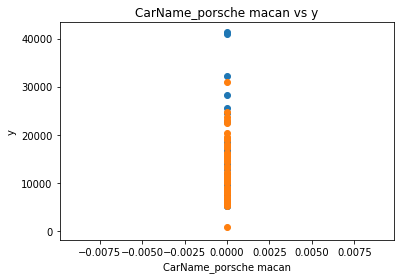

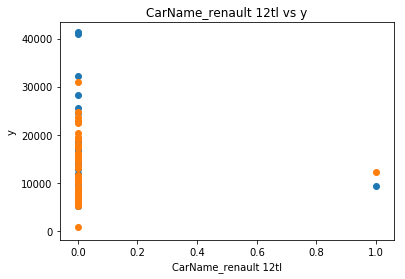

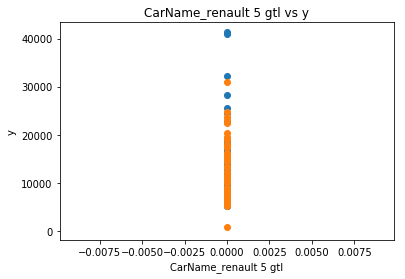

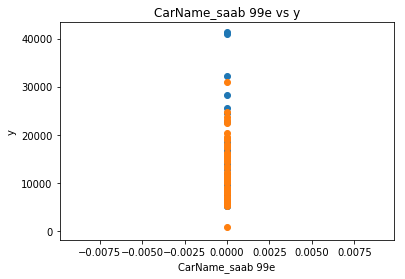

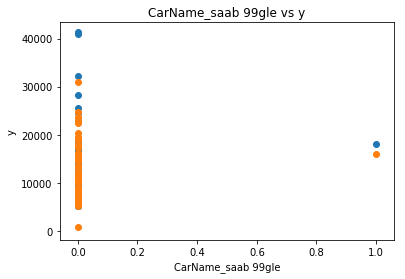

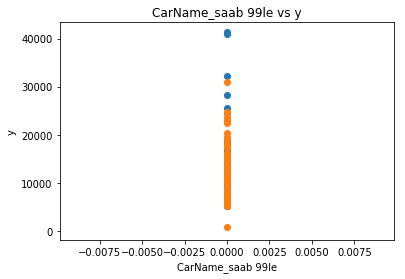

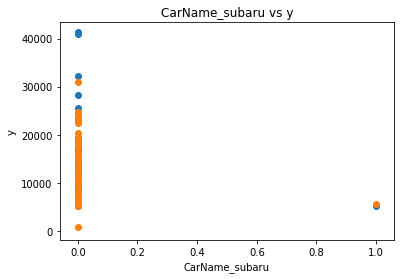

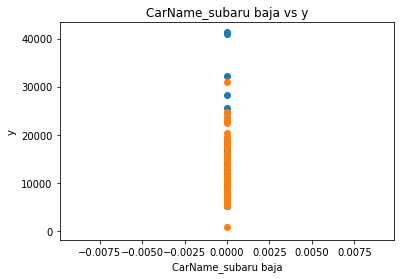

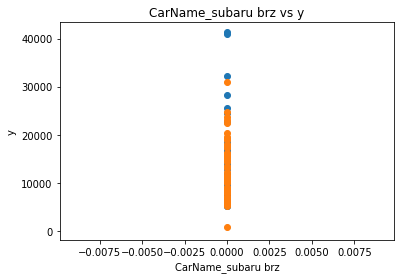

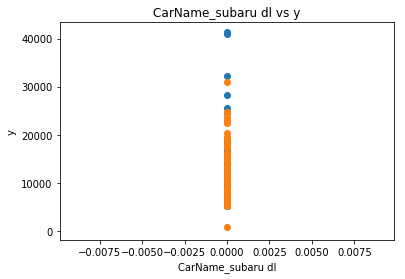

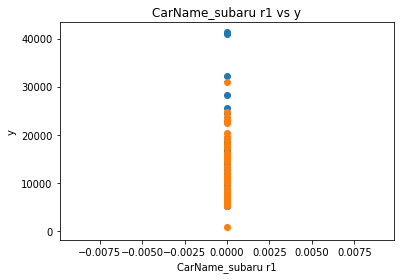

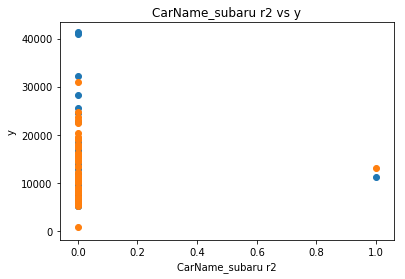

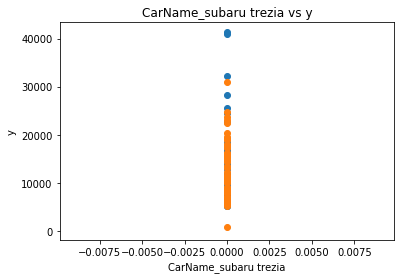

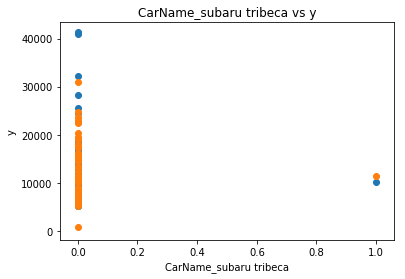

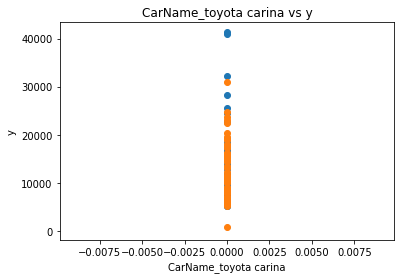

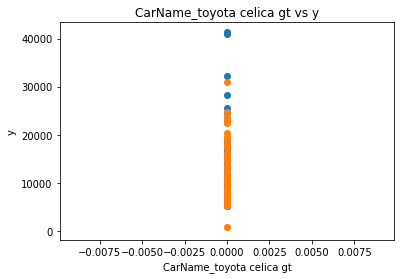

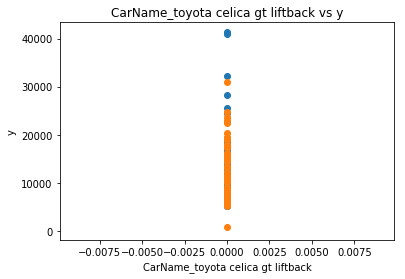

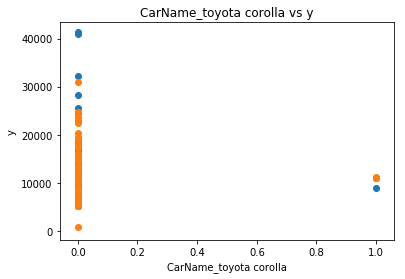

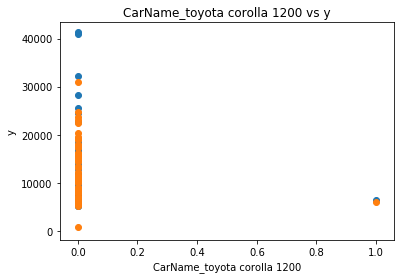

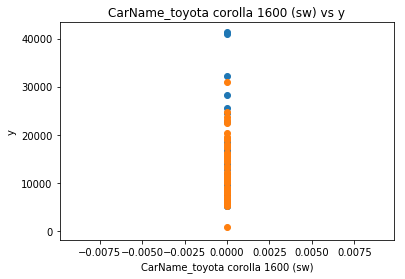

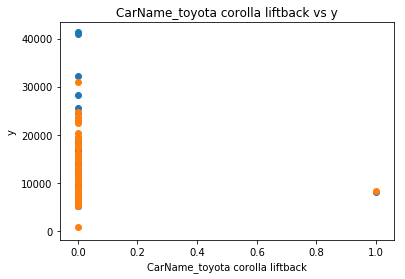

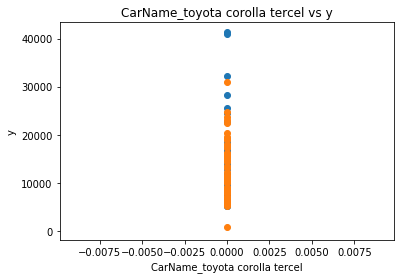

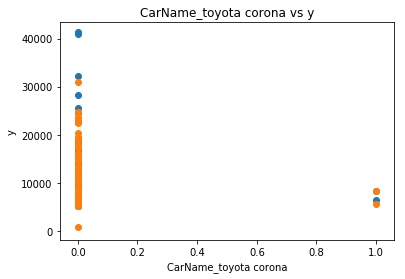

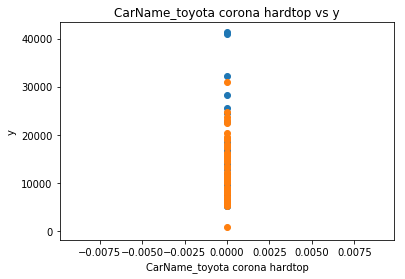

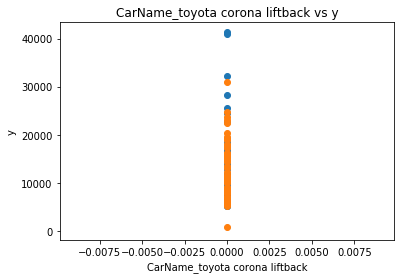

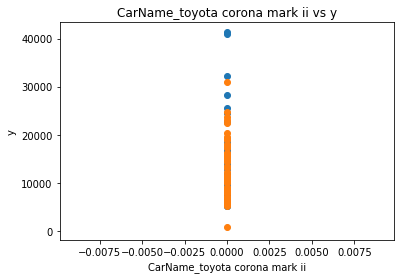

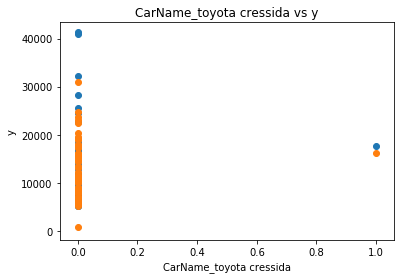

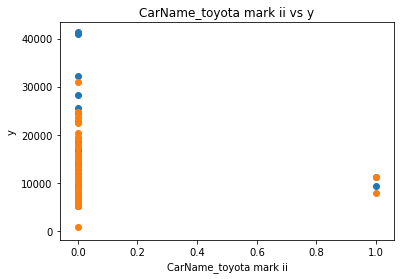

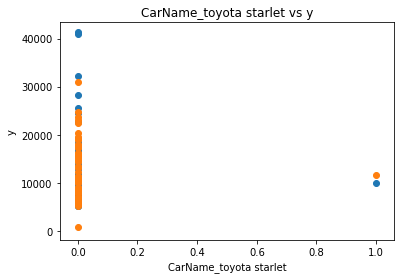

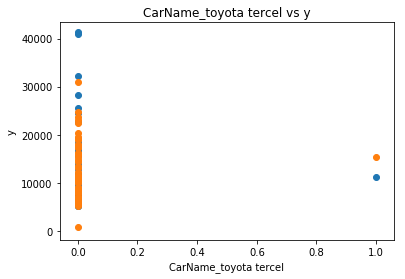

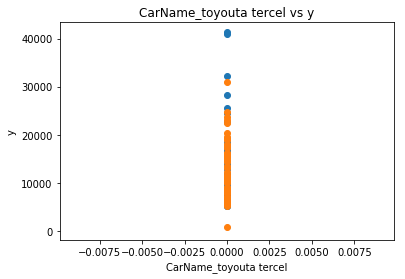

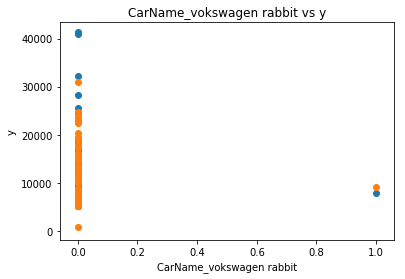

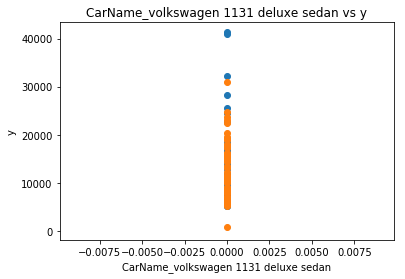

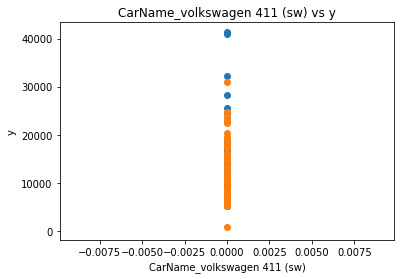

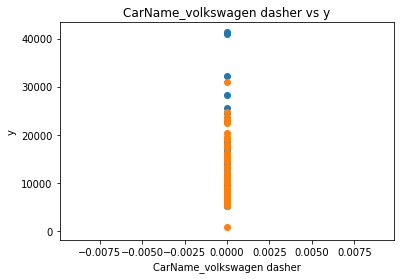

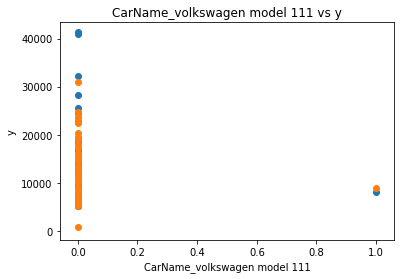

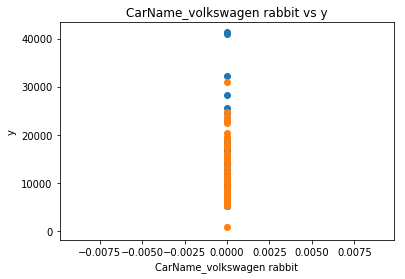

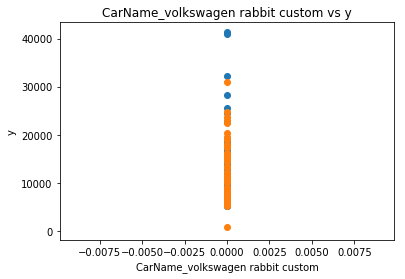

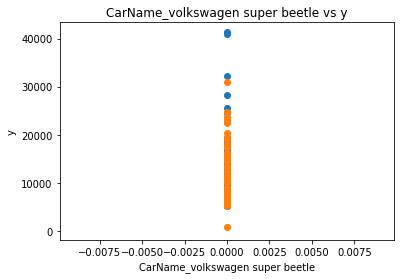

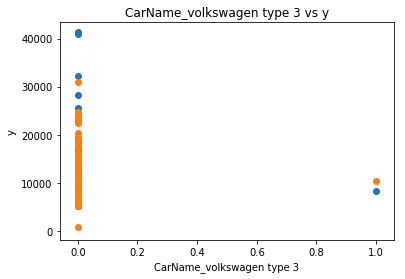

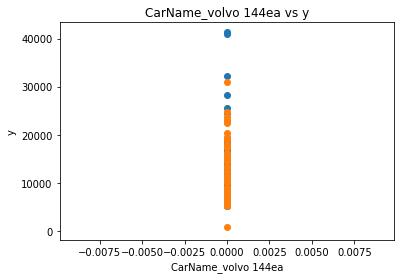

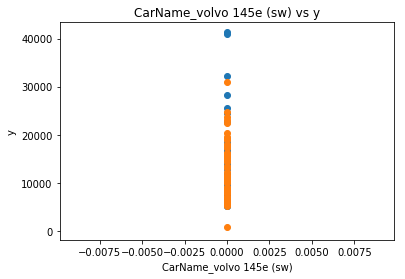

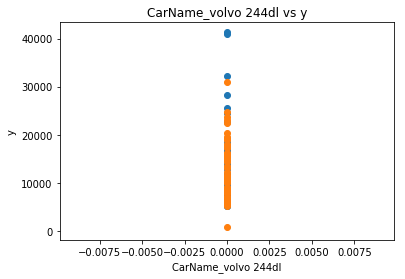

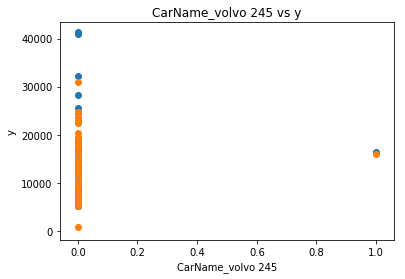

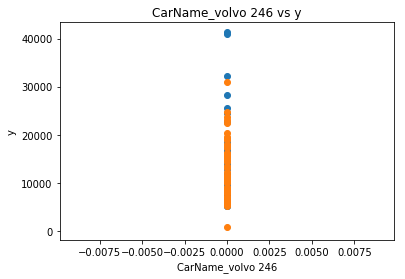

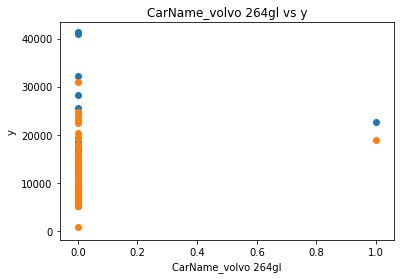

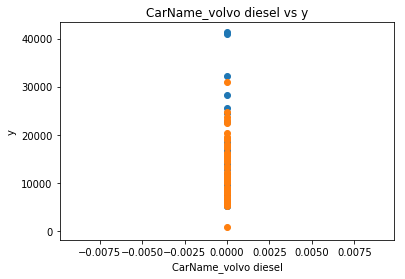

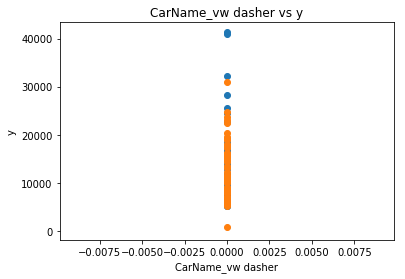

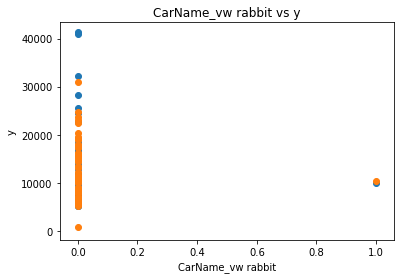

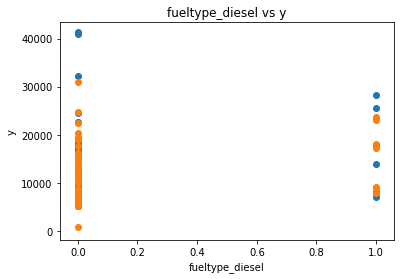

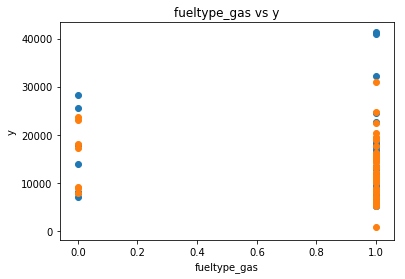

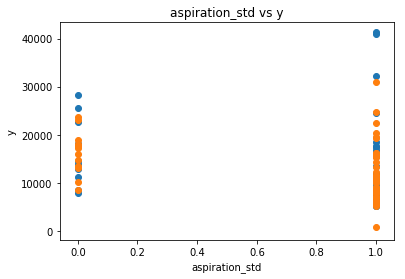

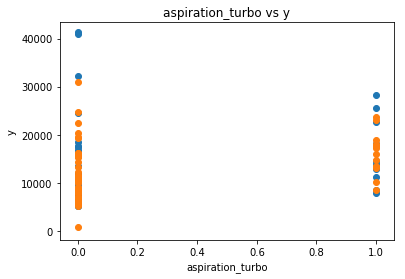

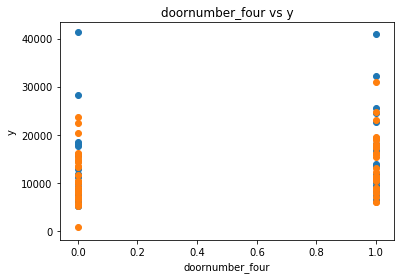

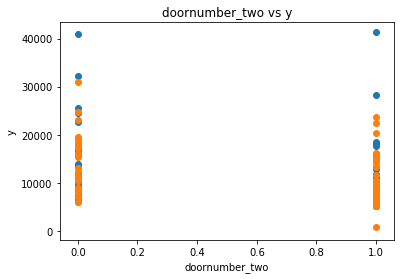

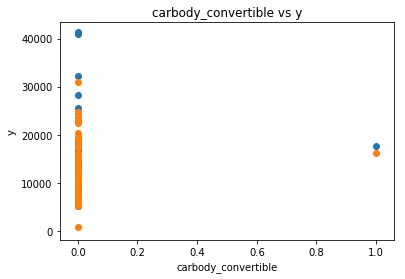

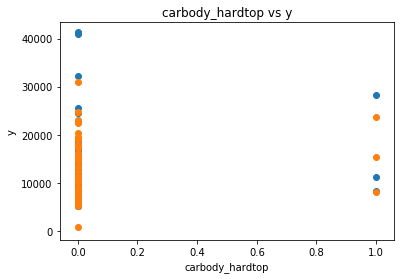

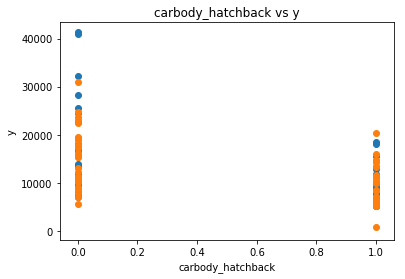

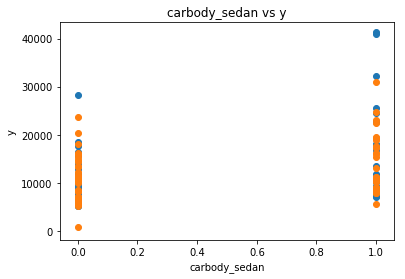

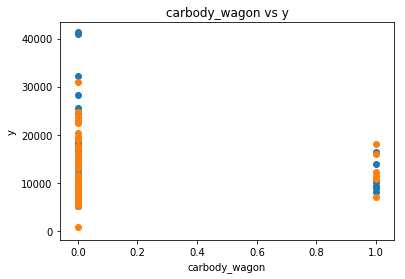

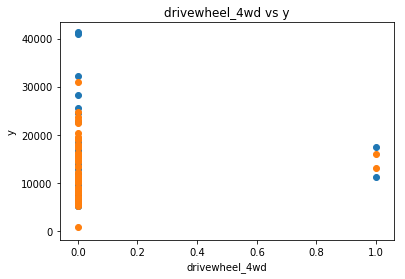

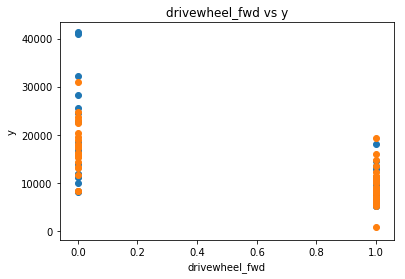

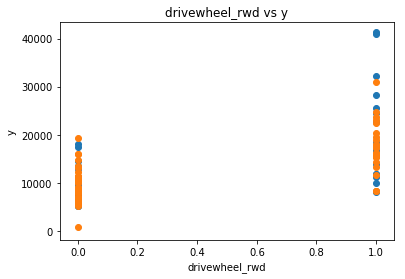

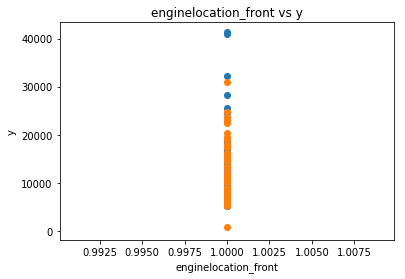

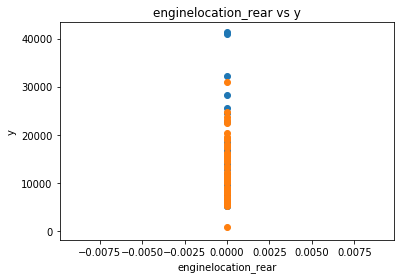

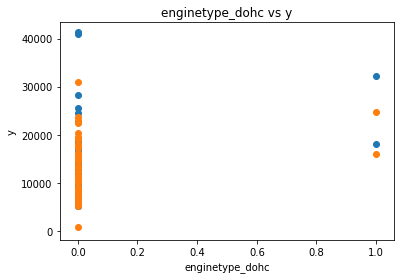

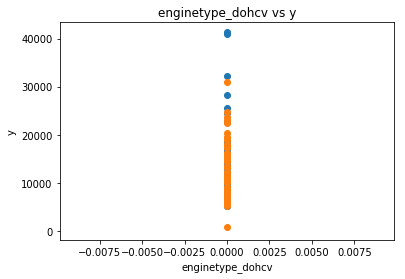

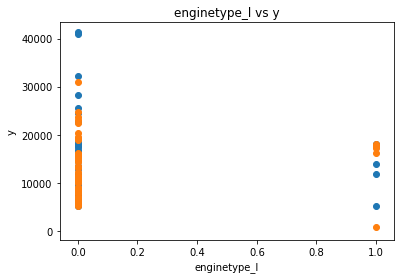

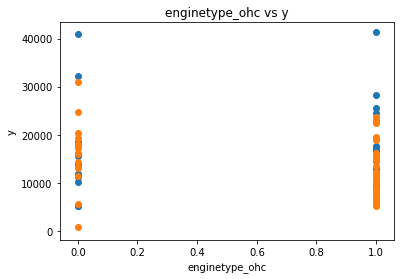

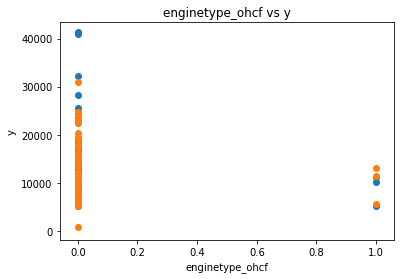

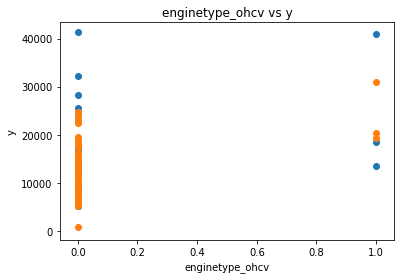

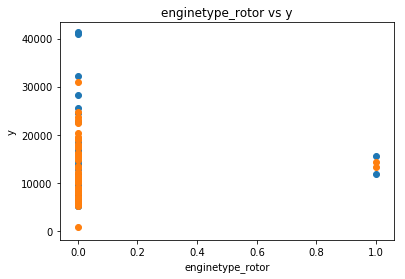

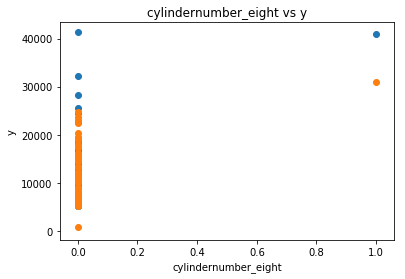

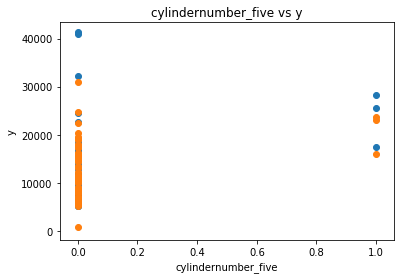

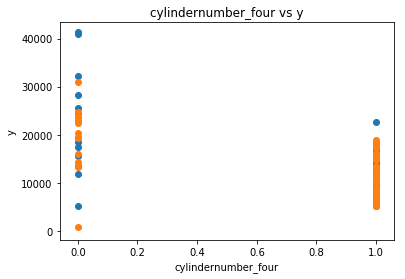

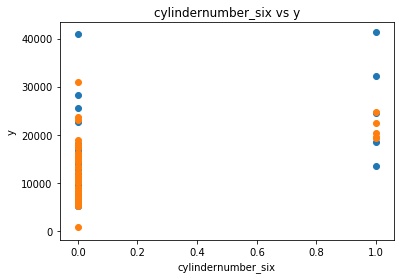

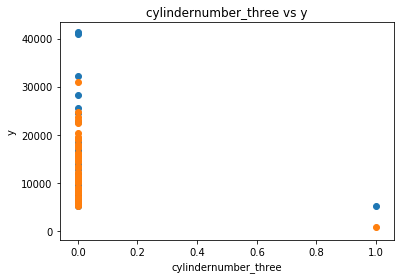

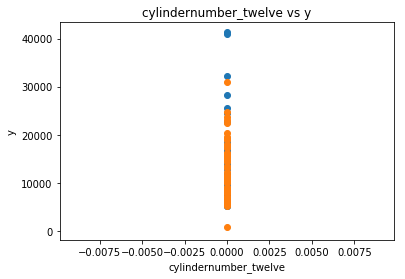

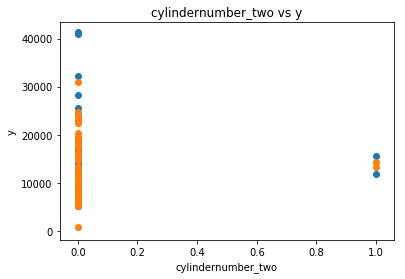

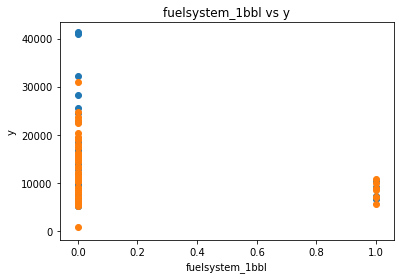

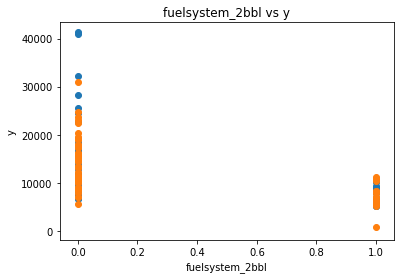

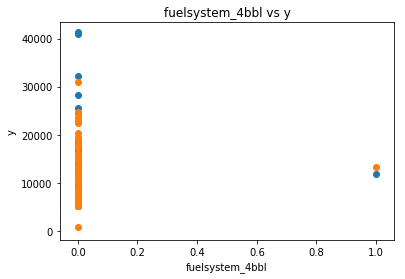

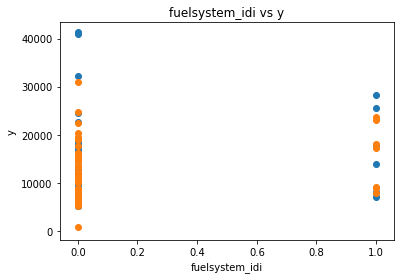

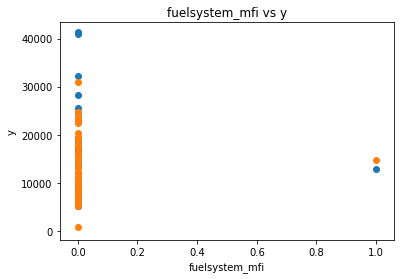

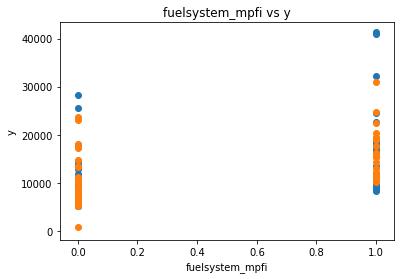

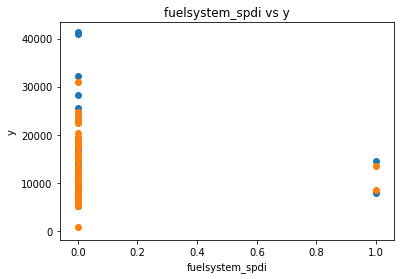

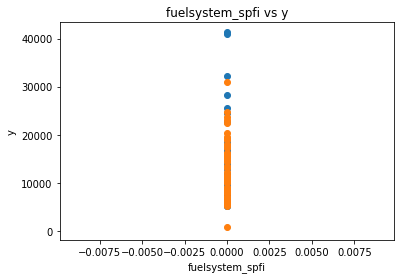

In [61]:
for i in xtest.columns:
    plt.scatter(xtest[i],ytest)
    plt.scatter(xtest[i],ypred_rr5)
    plt.title(i+' vs y')
    plt.xlabel(i)
    plt.ylabel('y')
    plt.show()

Conclusion - Ridge regression with lambda = 1 is the best performing model. It shows the highest R2 and lowest mean squared error